In [ ]:
#imports
import pip
import pandas as pd
import numpy as np
!pip install yfinance
!pip install git+https://github.com/quantopian/pyfolio
import yfinance as yf
from pandas_datareader import data as pdr

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-uwfmij13
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-uwfmij13
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 745.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75755 sha256=ae88888b87933e323a6398df28efc4439943632e0bdeebed0d8c7fcccc39eca6
  Stored in directory: /tmp/pip-ephem-wheel-cache-h1x305th/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=459d6e17293d10b9a219d657ea4993a5caacfc7fe143e7db2c382ed85ba8b075
  Stored in

In [ ]:
FTSE = yf.Ticker("^FTSE")
df_FTSE = FTSE.history(period="6mo", interval="1d")
df_FTSE

Open         High          Low        Close  \
Date                                                                            
2023-06-01 00:00:00+01:00  7446.100098  7498.600098  7445.299805  7490.299805   
2023-06-02 00:00:00+01:00  7490.299805  7614.899902  7490.000000  7607.299805   
2023-06-05 00:00:00+01:00  7607.299805  7654.799805  7594.100098  7600.000000   
2023-06-06 00:00:00+01:00  7600.000000  7636.100098  7556.200195  7628.100098   
2023-06-07 00:00:00+01:00  7628.100098  7642.399902  7604.399902  7624.299805   
...                                ...          ...          ...          ...   
2023-11-27 00:00:00+00:00  7488.200195  7488.299805  7452.200195  7460.700195   
2023-11-28 00:00:00+00:00  7460.700195  7461.100098  7403.299805  7455.200195   
2023-11-29 00:00:00+00:00  7455.200195  7457.500000  7408.799805  7423.500000   
2023-11-30 00:00:00+00:00  7423.500000  7497.700195  7387.100098  7453.799805   
2023-12-01 00:00:00+00:00  7453.799805  7538.700195  7453.799805  7529.399902   

                               Volume  Dividends  Stock Splits  
Date                                                            
2023-06-01 00:00:00+01:00   967347300        0.0           0.0  
2023-06-02 00:00:00+01:00   638696900        0.0           0.0  
2023-06-05 00:00:00+01:00   548992900        0.0           0.0  
2023-06-06 00:00:00+01:00   686044700        0.0           0.0  
2023-06-07 00:00:00+01:00   617864100        0.0           0.0  
...                               ...        ...           ...  
2023-11-27 00:00:00+00:00   399628100        0.0           0.0  
2023-11-28 00:00:00+00:00   610114900        0.0           0.0  
2023-11-29 00:00:00+00:00   532425900        0.0           0.0  
2023-11-30 00:00:00+00:00  1276856800        0.0           0.0  
2023-12-01 00:00:00+00:00   549661500        0.0           0.0  

[131 rows x 7 columns]

In [ ]:
import pandas as pd
import numpy as np
#from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

In [ ]:
DATA_SAVE_DIR = f"datasets"
TRAINED_MODEL_DIR = f"trained_models"
TENSORBOARD_LOG_DIR = f"tensorboard_log"
RESULTS_DIR = f"results"

In [ ]:
import os
if not os.path.exists("./" + DATA_SAVE_DIR):
    os.makedirs("./" + DATA_SAVE_DIR)
if not os.path.exists("./" + TRAINED_MODEL_DIR):
    os.makedirs("./" + TRAINED_MODEL_DIR)
if not os.path.exists("./" + TENSORBOARD_LOG_DIR):
    os.makedirs("./" + TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + RESULTS_DIR):
    os.makedirs("./" + RESULTS_DIR)

In [ ]:
# 20 stocks selected out of DOW 30 index by autoencoder
list_of_stocks = ['JNJ', 'PG', 'MMM', 'KO', 'IBM', 'VZ', 'MCD', 'PFE', 'RTX', 'WMT',
       'MRK', 'V', 'DIS', 'MSFT', 'XOM', 'HD', 'TRV', 'INTC', 'AXP', 'NKE']

In [ ]:
tickers = yf.Tickers(" ".join(list_of_stocks))
data = tickers.history(start='2008-01-01', end="2021-01-01", interval="1d")
data

[*********************100%%**********************]  20 of 20 completed


Close                                                 \
                   AXP         DIS          HD         IBM       INTC   
Date                                                                    
2008-01-02   39.588001   27.012506   17.372105   58.999619  15.657769   
2008-01-03   39.099365   26.953117   17.179161   59.117931  15.237762   
2008-01-04   38.114300   26.410152   16.606972   56.993294  14.002427   
2008-01-07   38.284939   26.435606   16.879751   56.384651  14.132141   
2008-01-08   37.191326   25.909613   16.460592   54.998287  13.749192   
...                ...         ...         ...         ...        ...   
2020-12-24  112.843559  173.729996  251.855148  103.016945  43.122364   
2020-12-28  113.814774  178.860001  250.302628  103.124352  43.122364   
2020-12-29  113.603218  177.300003  247.457901  102.281647  45.247795   
2020-12-30  114.843681  181.169998  246.593414  102.727776  44.661476   
2020-12-31  116.266861  181.179993  246.928055  104.000099  45.641731   

                                                                      ...  \
                   JNJ         KO         MCD         MMM        MRK  ...   
Date                                                                  ...   
2008-01-02   41.183594  18.605783   36.937489   50.777531  31.142826  ...   
2008-01-03   41.196095  18.800703   36.829407   50.771416  31.115662  ...   
2008-01-04   41.139858  18.837250   36.269958   50.194321  30.860537  ...   
2008-01-07   41.777214  19.281910   36.892986   49.795269  31.441387  ...   
2008-01-08   41.827187  19.361101   36.289017   49.242725  32.385921  ...   
...                ...        ...         ...         ...        ...  ...   
2020-12-24  140.646576  48.779102  197.656464  153.019653  70.049301  ...   
2020-12-28  141.310760  49.436310  200.115585  153.186234  70.320259  ...   
2020-12-29  142.187057  49.408928  198.890701  152.432190  71.168129  ...   
2020-12-30  143.948975  49.691887  197.815399  152.660156  70.442642  ...   
2020-12-31  145.175827  50.056999  200.639206  153.256393  71.500282  ...   

              Volume                                                   \
                MSFT       NKE       PFE        PG       RTX      TRV   
Date                                                                    
2008-01-02  63004200   9781600  48466820  12255300   6773748  2341400   
2008-01-03  49599600  10636000  47926223  11162800   6921366  2098800   
2008-01-04  72090800  22335200  44292453  10049000   8803537  3048900   
2008-01-07  80164300  20808400  50715107  11916000   9297080  3130300   
2008-01-08  79148300  16714400  54701441  17169100  13110680  4684600   
...              ...       ...       ...       ...       ...      ...   
2020-12-24  10550600   1821900  14790100   2588200   1758600   416800   
2020-12-28  17933500   4081500  26993700   3714700   2938000  1100300   
2020-12-29  17403200   3232400  23152100   5139300   3670100   859000   
2020-12-30  20272300   3052100  24889800   3261400   5015500  1253800   
2020-12-31  20942100   2949900  30796500   4076400   4177000   970200   

                                                     
                    V        VZ       WMT       XOM  
Date                                                 
2008-01-02        NaN  10865660  19918600  23351900  
2008-01-03        NaN   9017975  19801000  19160600  
2008-01-04        NaN  11886820  20351200  24730900  
2008-01-07        NaN  16094216  20326500  28937500  
2008-01-08        NaN  37362464  19017100  21764500  
...               ...       ...       ...       ...  
2020-12-24  3367900.0   7751100   3018200   8039000  
2020-12-28  5816200.0  15355600   6448300  23877500  
2020-12-29  6093400.0  15686100   5979400  20287700  
2020-12-30  8875100.0  18259800   6250400  23807300  
2020-12-31  5922200.0  12906300   5938000  22786500  

[3274 rows x 140 columns]

DATA CLEANING

In [ ]:
# Check for missing values
data.isna().sum()

Close   AXP      0
        DIS      0
        HD       0
        IBM      0
        INTC     0
                ..
Volume  TRV      0
        V       53
        VZ       0
        WMT      0
        XOM      0
Length: 140, dtype: int64

In [ ]:
data_filtered = data[data["Volume"]["V"].notna()]
data_filtered

Close                                                 \
                   AXP         DIS          HD         IBM       INTC   
Date                                                                    
2008-03-19   32.576324   26.503471   18.019993   66.155228  13.105649   
2008-03-20   35.663322   27.063410   18.839077   66.941597  13.515786   
2008-03-24   36.772472   27.182184   19.644749   67.354530  13.751923   
2008-03-25   36.850040   27.216120   19.309050   66.737907  13.838920   
2008-03-26   35.182438   26.944633   18.906218   66.138237  13.584144   
...                ...         ...         ...         ...        ...   
2020-12-24  112.843559  173.729996  251.855148  103.016945  43.122364   
2020-12-28  113.814774  178.860001  250.302628  103.124352  43.122364   
2020-12-29  113.603218  177.300003  247.457901  102.281647  45.247795   
2020-12-30  114.843681  181.169998  246.593414  102.727776  44.661476   
2020-12-31  116.266861  181.179993  246.928055  104.000099  45.641731   

                                                                      ...  \
                   JNJ         KO         MCD         MMM        MRK  ...   
Date                                                                  ...   
2008-03-19   40.808903  18.379061   34.347527   49.095844  23.541180  ...   
2008-03-20   41.123421  18.710108   34.833996   48.175346  23.743793  ...   
2008-03-24   40.815212  18.753017   35.698128   48.583096  24.231153  ...   
2008-03-25   40.601345  18.823523   35.973366   48.793125  24.461138  ...   
2008-03-26   40.695705  18.743828   35.589306   48.595451  24.477570  ...   
...                ...        ...         ...         ...        ...  ...   
2020-12-24  140.646576  48.779102  197.656464  153.019653  70.049301  ...   
2020-12-28  141.310760  49.436310  200.115585  153.186234  70.320259  ...   
2020-12-29  142.187057  49.408928  198.890701  152.432190  71.168129  ...   
2020-12-30  143.948975  49.691887  197.815399  152.660156  70.442642  ...   
2020-12-31  145.175827  50.056999  200.639206  153.256393  71.500282  ...   

              Volume                                                   \
                MSFT       NKE       PFE        PG       RTX      TRV   
Date                                                                    
2008-03-19  61442100  20753600  48320946  15093900   9691947  3956100   
2008-03-20  60170200  43300400  57742441  16523000  10182471  6908900   
2008-03-24  48294700  29827600  37655731  10100000   6862732  5345300   
2008-03-25  49149000  20459600  46445142  10581200   7347536  3225800   
2008-03-26  45868100  20653600  33432775   8431200   6729892  2990400   
...              ...       ...       ...       ...       ...      ...   
2020-12-24  10550600   1821900  14790100   2588200   1758600   416800   
2020-12-28  17933500   4081500  26993700   3714700   2938000  1100300   
2020-12-29  17403200   3232400  23152100   5139300   3670100   859000   
2020-12-30  20272300   3052100  24889800   3261400   5015500  1253800   
2020-12-31  20942100   2949900  30796500   4076400   4177000   970200   

                                                       
                      V        VZ       WMT       XOM  
Date                                                   
2008-03-19  708486000.0  20761899  25829900  35073600  
2008-03-20  198985200.0  19425705  44533300  44962400  
2008-03-24  149566400.0  13063730  22246400  22339200  
2008-03-25   87092000.0  15571050  20327500  27080200  
2008-03-26   43111600.0  19511292  19226400  23024000  
...                 ...       ...       ...       ...  
2020-12-24    3367900.0   7751100   3018200   8039000  
2020-12-28    5816200.0  15355600   6448300  23877500  
2020-12-29    6093400.0  15686100   5979400  20287700  
2020-12-30    8875100.0  18259800   6250400  23807300  
2020-12-31    5922200.0  12906300   5938000  22786500  

[3221 rows x 140 columns]

In [ ]:
df_close = data_filtered["Close"]
df_close.reset_index(inplace=True)
df_close.rename({"Date":"date"}, axis=1, inplace=True)
df_close

<ipython-input-11-7b6a52a1cd61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.rename({"Date":"date"}, axis=1, inplace=True)


date         AXP         DIS          HD         IBM       INTC  \
0    2008-03-19   32.576324   26.503471   18.019993   66.155228  13.105649   
1    2008-03-20   35.663322   27.063410   18.839077   66.941597  13.515786   
2    2008-03-24   36.772472   27.182184   19.644749   67.354530  13.751923   
3    2008-03-25   36.850040   27.216120   19.309050   66.737907  13.838920   
4    2008-03-26   35.182438   26.944633   18.906218   66.138237  13.584144   
...         ...         ...         ...         ...         ...        ...   
3216 2020-12-24  112.843559  173.729996  251.855148  103.016945  43.122364   
3217 2020-12-28  113.814774  178.860001  250.302628  103.124352  43.122364   
3218 2020-12-29  113.603218  177.300003  247.457901  102.281647  45.247795   
3219 2020-12-30  114.843681  181.169998  246.593414  102.727776  44.661476   
3220 2020-12-31  116.266861  181.179993  246.928055  104.000099  45.641731   

             JNJ         KO         MCD         MMM  ...        MSFT  \
0      40.808903  18.379061   34.347527   49.095844  ...   20.906862   
1      41.123421  18.710108   34.833996   48.175346  ...   21.315943   
2      40.815212  18.753017   35.698128   48.583096  ...   21.308638   
3      40.601345  18.823523   35.973366   48.793125  ...   21.286718   
4      40.695705  18.743828   35.589306   48.595451  ...   20.863037   
...          ...        ...         ...         ...  ...         ...   
3216  140.646576  48.779102  197.656464  153.019653  ...  216.924286   
3217  141.310760  49.436310  200.115585  153.186234  ...  219.076492   
3218  142.187057  49.408928  198.890701  152.432190  ...  218.287628   
3219  143.948975  49.691887  197.815399  152.660156  ...  215.882233   
3220  145.175827  50.056999  200.639206  153.256393  ...  216.602905   

             NKE        PFE          PG        RTX         TRV           V  \
0      12.668509  10.468346   42.673061  29.578529   31.691055   12.652095   
1      13.783117  10.458189   43.654785  29.686075   32.633381   14.409950   
2      14.153976  10.468346   44.032345  30.258196   32.565090   13.375398   
3      14.008499  10.554696   43.761757  30.180767   32.612900   14.163630   
4      13.578229  10.508985   43.824680  29.944162   32.469517   14.322618   
...          ...        ...         ...        ...         ...         ...   
3216  137.274826  33.230705  127.841324  65.320534  130.326843  204.246643   
3217  138.079453  32.829475  128.732452  65.655174  130.985611  208.092773   
3218  137.245743  33.034550  128.491119  65.385605  130.195129  209.795624   
3219  137.255447  32.758144  127.887764  66.333763  130.882080  213.700470   
3220  137.148788  32.820557  129.159470  66.473198  132.096054  214.062576   

             VZ         WMT        XOM  
0     14.906782   36.084743  47.729362  
1     15.326869   37.825733  48.051556  
2     15.687551   38.109989  48.588608  
3     15.657854   37.697819  48.164631  
4     15.335351   37.591236  48.763878  
...         ...         ...        ...  
3216  49.715870  137.487091  36.450306  
3217  49.834160  139.135025  36.572979  
3218  49.690521  138.253601  36.161160  
3219  49.124409  138.138626  36.450306  
3220  49.639828  138.109848  36.117352  

[3221 rows x 21 columns]

erting dataframe to a format used by RL implementation

In [ ]:
dfs = []
for cols in list(data_filtered.columns):
    df_temp = pd.DataFrame()
    df_temp[cols[0]] = data_filtered[cols[0]][cols[1]]
    df_temp["tic"] = cols[1]
    dfs.append(df_temp)

dfs1 = []
for i in range(0, len(dfs), len(list_of_stocks)):
    df_temp = pd.concat(dfs[i:(int(i/len(list_of_stocks)) + 1)*len(list_of_stocks)])
    dfs1.append(df_temp)

new_data = pd.concat(dfs1, axis=1)
new_data

Close  tic  Dividends  tic       High  tic        Low  tic  \
Date                                                                         
2008-03-19  32.576324  AXP        0.0  AXP  34.499879  AXP  32.514273  AXP   
2008-03-20  35.663322  AXP        0.0  AXP  35.779668  AXP  32.739209  AXP   
2008-03-24  36.772472  AXP        0.0  AXP  37.811813  AXP  35.872745  AXP   
2008-03-25  36.850040  AXP        0.0  AXP  37.486057  AXP  36.307104  AXP   
2008-03-26  35.182438  AXP        0.0  AXP  36.733692  AXP  35.104873  AXP   
...               ...  ...        ...  ...        ...  ...        ...  ...   
2020-12-24  36.450306  XOM        0.0  XOM  36.669358  XOM  36.257542  XOM   
2020-12-28  36.572979  XOM        0.0  XOM  37.282706  XOM  36.380212  XOM   
2020-12-29  36.161160  XOM        0.0  XOM  36.905936  XOM  36.099825  XOM   
2020-12-30  36.450306  XOM        0.0  XOM  37.168797  XOM  36.161159  XOM   
2020-12-31  36.117352  XOM        0.0  XOM  36.520407  XOM  35.898299  XOM   

                 Open  tic  Stock Splits  tic      Volume  tic  
Date                                                            
2008-03-19  34.282704  AXP           0.0  AXP  14098300.0  AXP  
2008-03-20  32.739209  AXP           0.0  AXP  17558800.0  AXP  
2008-03-24  35.880500  AXP           0.0  AXP  13441300.0  AXP  
2008-03-25  36.725940  AXP           0.0  AXP   9942200.0  AXP  
2008-03-26  36.733692  AXP           0.0  AXP  11113000.0  AXP  
...               ...  ...           ...  ...         ...  ...  
2020-12-24  36.494119  XOM           0.0  XOM   8039000.0  XOM  
2020-12-28  36.529166  XOM           0.0  XOM  23877500.0  XOM  
2020-12-29  36.835841  XOM           0.0  XOM  20287700.0  XOM  
2020-12-30  36.213732  XOM           0.0  XOM  23807300.0  XOM  
2020-12-31  36.336404  XOM           0.0  XOM  22786500.0  XOM  

[64420 rows x 14 columns]

In [ ]:
new_data1 = new_data.drop(["tic", "Dividends", "Stock Splits"], axis=1)
new_data1["tic"] = new_data.iloc[:, 1:2]
new_data1 = new_data1[["tic", "Close", "High", "Low", "Open", "Volume"]]
new_data1.sort_index(inplace=True)
new_data1.reset_index(inplace=True)
new_data1.columns = ['date','tic','close','high','low','open','volume']
new_data1

date  tic       close        high         low        open  \
0     2008-03-19  AXP   32.576324   34.499879   32.514273   34.282704   
1     2008-03-19    V   12.652095   15.451231   12.316199   13.323887   
2     2008-03-19  TRV   31.691055   33.507435   31.691055   32.701673   
3     2008-03-19   HD   18.019993   18.812228   17.999851   18.221408   
4     2008-03-19  RTX   29.578529   30.322724   29.578529   29.948477   
...          ...  ...         ...         ...         ...         ...   
64415 2020-12-31  RTX   66.473198   66.649810   65.943346   66.324464   
64416 2020-12-31  TRV  132.096054  132.256032  129.969272  130.882098   
64417 2020-12-31    V  214.062576  215.129328  211.586564  213.739616   
64418 2020-12-31  MMM  153.256393  153.326539  151.844740  152.668937   
64419 2020-12-31  XOM   36.117352   36.520407   35.898299   36.336404   

            volume  
0       14098300.0  
1      708486000.0  
2        3956100.0  
3       23266600.0  
4        9691947.0  
...            ...  
64415    4177000.0  
64416     970200.0  
64417    5922200.0  
64418    1841300.0  
64419   22786500.0  

[64420 rows x 7 columns]

DATA PROCESSING

In [ ]:
data = new_data1

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=69a4b4215192e6f869c315424c4f76dfbbc87d55303cacfeae0121bd4346c1e5
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


Add technical Indicators

In [ ]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
# Define a Function for adding technical indicators

def add_features(data, feature_list, short_names):
    """
    Function to add technical indicators for features
    -Takes in a dataset with Open, High, Low, Close and Volume
    -Also takes in a list of the technical indicators to be added
     as well as a list of the shortened indicator names
    """

    # list of column names to filter the features
    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names

    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="open", high="high",
    low="low", close="close", volume="volume")

    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()

    return data

In [ ]:
# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast',
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)
data_with_features

/usr/local/lib/python3.10/dist-packages/ta/volume.py:335: RuntimeWarning: overflow encountered in double_scalars
  self._nvi.iloc[i] = self._nvi.iloc[i - 1] * (1.0 + price_change.iloc[i])


date   tic       close        high         low        open  \
25    2008-03-20   RTX   29.686075   29.974290   29.311828   29.617250   
26    2008-03-20    VZ   15.326869   15.403248   14.894051   15.237759   
27    2008-03-20  MSFT   21.315943   21.345162   20.884949   20.994523   
28    2008-03-20   DIS   27.063410   27.131280   26.511961   26.537413   
29    2008-03-20   XOM   48.051556   48.283336   46.779603   47.588000   
...          ...   ...         ...         ...         ...         ...   
64415 2020-12-31   RTX   66.473198   66.649810   65.943346   66.324464   
64416 2020-12-31   TRV  132.096054  132.256032  129.969272  130.882098   
64417 2020-12-31     V  214.062576  215.129328  211.586564  213.739616   
64418 2020-12-31   MMM  153.256393  153.326539  151.844740  152.668937   
64419 2020-12-31   XOM   36.117352   36.520407   35.898299   36.336404   

           volume        atr         bbw           obv       cmf      macd  \
25     10182471.0  20.250995  206.403020 -7.077670e+08 -0.357538  2.858969   
26     19425705.0  19.705098  204.096370 -7.271927e+08 -0.312281  0.992964   
27     60170200.0  18.336418  209.239725 -6.670225e+08 -0.170344 -0.002561   
28     13802300.0  17.084310  208.981123 -6.532202e+08 -0.130972 -0.324014   
29     44962400.0  17.497871  198.122312 -6.082578e+08  0.043363  1.102096   
...           ...        ...         ...           ...       ...       ...   
64415   4177000.0  76.296708  188.555722 -2.988114e+11  0.530280 -4.071054   
64416    970200.0  75.245320  188.486012 -2.988104e+11  0.540330 -2.569757   
64417   5922200.0  76.024116  192.285187 -2.988045e+11  0.565852  5.174398   
64418   1841300.0  74.643488  190.054499 -2.988064e+11  0.571435  6.332152   
64419  22786500.0  78.914948  208.157498 -2.988292e+11  0.501971 -2.177362   

            adx         sma         ema         cci        rsi  
25     0.000000   34.255631   36.063817  -14.291553  49.207131  
26     0.000000   31.555423   32.873517  -75.452266  46.149705  
27     5.708764   31.369987   31.095429  -40.895881  47.611799  
28     5.398853   30.762977   30.475118  -11.312468  49.041693  
29     5.537727   33.894911   33.179186   85.952482  53.981244  
...         ...         ...         ...         ...        ...  
64415  5.085634  126.063057  117.056492  -82.178742  47.212993  
64416  4.841785  116.493724  119.370271    9.732670  50.520807  
64417  5.168158  125.665597  133.938318  119.718293  54.367229  
64418  5.021185  134.633485  136.910330   33.599520  51.188161  
64419  5.231562  125.545279  121.403718 -107.880114  45.650268  

[64395 rows x 17 columns]

In [ ]:
feature_list = list(data_with_features.columns)[7:]
feature_list

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

In [ ]:
data_with_features["pct_change"] = (data_with_features["close"] - data_with_features["close"].shift(1))/ data_with_features["close"].shift(1)
data_with_features["log_change"] = np.log(data_with_features["close"]/ data_with_features["close"].shift(1))

In [ ]:
class Generator():
    def __init__(self):
        pass

    def SMA(self, data, windows):
        res = data.rolling(window = windows).mean()
        return res

    def EMA(self, data, windows):
        res = data.ewm(span = windows).mean()
        return res

    def MACD(self, data, long, short, windows):
        short_ = data.ewm(span = short).mean()
        long_ = data.ewm(span = long).mean()
        macd_ = short_ - long_
        res = macd_.ewm(span = windows).mean()
        return res

    def RSI(self, data, windows):
        delta = data.diff(1)
        up = delta.copy()
        down = delta.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        avg_up = up.rolling(window = windows).mean()
        avg_down = down.rolling(window = windows).mean()
        rs = avg_up/ avg_down
        rsi = 100. -(100./ (1. + rs))
        return rsi

    def atr(self, data_high, data_low, windows):
        range_ = data_high - data_low
        res = range_.rolling(window = windows).mean()
        return res

    def bollinger_band(self, data, windows):
        sma = data.rolling(window = windows).mean()
        std = data.rolling(window = windows).std()
        upper = sma + 2 * std
        lower = sma - 2 * std
        return upper, lower

    def rsv(self, data, windows):
        min_ = data.rolling(window = windows).min()
        max_ = data.rolling(window = windows).max()
        res = (data - min_)/ (max_ - min_) * 100
        return res

In [ ]:
Generator = Generator()

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
tic_values = pd.unique(data_with_features["tic"])
i = 0
df_dict = {}
for tic_val in tic_values:
  i += 1
  data_tic = data_with_features.loc[data_with_features["tic"] == tic_val]
  data_tic['7ma'] = Generator.EMA(data_tic['close'], 7)
  data_tic['14ma'] = Generator.EMA(data_tic['close'], 14)
  data_tic['21ma'] = Generator.EMA(data_tic['close'], 21)
  data_tic['7macd'] = Generator.MACD(data_tic['close'], 3, 11, 7)
  data_tic['14macd'] = Generator.MACD(data_tic['close'], 7, 21, 14)
  data_tic['7rsi'] = Generator.RSI(data_tic['close'], 7)
  data_tic['14rsi'] = Generator.RSI(data_tic['close'], 14)
  data_tic['21rsi'] = Generator.RSI(data_tic['close'], 21)
  data_tic['7atr'] = Generator.atr(data_tic['high'], data_tic['low'], 7)
  data_tic['14atr'] = Generator.atr(data_tic['high'], data_tic['low'], 14)
  data_tic['21atr'] = Generator.atr(data_tic['high'], data_tic['low'], 21)
  data_tic['7upper'], data_tic['7lower'] = Generator.bollinger_band(data_tic['close'], 7)
  data_tic['14upper'], data_tic['14lower'] = Generator.bollinger_band(data_tic['close'], 14)
  data_tic['21upper'], data_tic['21lower'] = Generator.bollinger_band(data_tic['close'], 21)
  data_tic['7rsv'] = Generator.rsv(data_tic['close'], 7)
  data_tic['14rsv'] = Generator.rsv(data_tic['close'], 14)
  data_tic['21rsv'] = Generator.rsv(data_tic['close'], 21)
  data_tic = data_tic.dropna()
  df_dict["df{0}".format(i)] = data_tic

data_complete = pd.concat(df_dict.values())
data_complete

date  tic       close        high         low        open  \
444   2008-04-21  RTX   31.010979   31.118522   30.800196   30.963660   
468   2008-04-22  RTX   30.731384   30.929262   30.507695   30.821719   
489   2008-04-23  RTX   30.912060   31.118543   30.559319   30.907757   
501   2008-04-24  RTX   31.273396   31.458369   30.869035   30.972276   
527   2008-04-25  RTX   31.264801   31.449775   31.011000   31.402454   
...          ...  ...         ...         ...         ...         ...   
64326 2020-12-24  WMT  137.487091  138.339798  137.180493  137.525409   
64357 2020-12-28  WMT  139.135025  139.211675  137.324220  138.004462   
64361 2020-12-29  WMT  138.253601  139.738657  137.573345  139.537449   
64399 2020-12-30  WMT  138.138626  139.067983  137.908692  138.809307   
64409 2020-12-31  WMT  138.109848  138.224830  136.864332  138.157756   

          volume        atr         bbw           obv  ...     21atr  \
444    5756788.0  19.118755  197.281512 -2.175732e+09  ...  0.584007   
468    6505684.0  18.517429  200.727668 -2.165955e+09  ...  0.573356   
489    7204049.0  18.468942  208.341534 -2.211845e+09  ...  0.578477   
501    7180850.0  19.831944  182.662720 -2.247820e+09  ...  0.592201   
527    5399740.0  23.906830  217.497956 -2.440440e+09  ...  0.586261   
...          ...        ...         ...           ...  ...       ...   
64326  3018200.0  87.466202  199.489354 -2.986521e+11  ...  1.871160   
64357  6448300.0  86.373097  203.301548 -2.986639e+11  ...  1.907399   
64361  5979400.0  93.649992  216.162308 -2.986917e+11  ...  1.936868   
64399  6250400.0  73.751274  208.826675 -2.987644e+11  ...  1.862519   
64409  5938000.0  79.289925  210.360556 -2.988011e+11  ...  1.836389   

           7upper      7lower     14upper     14lower     21upper     21lower  \
444     31.686656   29.567165   31.454782   29.893672   31.456241   29.440741   
468     31.594680   29.893891   31.462650   29.901783   31.482058   29.459989   
489     31.499597   30.218807   31.492024   29.940010   31.525235   29.486460   
501     31.577008   30.369999   31.575226   29.916418   31.606955   29.531333   
527     31.586678   30.366477   31.646016   29.900322   31.662719   29.609537   
...           ...         ...         ...         ...         ...         ...   
64326  141.215989  136.460080  142.963351  136.780319  146.474242  136.172479   
64357  141.163884  136.454690  142.695353  136.726587  146.002326  136.091705   
64361  140.697364  136.428473  141.934436  136.857123  145.537210  135.941095   
64399  140.143860  136.497449  141.446800  136.858864  144.681381  136.062062   
64409  139.295264  136.847828  141.079181  136.830923  143.662599  136.356877   

             7rsv       14rsv       21rsv  
444     82.579754   82.579754   86.764011  
468     54.924009   61.613211   70.833528  
489     58.153668   75.161910   81.127897  
501    100.000000  100.000000  100.000000  
527     98.953973   99.369737   99.518570  
...           ...         ...         ...  
64326    9.721516    4.924328    3.106238  
64357   69.443584   35.175895   22.188749  
64361   39.273304   23.946974   11.982161  
64399   34.909539   25.131224   10.830346  
64409   46.499017   24.602686   13.773688  

[63975 rows x 39 columns]

In [ ]:
data_features_modified = data_complete

['RTX' 'VZ' 'MSFT' 'DIS' 'XOM' 'AXP' 'PFE' 'PG' 'JNJ' 'MRK' 'TRV' 'KO'
 'NKE' 'HD' 'V' 'MMM' 'IBM' 'MCD' 'INTC' 'WMT']


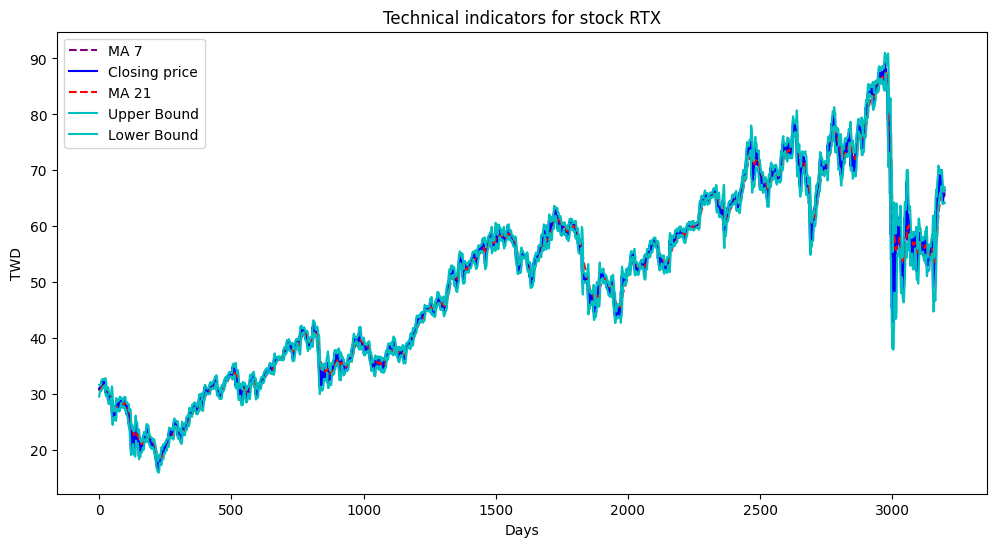

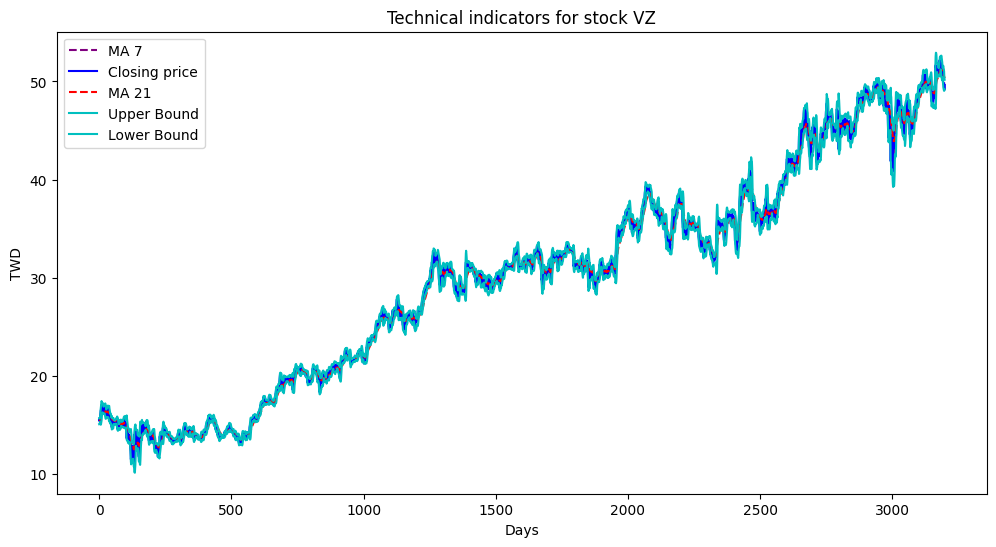

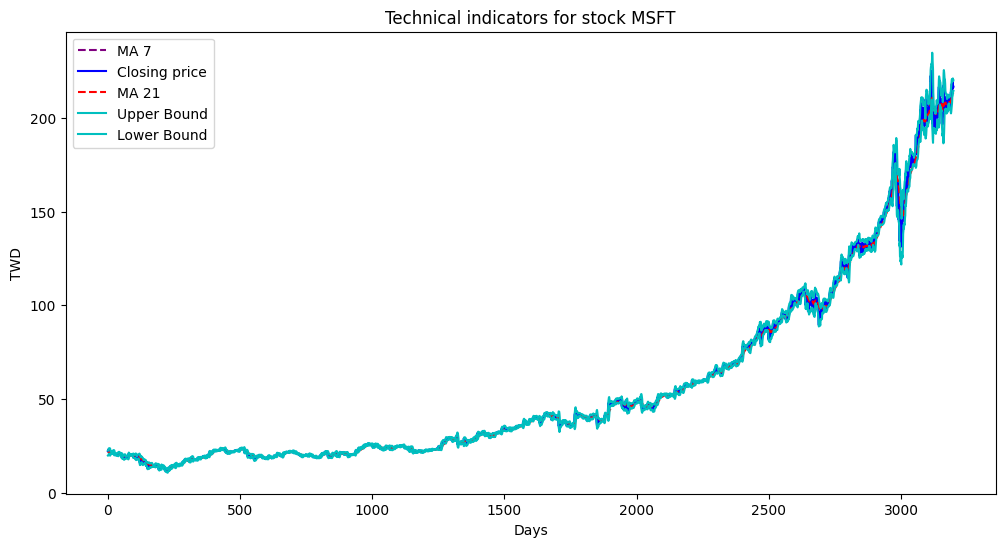

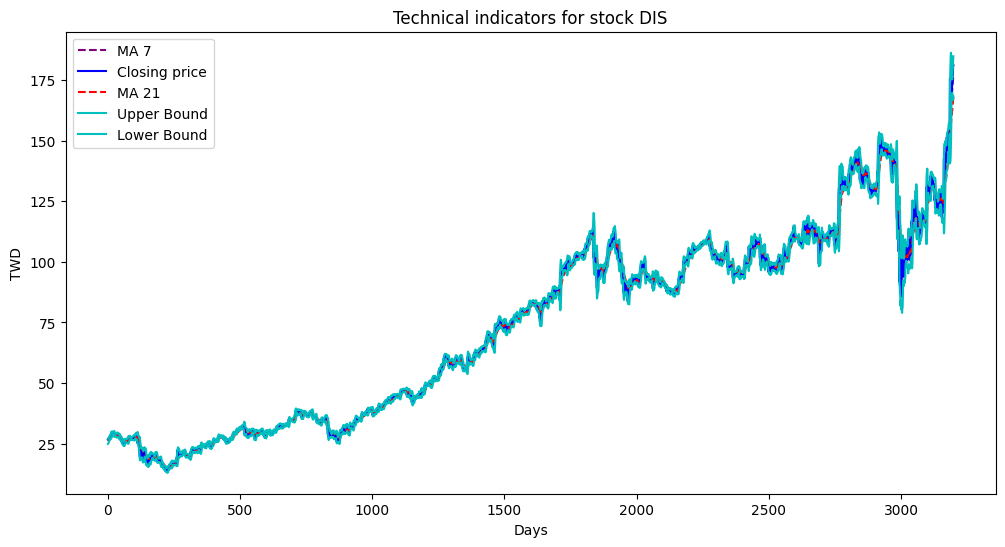

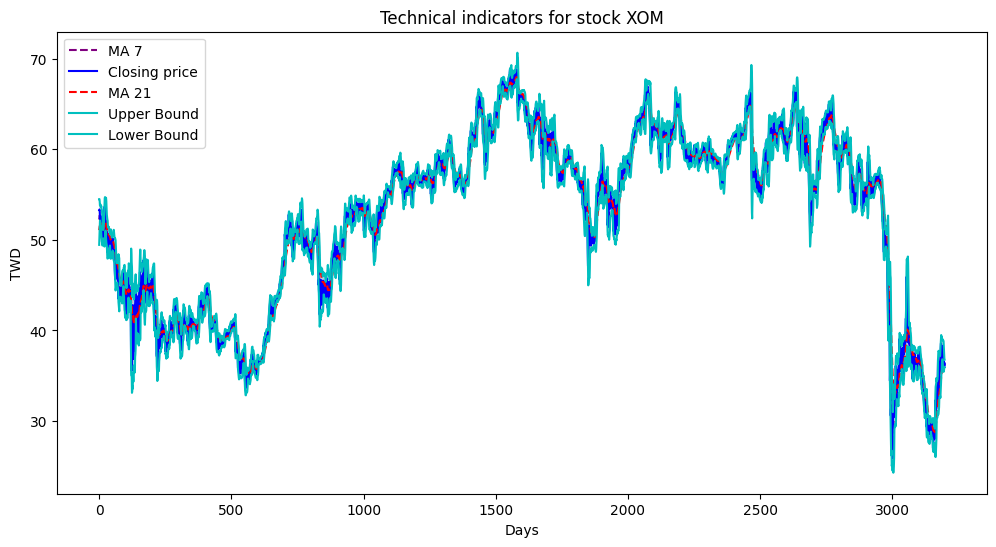

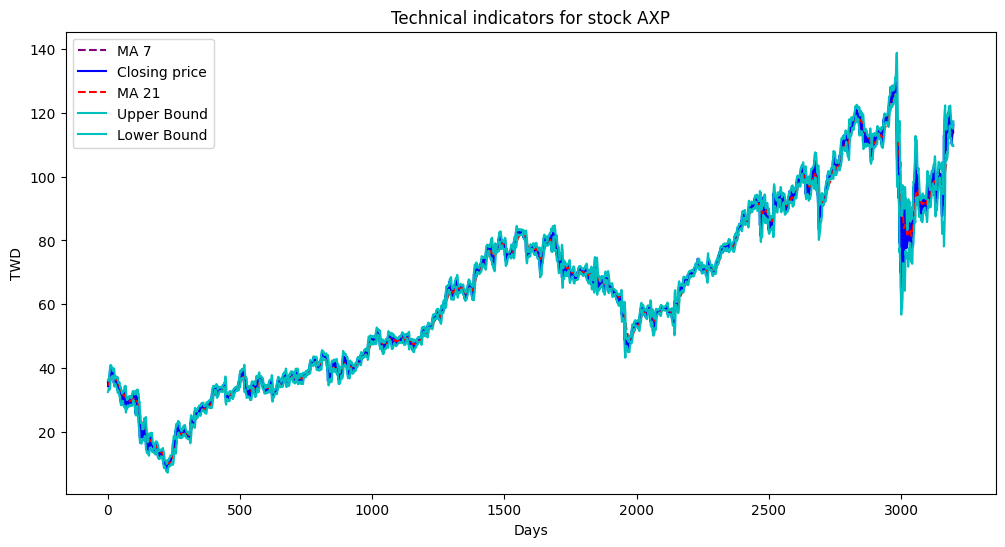

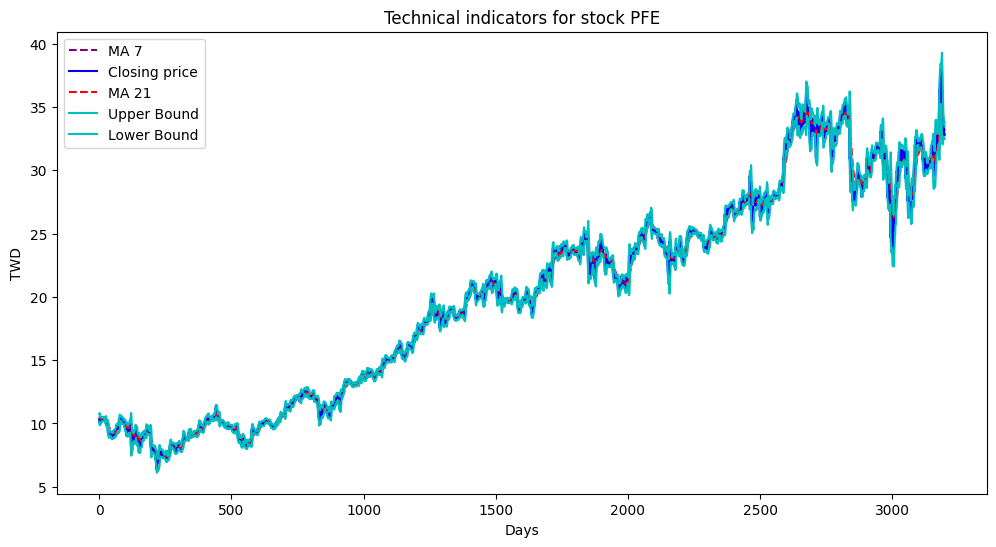

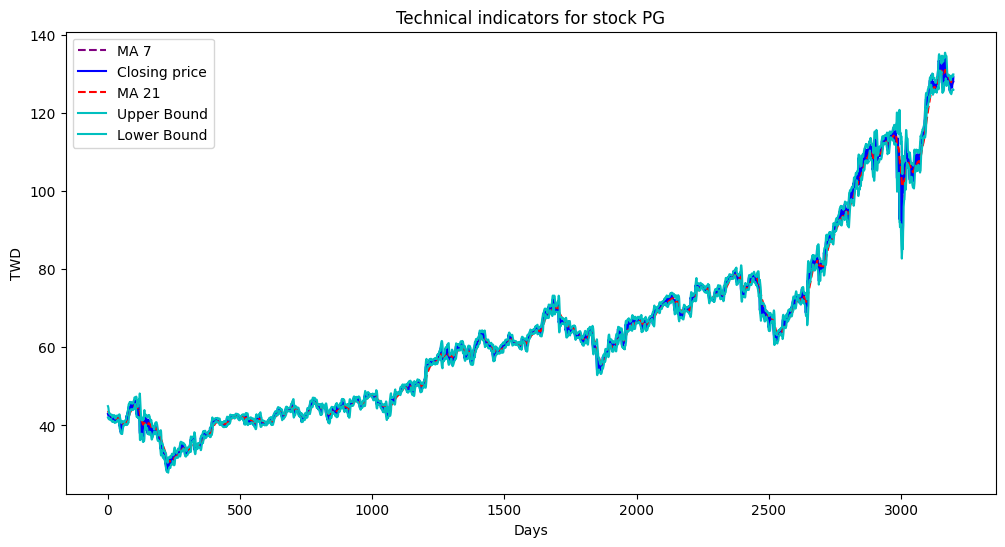

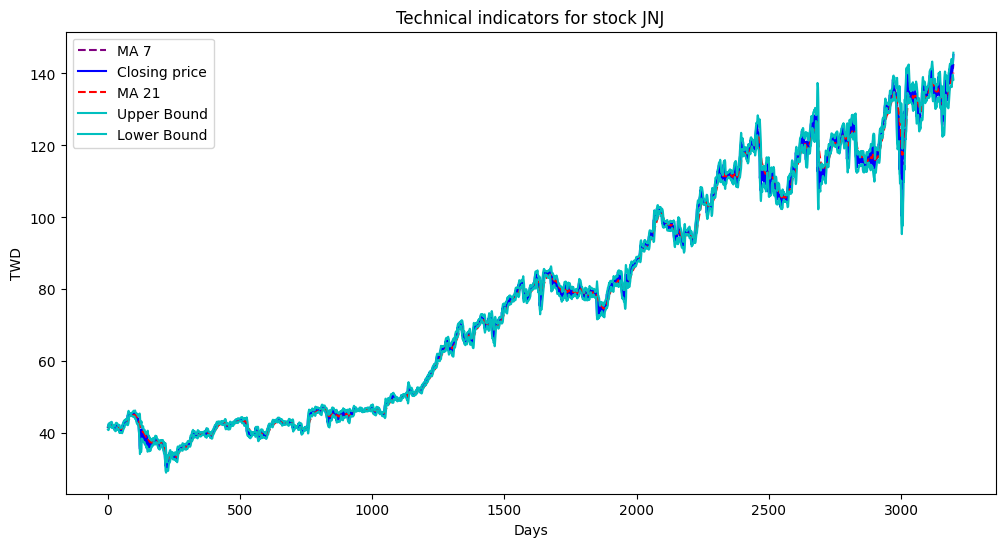

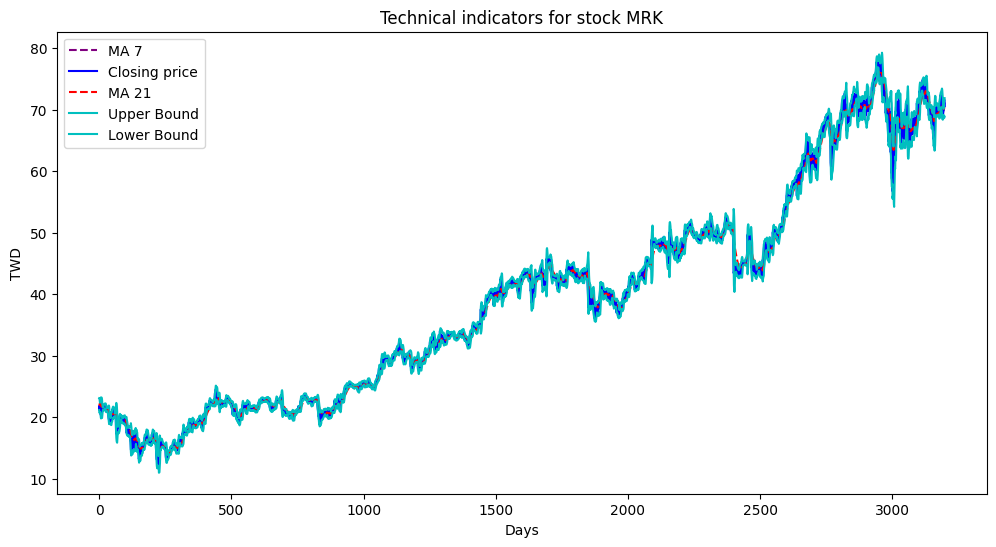

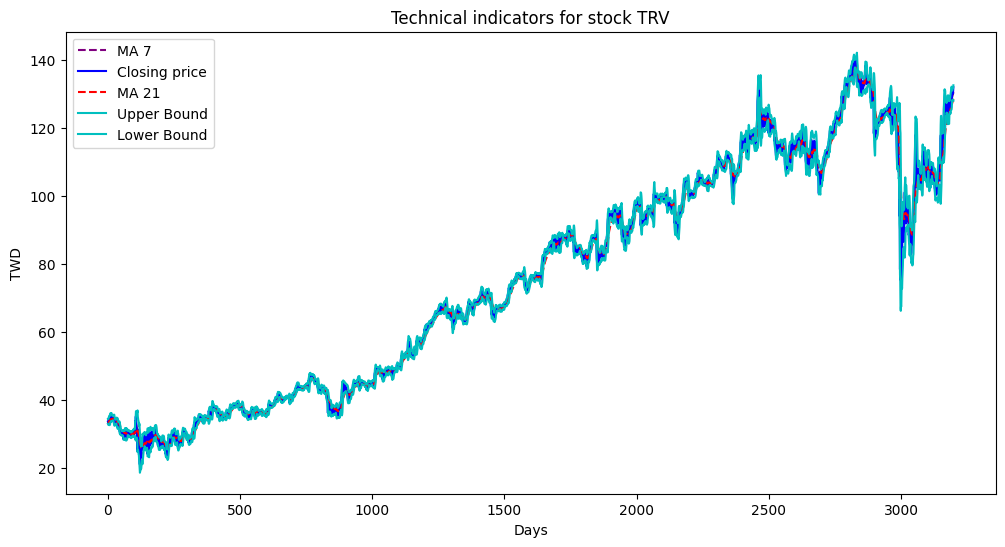

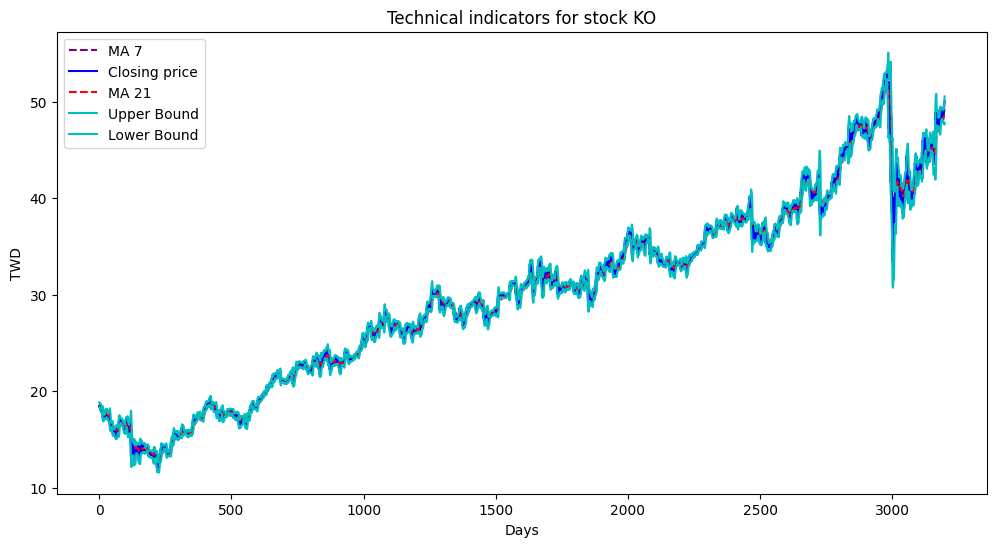

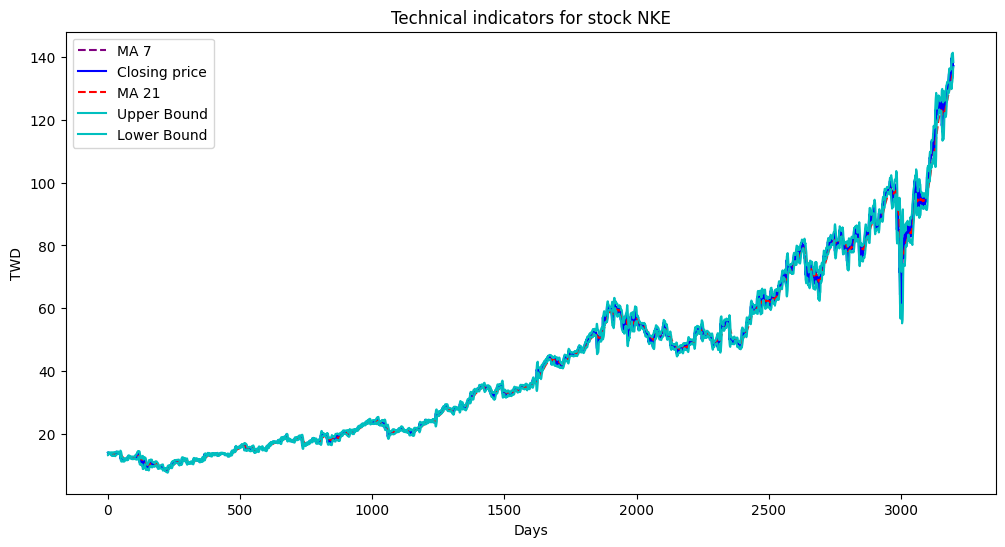

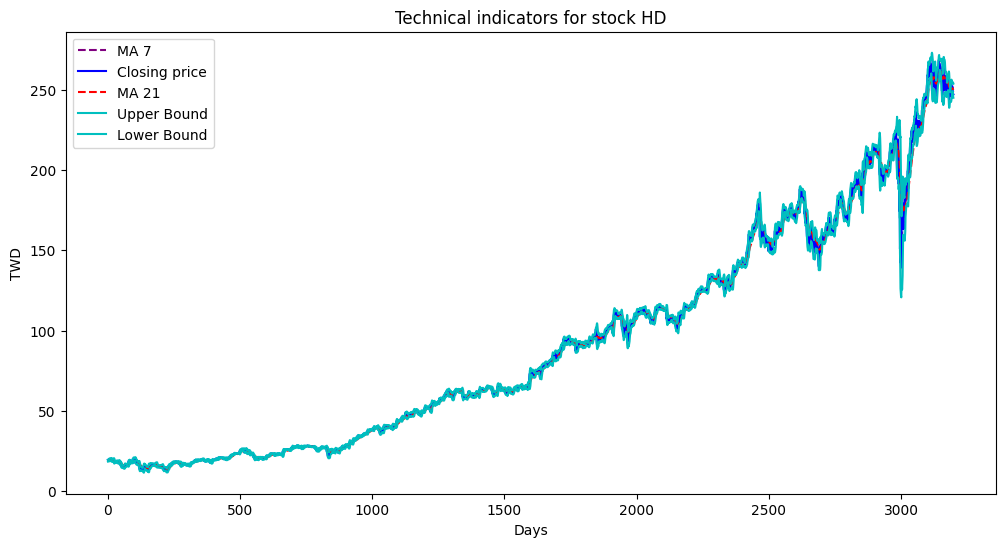

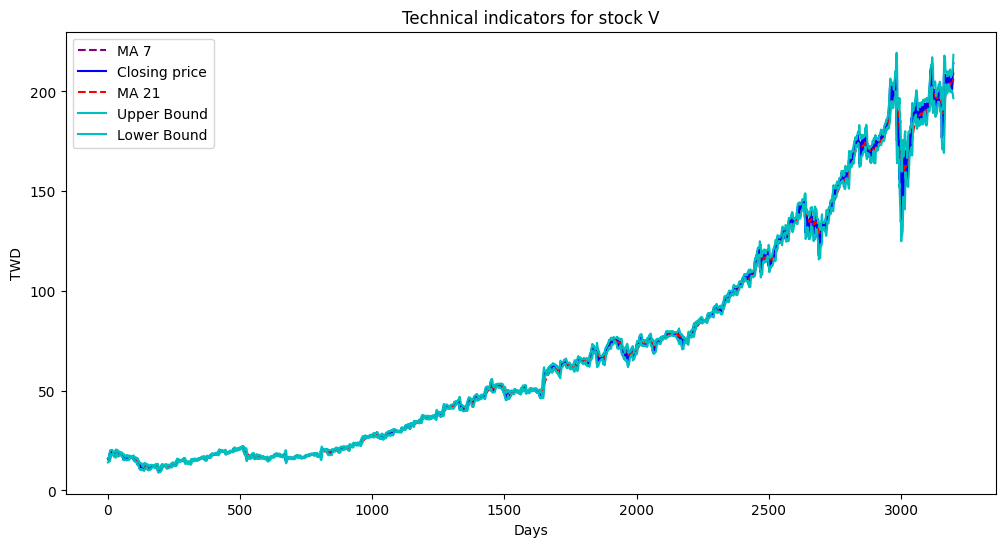

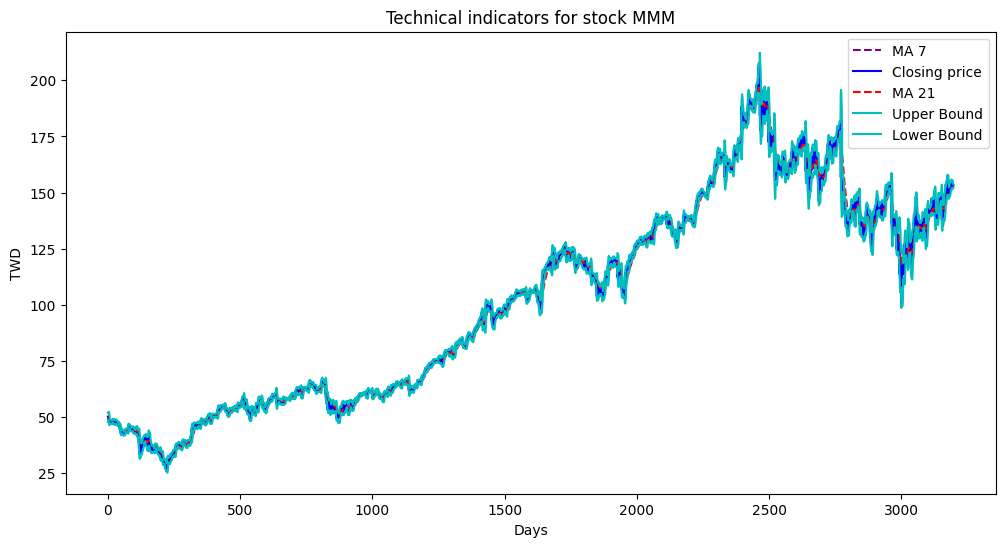

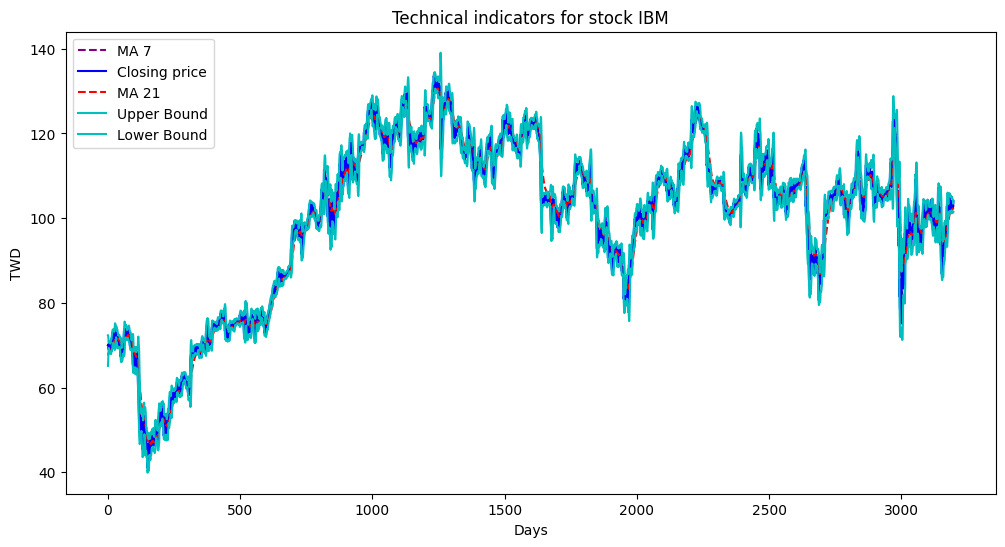

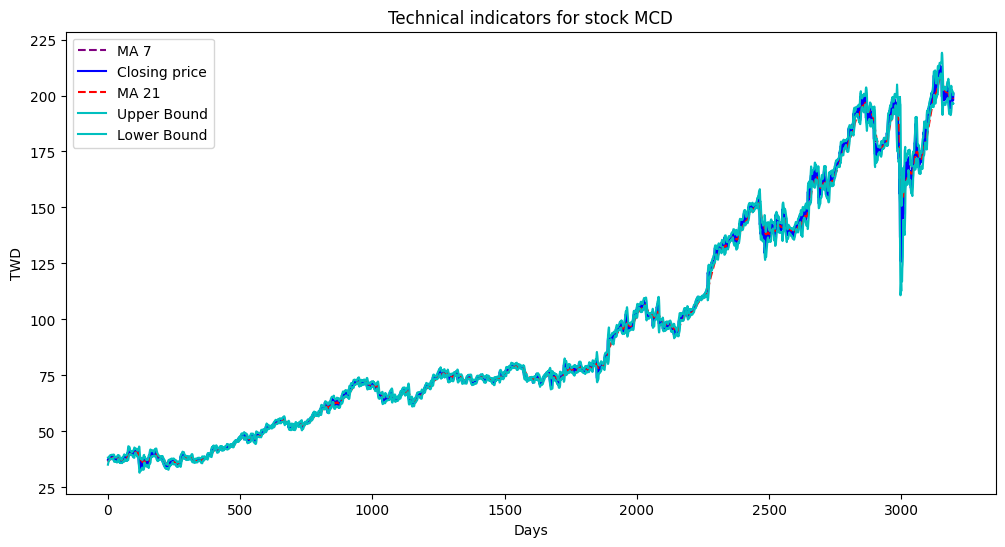

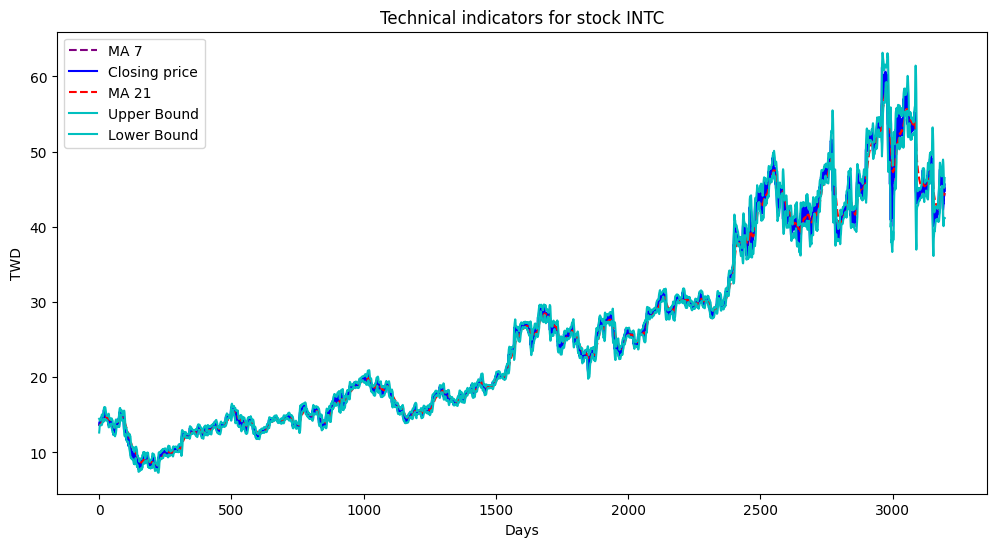

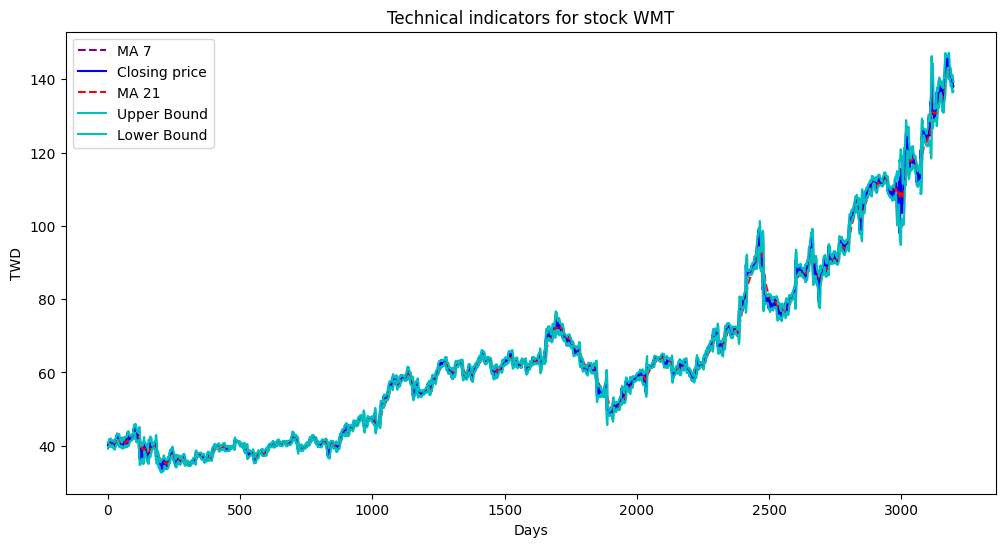

In [ ]:
# Create a unique graph for each tic value
tic_values = pd.unique(data_features_modified["tic"])
print(tic_values)
for tic_val in tic_values:
  data_tic = data_features_modified.loc[data_features_modified["tic"] == tic_val]
  x_ = np.arange(data_tic.shape[0])
  plt.figure(figsize=(12, 6))
  plt.plot(data_tic['7ma'].values, label = 'MA 7', color = 'purple', linestyle = '--')
  plt.plot(data_tic['close'].values, label = 'Closing price', color = 'b')
  plt.plot(data_tic['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
  plt.plot(data_tic['7upper'].values, label = 'Upper Bound', color = 'c')
  plt.plot(data_tic['7lower'].values, label = 'Lower Bound', color = 'c')
  plt.fill_between(x_, data_tic['7lower'].values, data_tic['7upper'].values, alpha = 0.35)
  plt.title('Technical indicators for stock ' + tic_val)
  plt.ylabel('TWD')
  plt.xlabel('Days')
  plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data_features_modified.to_csv('./data.csv', index=False)
data = pd.read_csv('./data.csv', index_col = 'date')
data

tic       close        high         low        open     volume  \
date                                                                         
2008-04-21  RTX   31.010979   31.118522   30.800196   30.963660  5756788.0   
2008-04-22  RTX   30.731384   30.929262   30.507695   30.821719  6505684.0   
2008-04-23  RTX   30.912060   31.118543   30.559319   30.907757  7204049.0   
2008-04-24  RTX   31.273396   31.458369   30.869035   30.972276  7180850.0   
2008-04-25  RTX   31.264801   31.449775   31.011000   31.402454  5399740.0   
...         ...         ...         ...         ...         ...        ...   
2020-12-24  WMT  137.487091  138.339798  137.180493  137.525409  3018200.0   
2020-12-28  WMT  139.135025  139.211675  137.324220  138.004462  6448300.0   
2020-12-29  WMT  138.253601  139.738657  137.573345  139.537449  5979400.0   
2020-12-30  WMT  138.138626  139.067983  137.908692  138.809307  6250400.0   
2020-12-31  WMT  138.109848  138.224830  136.864332  138.157756  5938000.0   

                  atr         bbw           obv       cmf  ...     21atr  \
date                                                       ...             
2008-04-21  19.118755  197.281512 -2.175732e+09  0.249896  ...  0.584007   
2008-04-22  18.517429  200.727668 -2.165955e+09  0.055374  ...  0.573356   
2008-04-23  18.468942  208.341534 -2.211845e+09 -0.108842  ...  0.578477   
2008-04-24  19.831944  182.662720 -2.247820e+09  0.425198  ...  0.592201   
2008-04-25  23.906830  217.497956 -2.440440e+09  0.222600  ...  0.586261   
...               ...         ...           ...       ...  ...       ...   
2020-12-24  87.466202  199.489354 -2.986521e+11 -0.182943  ...  1.871160   
2020-12-28  86.373097  203.301548 -2.986639e+11 -0.000340  ...  1.907399   
2020-12-29  93.649992  216.162308 -2.986917e+11 -0.158844  ...  1.936868   
2020-12-30  73.751274  208.826675 -2.987644e+11 -0.419058  ...  1.862519   
2020-12-31  79.289925  210.360556 -2.988011e+11  0.054067  ...  1.836389   

                7upper      7lower     14upper     14lower     21upper  \
date                                                                     
2008-04-21   31.686656   29.567165   31.454782   29.893672   31.456241   
2008-04-22   31.594680   29.893891   31.462650   29.901783   31.482058   
2008-04-23   31.499597   30.218807   31.492024   29.940010   31.525235   
2008-04-24   31.577008   30.369999   31.575226   29.916418   31.606955   
2008-04-25   31.586678   30.366477   31.646016   29.900322   31.662719   
...                ...         ...         ...         ...         ...   
2020-12-24  141.215989  136.460080  142.963351  136.780319  146.474242   
2020-12-28  141.163884  136.454690  142.695353  136.726587  146.002326   
2020-12-29  140.697364  136.428473  141.934436  136.857123  145.537210   
2020-12-30  140.143860  136.497449  141.446800  136.858864  144.681381   
2020-12-31  139.295264  136.847828  141.079181  136.830923  143.662599   

               21lower        7rsv       14rsv       21rsv  
date                                                        
2008-04-21   29.440741   82.579754   82.579754   86.764011  
2008-04-22   29.459989   54.924009   61.613211   70.833528  
2008-04-23   29.486460   58.153668   75.161910   81.127897  
2008-04-24   29.531333  100.000000  100.000000  100.000000  
2008-04-25   29.609537   98.953973   99.369737   99.518570  
...                ...         ...         ...         ...  
2020-12-24  136.172479    9.721516    4.924328    3.106238  
2020-12-28  136.091705   69.443584   35.175895   22.188749  
2020-12-29  135.941095   39.273304   23.946974   11.982161  
2020-12-30  136.062062   34.909539   25.131224   10.830346  
2020-12-31  136.356877   46.499017   24.602686   13.773688  

[63975 rows x 38 columns]

In [ ]:
# Create individual data sets for each stock index, then drop the tic and unnamed columns
stock_df_dict = {}
tic_values = pd.unique(data["tic"])
for tic_val in tic_values:
    data_tic = data.loc[data["tic"] == tic_val]
    data_tic = data_tic.drop("tic", axis = 1)
    data_tic = data_tic.drop("obv", axis = 1)
    data_tic = data_tic.drop("7rsi", axis = 1)
    data_tic = data_tic.drop("14rsi", axis = 1)
    data_tic = data_tic.drop("21rsi", axis = 1)
    stock_df_dict[tic_val] = data_tic

stock_df_dict.keys()

dict_keys(['RTX', 'VZ', 'MSFT', 'DIS', 'XOM', 'AXP', 'PFE', 'PG', 'JNJ', 'MRK', 'TRV', 'KO', 'NKE', 'HD', 'V', 'MMM', 'IBM', 'MCD', 'INTC', 'WMT'])

In [ ]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        )

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [ ]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [ ]:
train_dict = {}
test_dict = {}

for tic in stock_df_dict.items():
  tic[1]['y'] = tic[1]['close']
  print(tic[1].columns.to_series()[np.isinf(tic[1]).any()])
  x = tic[1].iloc[:, :33].values
  y = tic[1].iloc[:, 33].values

  split = int(tic[1].shape[0]* 0.8)
  train_x, test_x = x[: split, :], x[split:, :]
  train_y, test_y = y[: split, ], y[split: , ]

  x_scaler = MinMaxScaler(feature_range = (0, 1))
  y_scaler = MinMaxScaler(feature_range = (0, 1))

  train_x = x_scaler.fit_transform(train_x)
  test_x = x_scaler.transform(test_x)

  train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
  test_y = y_scaler.transform(test_y.reshape(-1, 1))

  print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
  print(f'testX: {test_x.shape} testY: {test_y.shape}')

  train_dict[tic[0]] = (train_x, train_y)
  test_dict[tic[0]] = (test_x, test_y)

train_dict
test_dict

Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559, 33) trainY: (2559, 1)
testX: (640, 33) testY: (640, 1)
Series([], dtype: object)
trainX: (2559,

{'RTX': (array([[0.8899918 , 0.8998317 , 0.90080754, ..., 0.        , 0.06867113,
          0.06867113],
         [0.89289807, 0.88736105, 0.90023707, ..., 0.11071536, 0.09935895,
          0.16120698],
         [0.87527284, 0.88239149, 0.88606975, ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.83206245, 0.83527772, 0.83433242, ..., 0.741498  , 0.25407982,
          0.2084137 ],
         [0.84822259, 0.84383422, 0.84509803, ..., 1.        , 0.56568301,
          0.40344118],
         [0.8505991 , 0.84478489, 0.85473911, ..., 1.        , 0.62087766,
          0.43212188]]),
  array([[0.8899918 ],
         [0.89289807],
         [0.87527284],
         [0.88830409],
         [0.88586634],
         [0.89552281],
         [0.88352273],
         [0.88577284],
         [0.88980403],
         [0.88980403],
         [0.88877273],
         [0.88905387],
         [0.8932727 ],
         [0.90527291],
         [0.90883546],
         [0.88839784],
         [0.91155408]

Streaming output truncated to the last 5000 lines.
[101/300] Loss: 74.35237002372742
[102/300] Loss: 73.33946371078491
[103/300] Loss: 72.67989492416382
[104/300] Loss: 72.29089164733887
[105/300] Loss: 72.03864789009094
[106/300] Loss: 71.75312685966492
[107/300] Loss: 71.25906038284302
[108/300] Loss: 70.43791437149048
[109/300] Loss: 69.25222945213318
[110/300] Loss: 67.75427436828613
[111/300] Loss: 66.06562352180481
[112/300] Loss: 64.35150933265686
[113/300] Loss: 62.77061748504639
[114/300] Loss: 61.44911575317383
[115/300] Loss: 60.44251203536987
[116/300] Loss: 59.752519607543945
[117/300] Loss: 59.33421349525452
[118/300] Loss: 59.10858154296875
[119/300] Loss: 58.99037408828735
[120/300] Loss: 58.88114309310913
[121/300] Loss: 58.6967556476593
[122/300] Loss: 58.37386512756348
[123/300] Loss: 57.875861167907715
[124/300] Loss: 57.21007204055786
[125/300] Loss: 56.39389085769653
[126/300] Loss: 55.476722717285156
[127/300] Loss: 54.51931715011597
[128/300] Loss: 53.5755236148

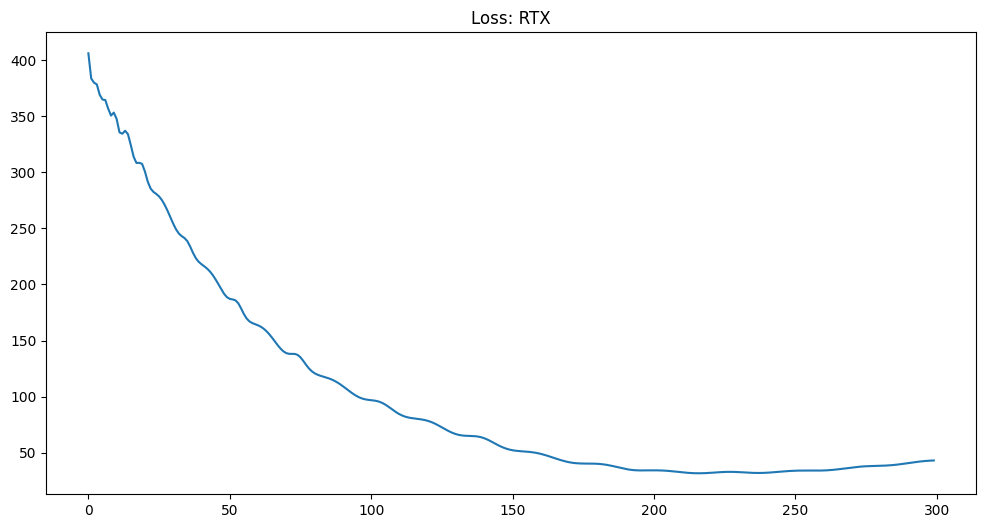

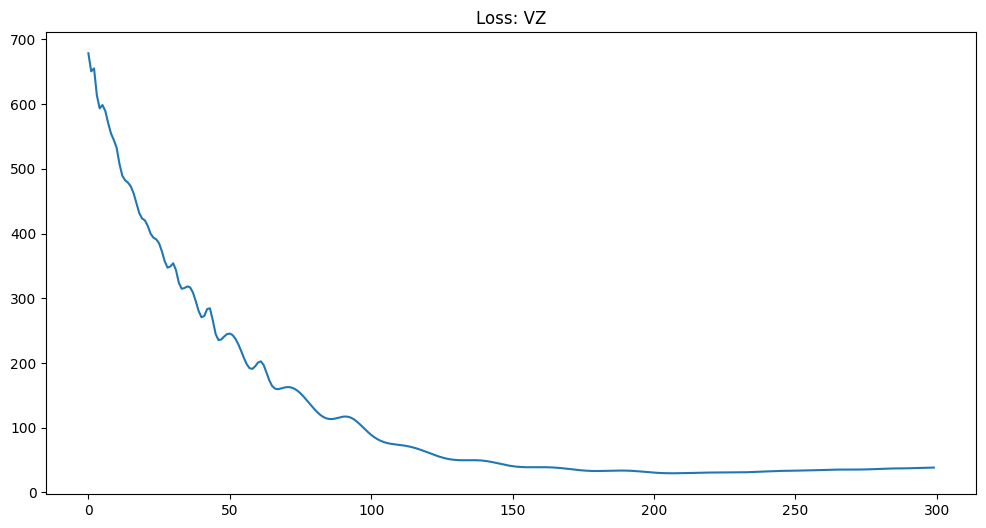

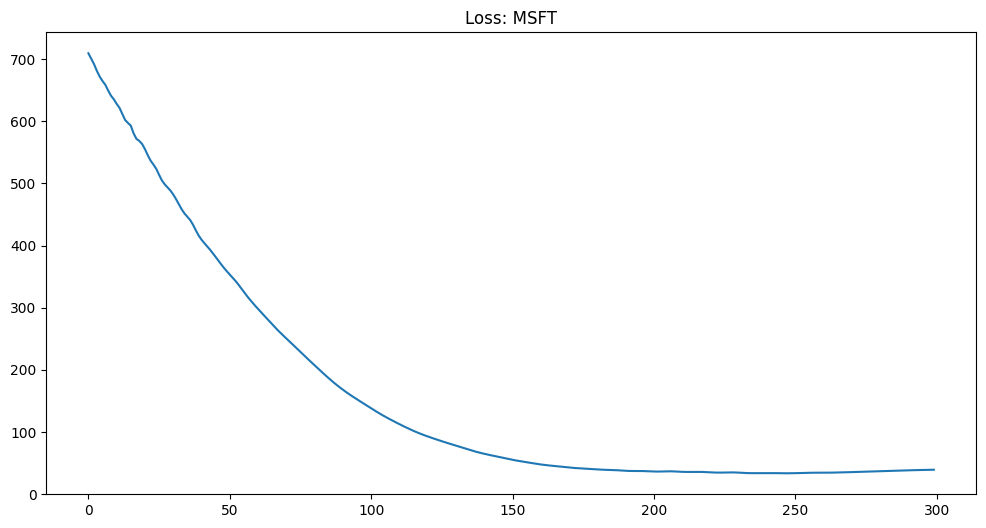

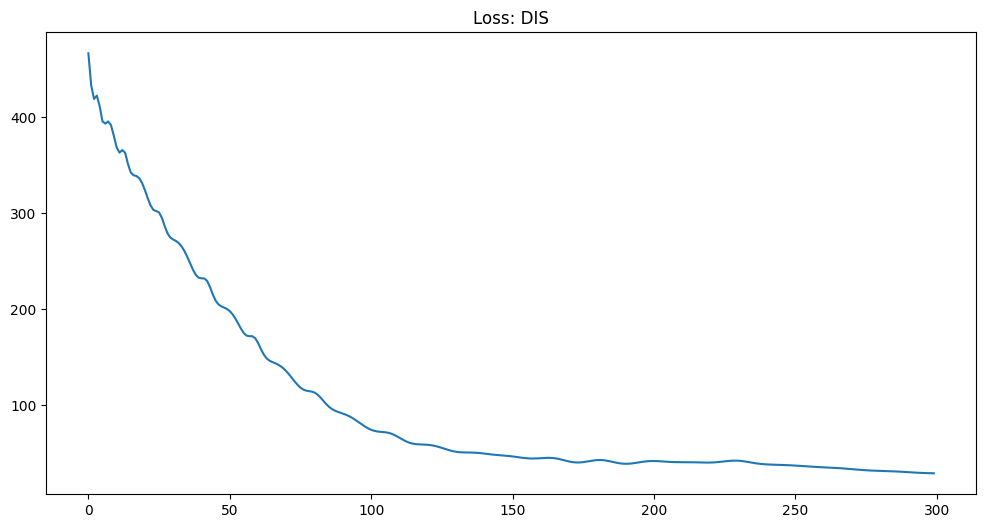

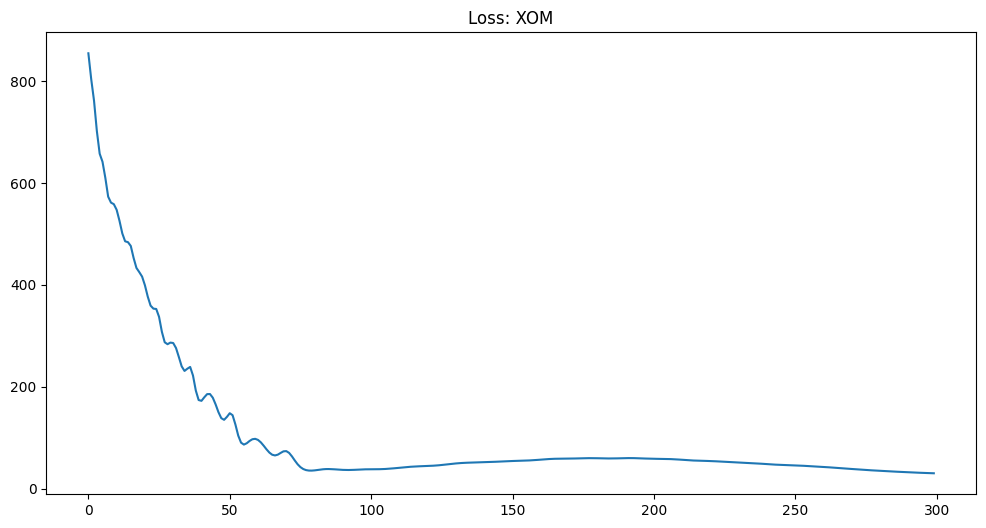

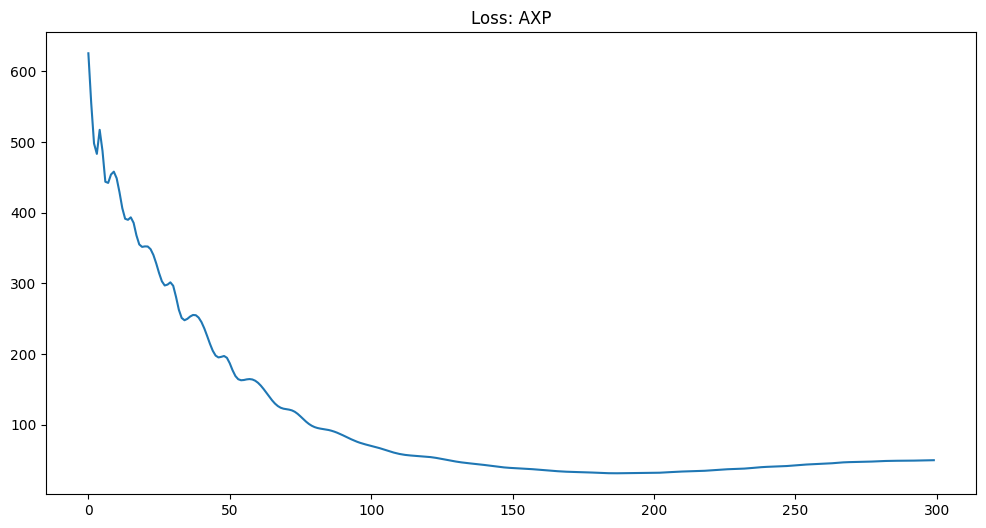

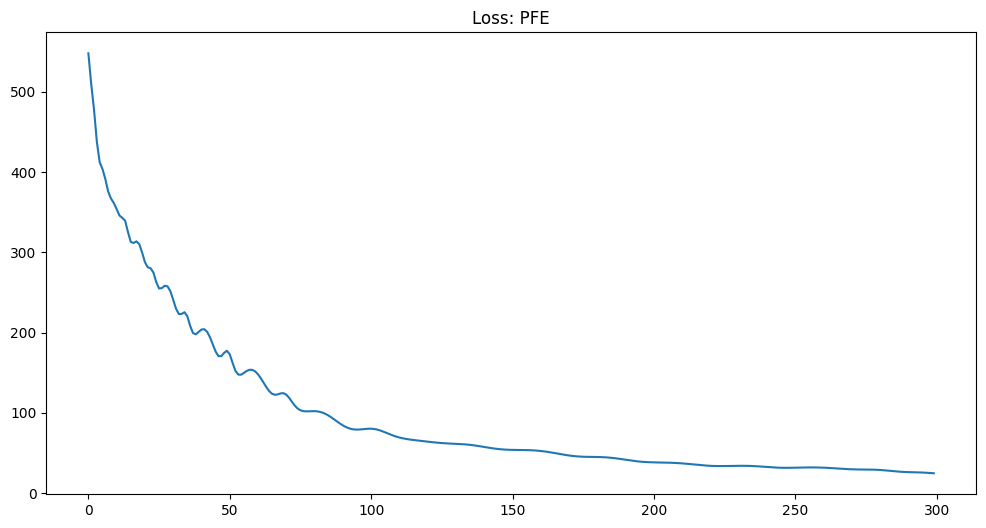

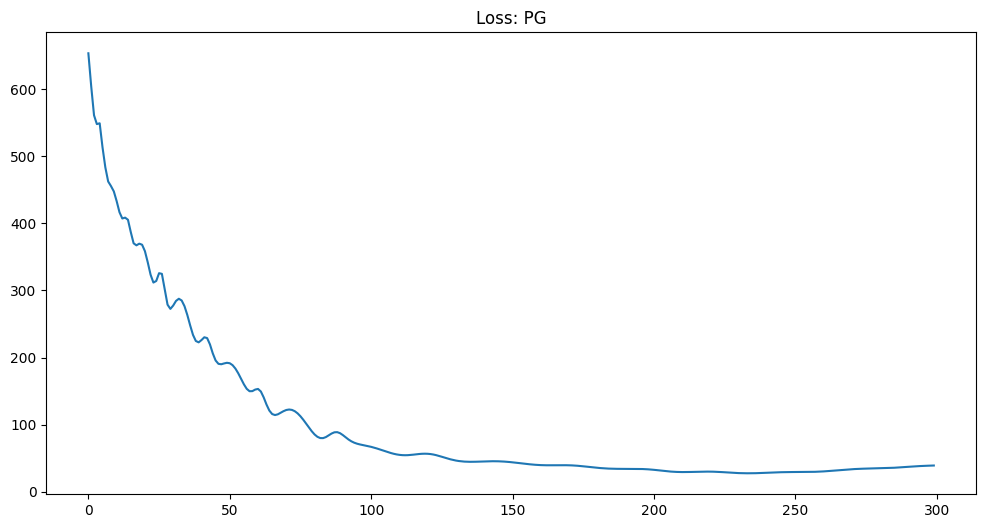

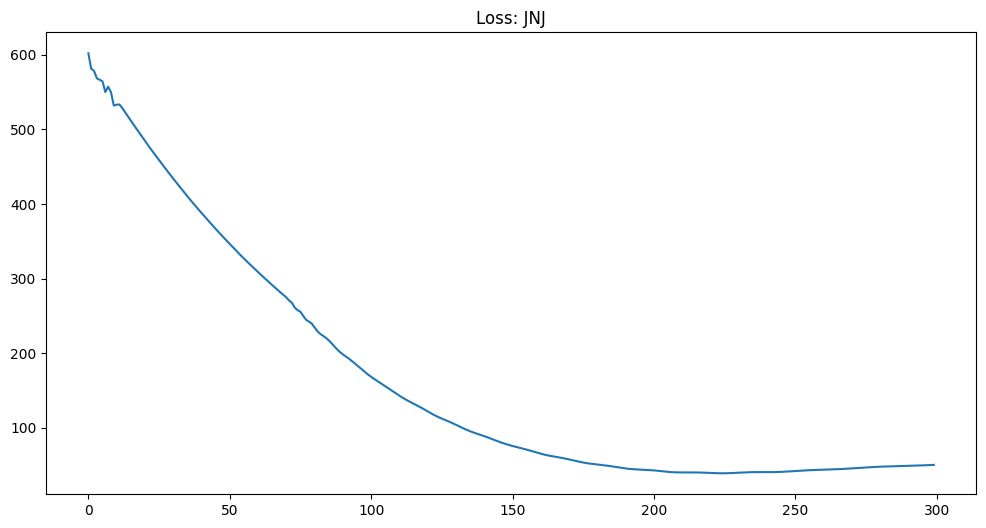

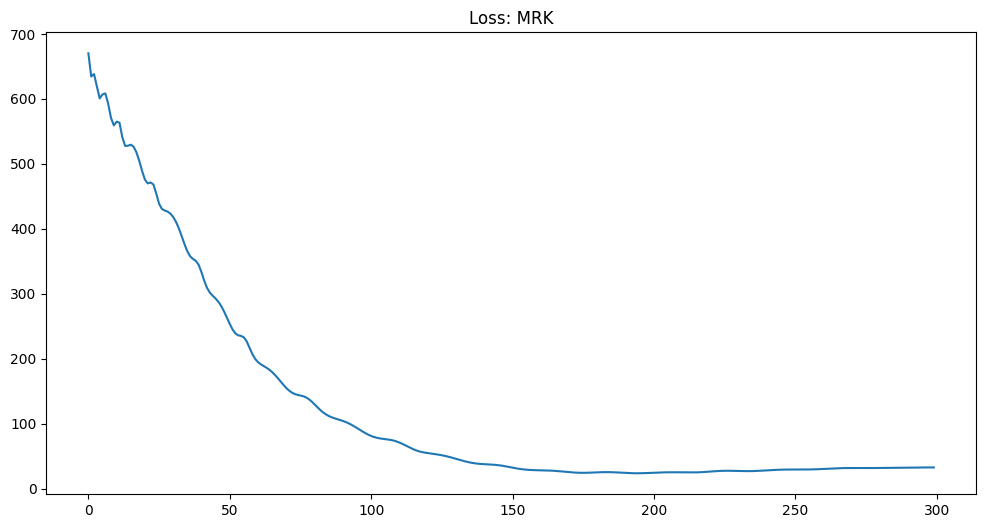

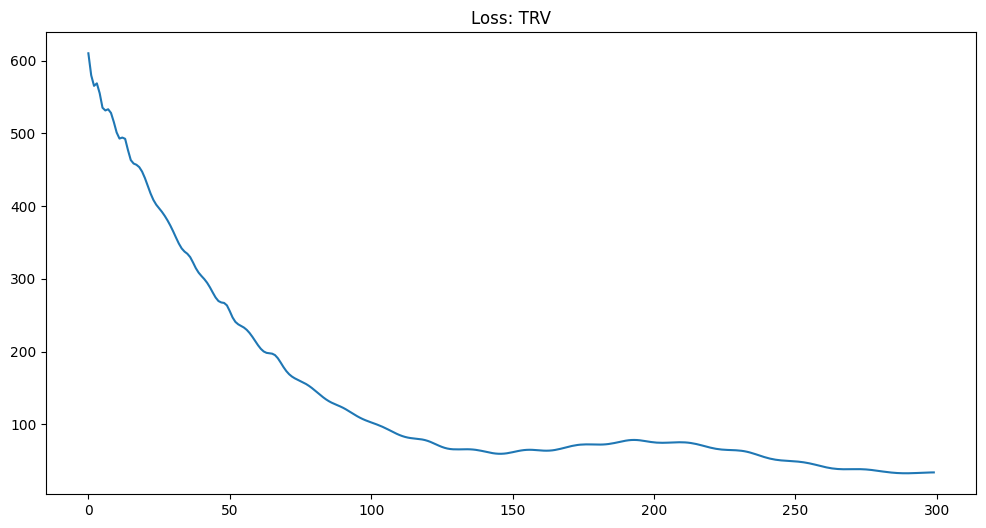

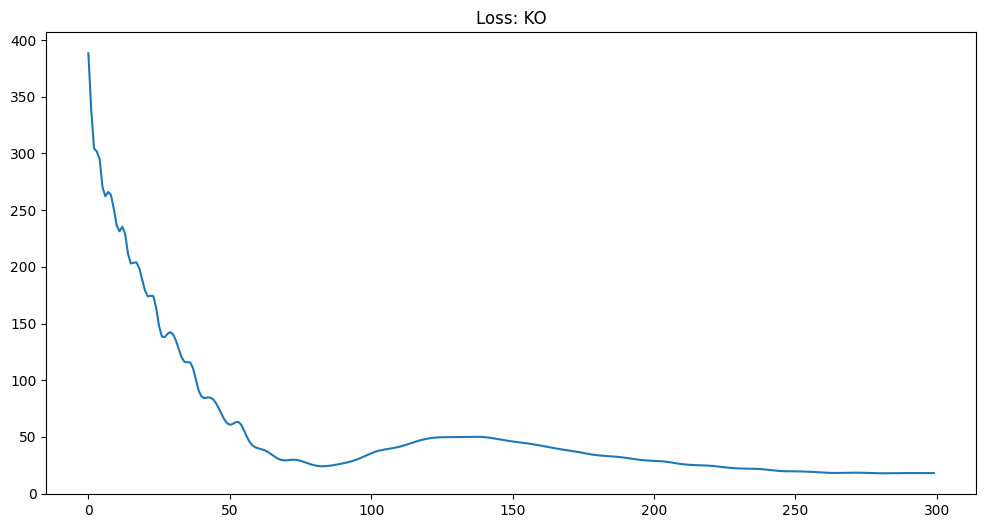

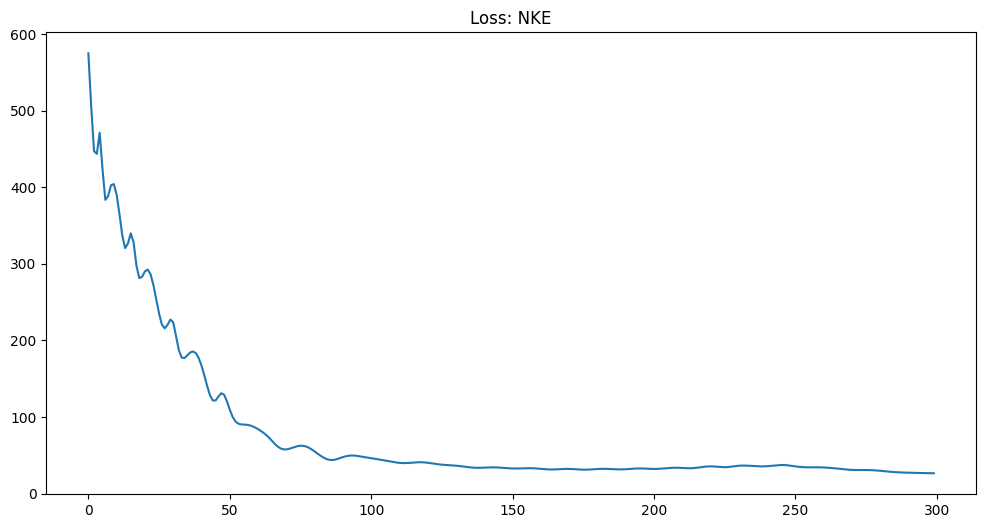

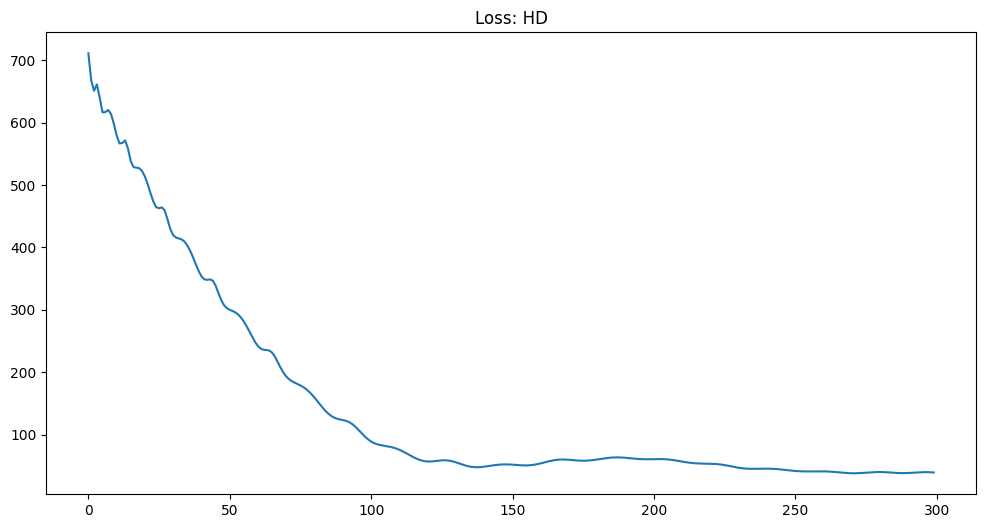

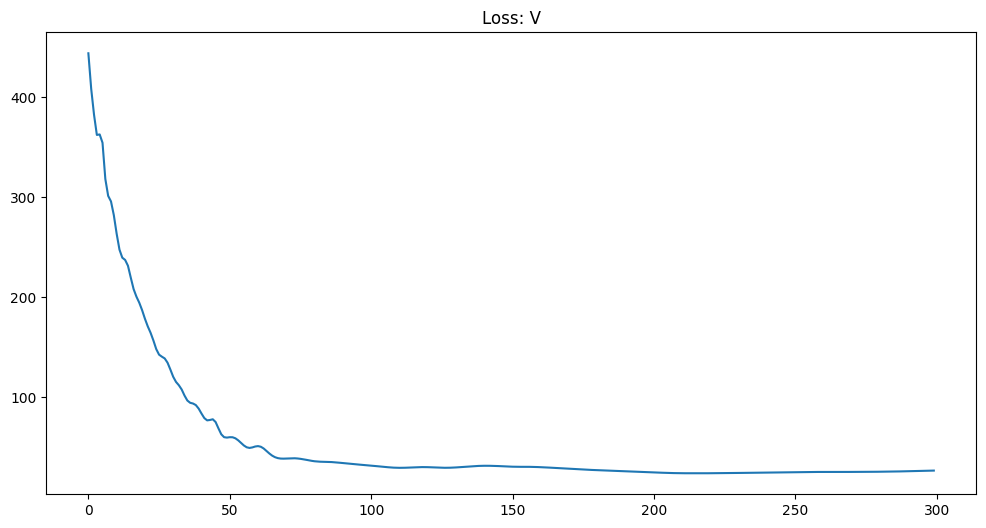

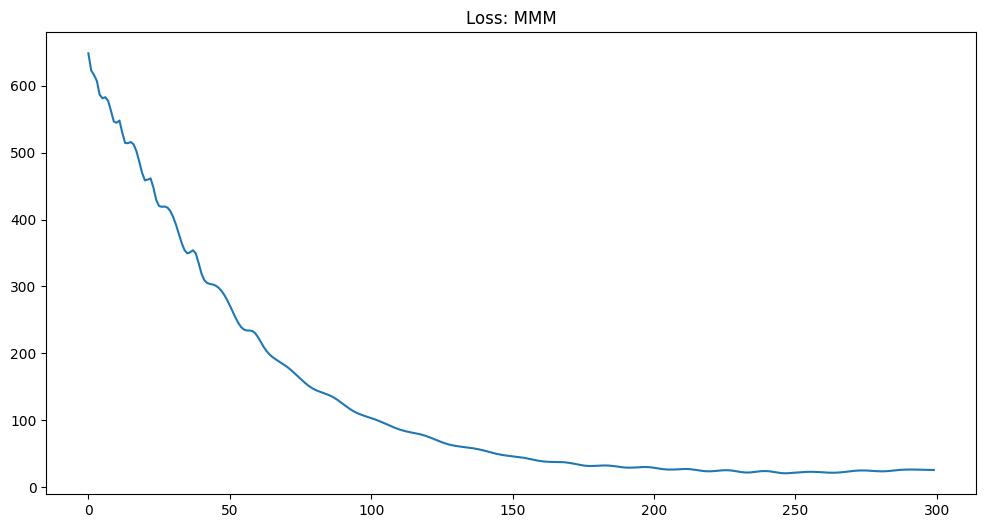

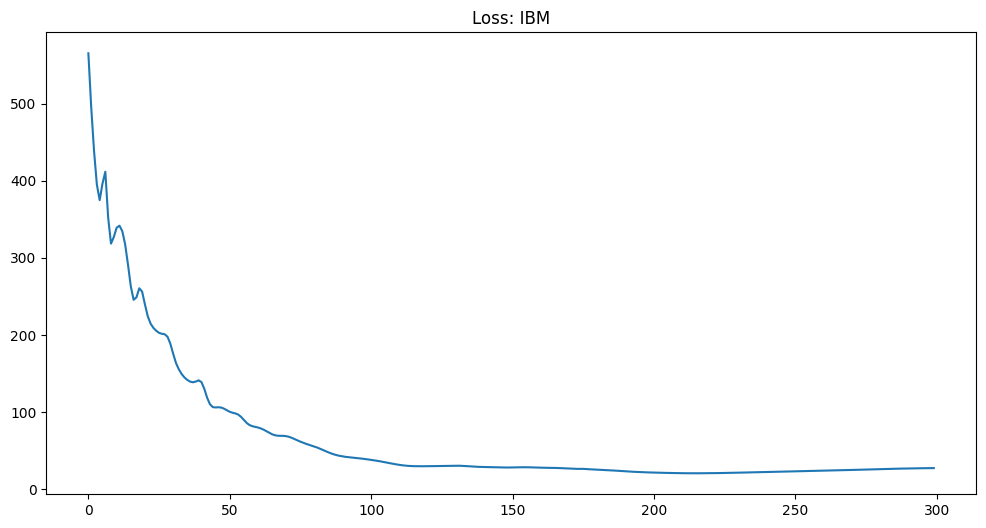

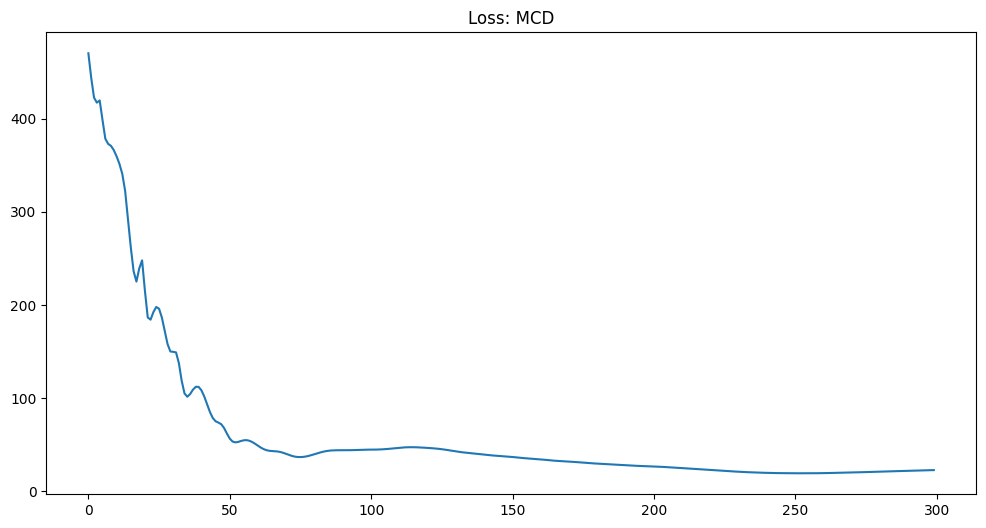

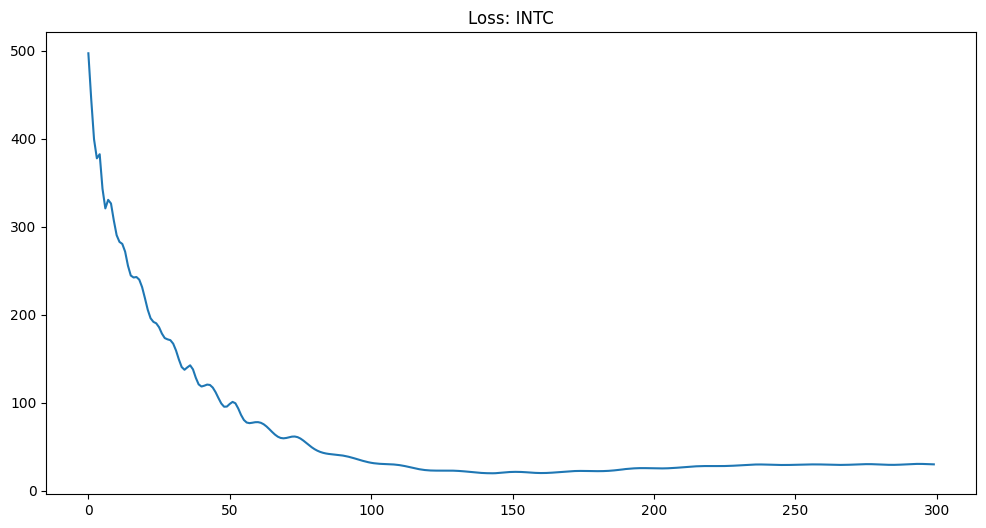

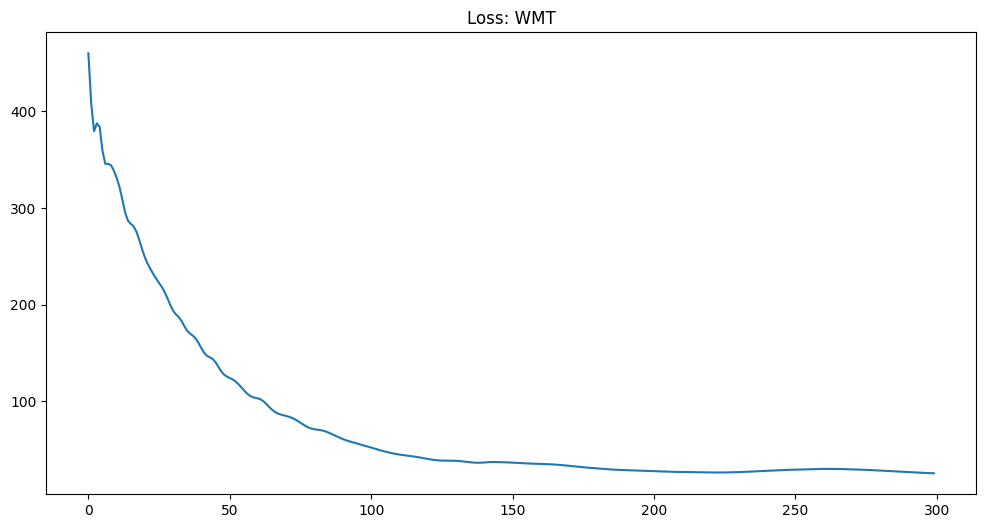

In [ ]:
model_dict = {}

for item in train_dict.items():

  train_loader = DataLoader(TensorDataset(torch.from_numpy(item[1][0]).float()), batch_size = 128, shuffle = False)
  model = VAE([33, 400, 400, 400, 10], 10)
  use_cuda = 1
  device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
  num_epochs = 300
  learning_rate = 0.00003
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

  hist = np.zeros(num_epochs)
  for epoch in range(num_epochs):
      total_loss = 0
      loss_ = []
      for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
      hist[epoch] = sum(loss_)
      print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

  plt.figure(figsize=(12, 6))
  plt.plot(hist)
  plt.title("Loss: " + item[0])
  model_dict[item[0]] = model

In [ ]:
print(model_dict)

{'RTX': VAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=33, out_features=400, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (3): Sequential(
      (0): Linear(in_features=400, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (fc_mu): Linear(in_features=10, out_features=10, bias=True)
  (fc_var): Linear(in_features=10, out_features=10, bias=True)
  (decoder_input): Linear(in_features=10, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=10, out_features=400, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=400, out_features=400, bias=True)
  

In [ ]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

Train data

In [ ]:
#model.eval()
model_dict_trained = {}
slide_dict_train = {}
for item in train_dict.items():
    model_dict[item[0]].eval()
    _, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(item[1][0]).float().to(device))
    train_x= np.concatenate((item[1][0], VAE_train_x.cpu().detach().numpy()), axis = 1)
    train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, item[1][1], 3)

    slide_dict_train[item[0]] = (train_x_slide, train_y_slide, train_y_gan)

    print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')

    use_cuda = 1
    device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

    batch_size = 128
    learning_rate = 0.0002
    num_epochs = 150

    trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

    modelG = Generator(43).to(device)
    modelD = Discriminator().to(device)

    criterion = nn.BCELoss()
    optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
    optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

    histG = np.zeros(num_epochs)
    histD = np.zeros(num_epochs)
    count = 0
    for epoch in range(num_epochs):
        loss_G = []
        loss_D = []
        for (x, y) in trainDataloader:
            x = x.to(device)
            y = y.to(device)

            fake_data = modelG(x)
            fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

            dis_real_output = modelD(y)
            real_labels = torch.ones_like(dis_real_output).to(device)
            lossD_real = criterion(dis_real_output, real_labels)


            dis_fake_output = modelD(fake_data)
            fake_labels = torch.zeros_like(real_labels).to(device)
            lossD_fake = criterion(dis_fake_output, fake_labels)

            lossD = (lossD_real + lossD_fake)

            modelD.zero_grad()
            lossD.backward(retain_graph=True)
            optimizerD.step()
            loss_D.append(lossD.item())

            output_fake = modelD(fake_data)
            lossG = criterion(output_fake, real_labels)
            modelG.zero_grad()
            lossG.backward()
            optimizerG.step()
            loss_G.append(lossG.item())
        histG[epoch] = sum(loss_G)
        histD[epoch] = sum(loss_D)
        print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

    model_dict_trained[item[0]] = (modelG, modelD)


train_x: torch.Size([2556, 3, 43]) train_y: torch.Size([2556, 1]) train_y_gan: torch.Size([2556, 4, 1])
[1/150] LossD: 27.73450767993927 LossG:14.18312293291092
[2/150] LossD: 27.72587811946869 LossG:13.872290194034576
[3/150] LossD: 27.725425243377686 LossG:13.86399257183075
[4/150] LossD: 27.725395560264587 LossG:13.863691926002502
[5/150] LossD: 27.72539710998535 LossG:13.862407863140106
[6/150] LossD: 27.725380301475525 LossG:13.863293766975403
[7/150] LossD: 27.725183606147766 LossG:13.86415845155716
[8/150] LossD: 27.72503125667572 LossG:13.86179667711258
[9/150] LossD: 27.72460150718689 LossG:13.865104734897614
[10/150] LossD: 27.724626183509827 LossG:13.86182177066803
[11/150] LossD: 27.724006056785583 LossG:13.866657435894012
[12/150] LossD: 27.723857164382935 LossG:13.864238619804382
[13/150] LossD: 27.723148941993713 LossG:13.862523972988129
[14/150] LossD: 27.722464680671692 LossG:13.865435600280762
[15/150] LossD: 27.72212028503418 LossG:13.86501806974411
[16/150] LossD: 2

In [ ]:
import pickle

with open('model_dict_trained.pk1', 'wb') as f:
    pickle.dump(model_dict_trained, f)

In [ ]:
slide_dict_test = {}
for item in test_dict.items():
    model_dict[item[0]].eval()
    _, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(item[1][0]).float().to(device))
    print(VAE_test_x.cpu().detach().shape)
    print(test_x.shape)
    test_x = np.concatenate((test_dict[item[0]][0], VAE_test_x.cpu().detach().numpy()), axis = 1)
    test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
    print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')
    slide_dict_test[item[0]] = (test_x_slide, test_y_slide, test_y_gan)

torch.Size([640, 10])
(640, 33)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 1]) test_y_gan: torch.Size([637, 4, 1])
torch.Size([640, 10])
(640, 43)
test_x: torch.Size([637, 3, 43]) test_y: torch.Size([637, 

In [ ]:
# Generate data and turn it into a dataframe
print(slide_dict_train)

{'RTX': (tensor([[[ 0.2462,  0.2391,  0.2473,  ..., -0.6218, -0.7579, -1.2501],
         [ 0.2414,  0.2359,  0.2422,  ..., -0.8713, -0.0922, -1.3870],
         [ 0.2445,  0.2391,  0.2431,  ..., -0.4023,  0.5725,  1.8333]],

        [[ 0.2414,  0.2359,  0.2422,  ..., -0.8713, -0.0922, -1.3870],
         [ 0.2445,  0.2391,  0.2431,  ..., -0.4023,  0.5725,  1.8333],
         [ 0.2507,  0.2449,  0.2484,  ...,  1.5506,  0.0325,  1.7021]],

        [[ 0.2445,  0.2391,  0.2431,  ..., -0.4023,  0.5725,  1.8333],
         [ 0.2507,  0.2449,  0.2484,  ...,  1.5506,  0.0325,  1.7021],
         [ 0.2505,  0.2448,  0.2509,  ..., -0.0238, -0.5409, -0.6597]],

        ...,

        [[ 0.9192,  0.9146,  0.9275,  ...,  0.0540,  0.6701, -2.3485],
         [ 0.9162,  0.9160,  0.9257,  ...,  0.4896,  0.1694, -0.2769],
         [ 0.9077,  0.9103,  0.9209,  ..., -0.9558, -0.6820, -0.7585]],

        [[ 0.9162,  0.9160,  0.9257,  ...,  0.4896,  0.1694, -0.2769],
         [ 0.9077,  0.9103,  0.9209,  ..., -0.

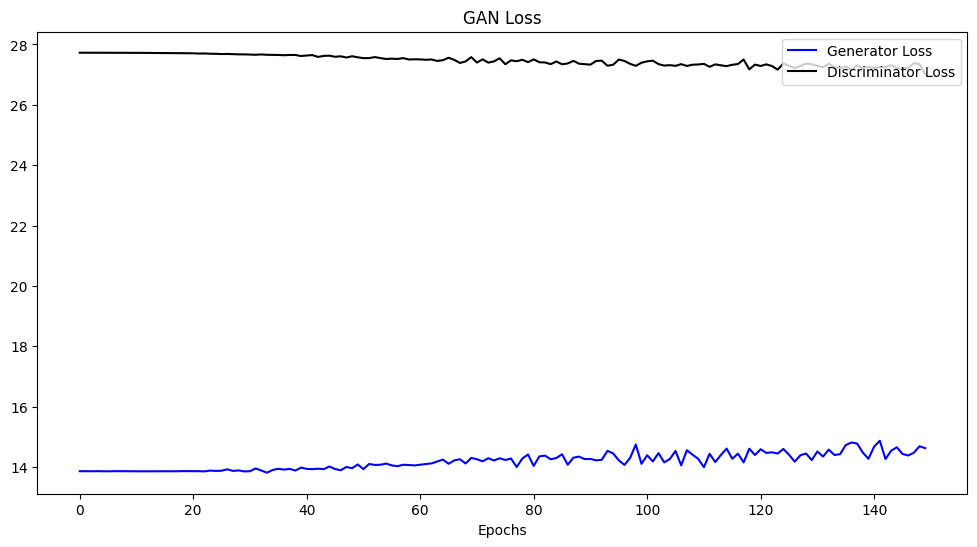

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')

Training dataset RMSE:3.178616588904256
Training dataset RMSE:3.014578792442739
Training dataset RMSE:4.071820347628915
Training dataset RMSE:2.950188216417667
Training dataset RMSE:2.2949777654699623
Training dataset RMSE:4.455401489059517
Training dataset RMSE:3.410321584288581
Training dataset RMSE:1.9601863486051538
Training dataset RMSE:1.6410533731204193
Training dataset RMSE:2.068555457368163
Training dataset RMSE:1.5347885038498639
Training dataset RMSE:2.110568395364039
Training dataset RMSE:1.7552650443321165
Training dataset RMSE:1.1925002785050378
Training dataset RMSE:3.0321280663431276
Training dataset RMSE:3.6117939820167813
Training dataset RMSE:2.358386998989259
Training dataset RMSE:5.589329308106452
Training dataset RMSE:2.888675583471294
Training dataset RMSE:1.1695368449771033


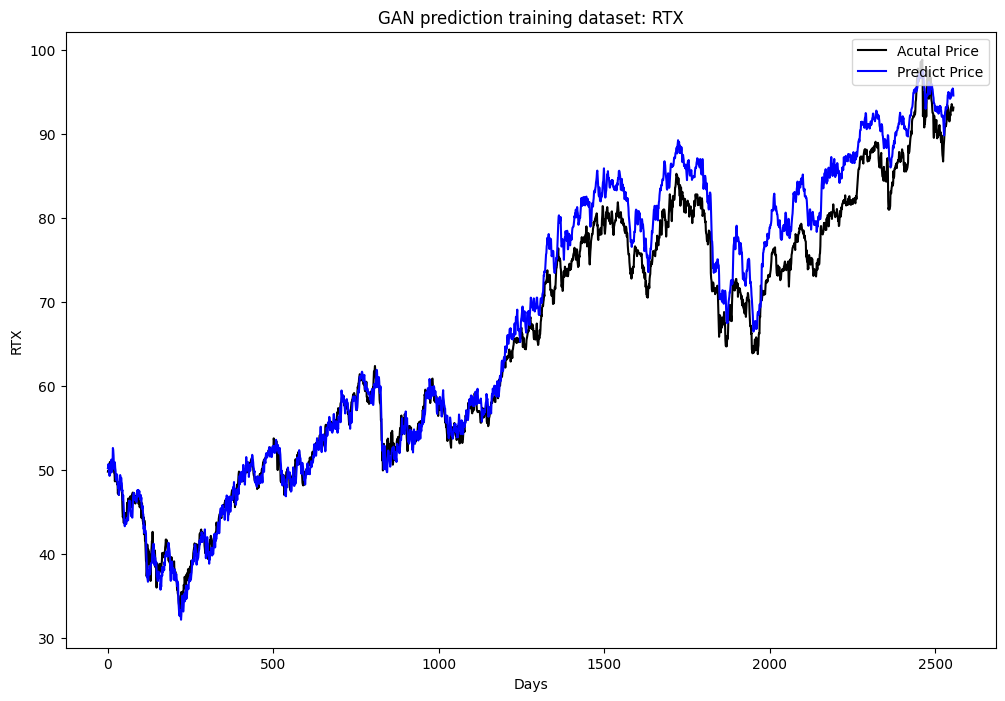

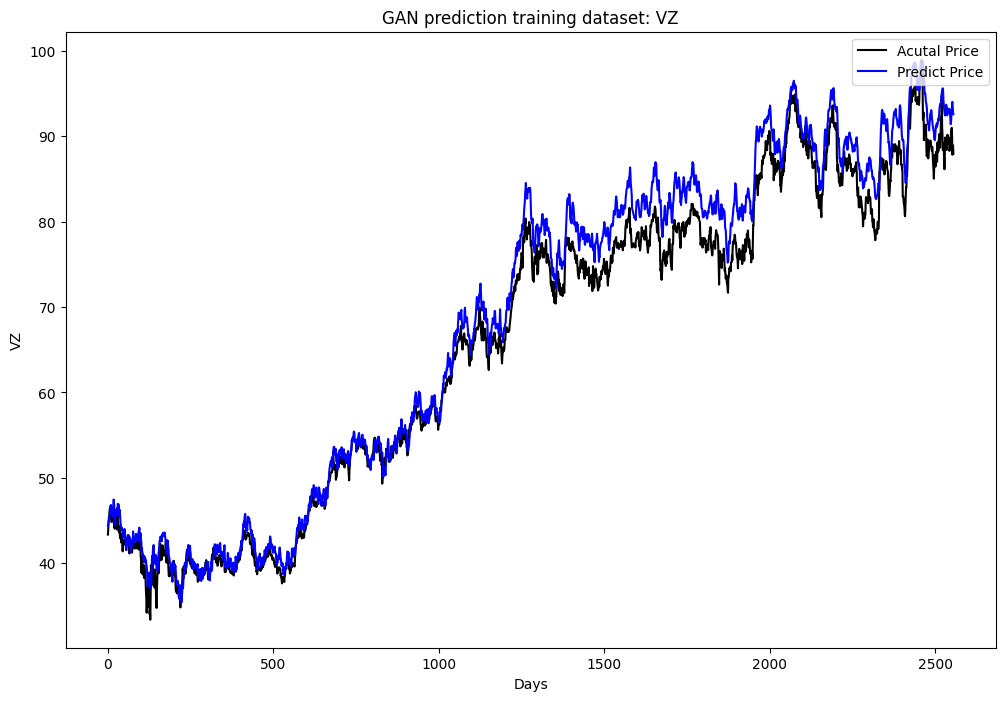

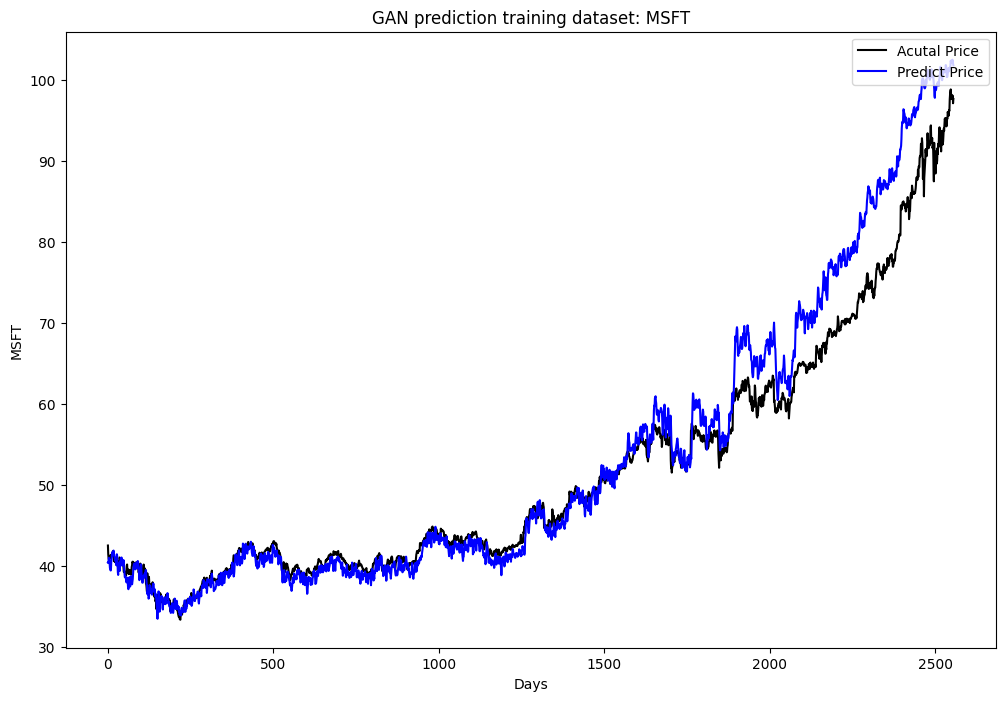

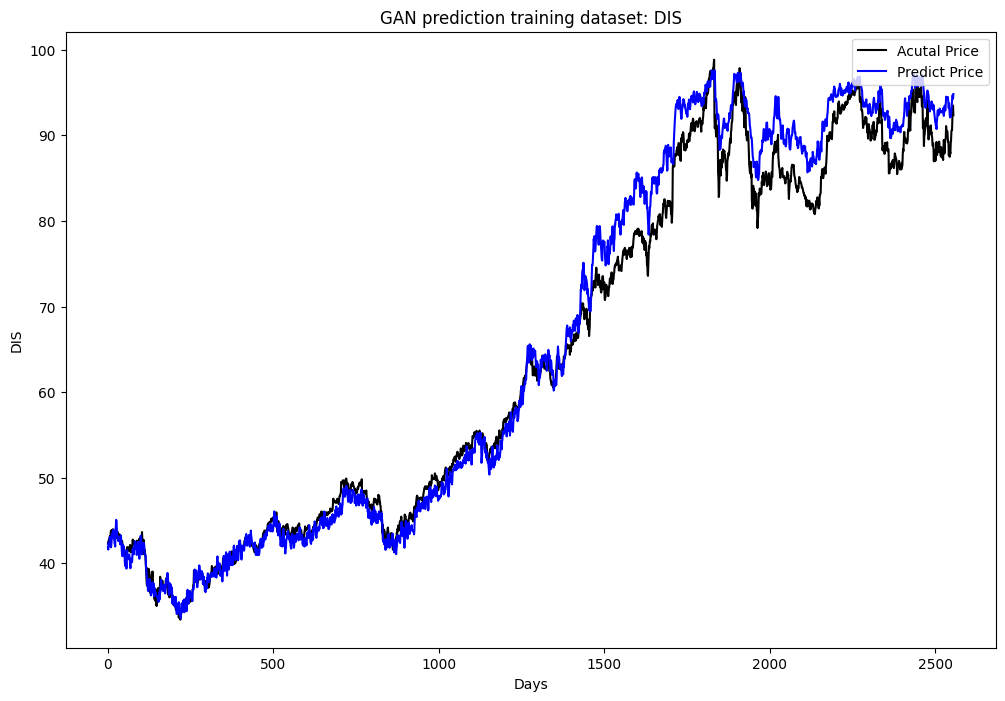

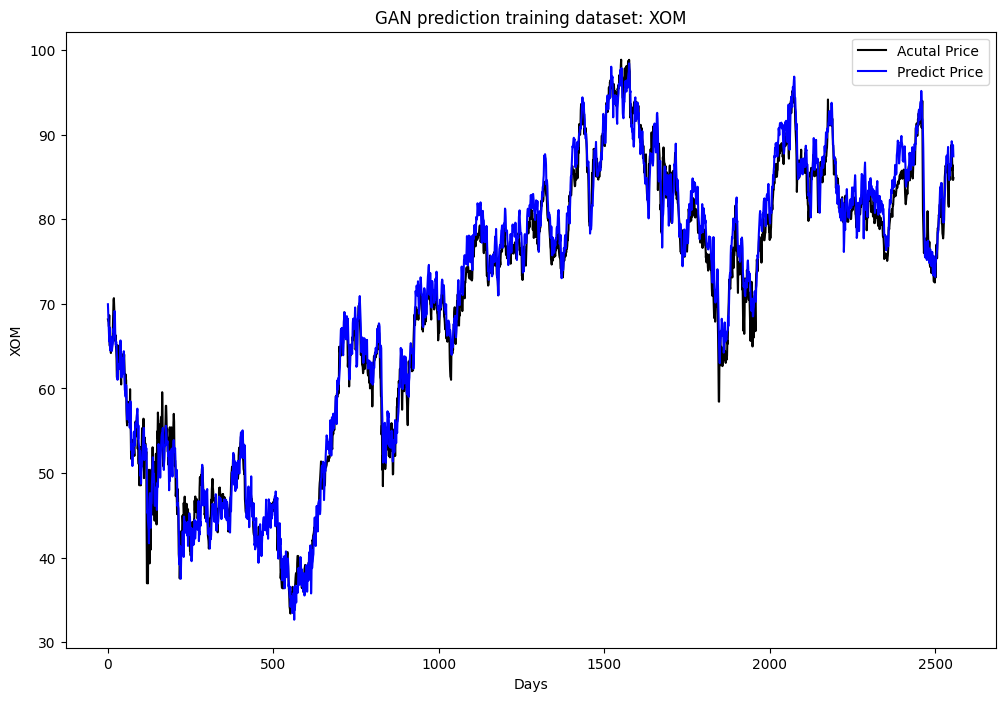

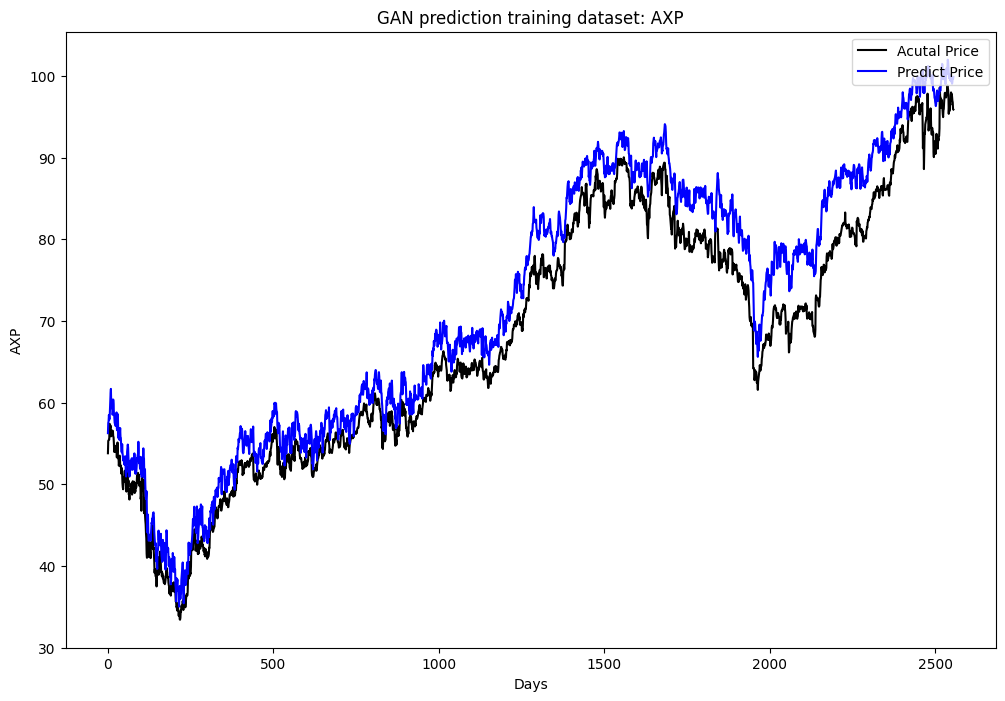

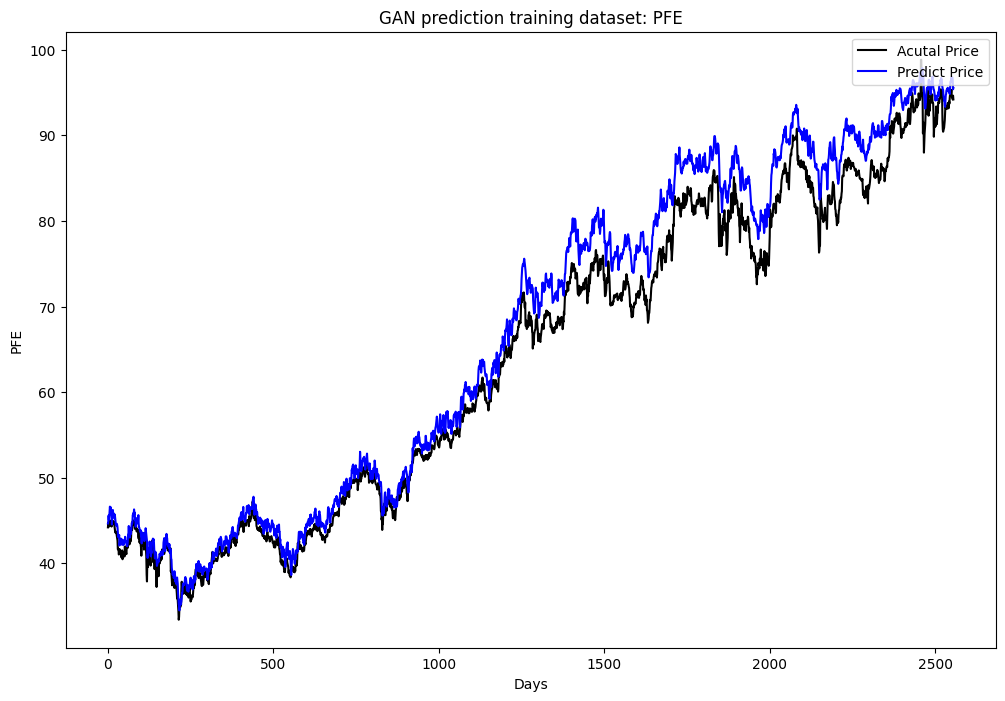

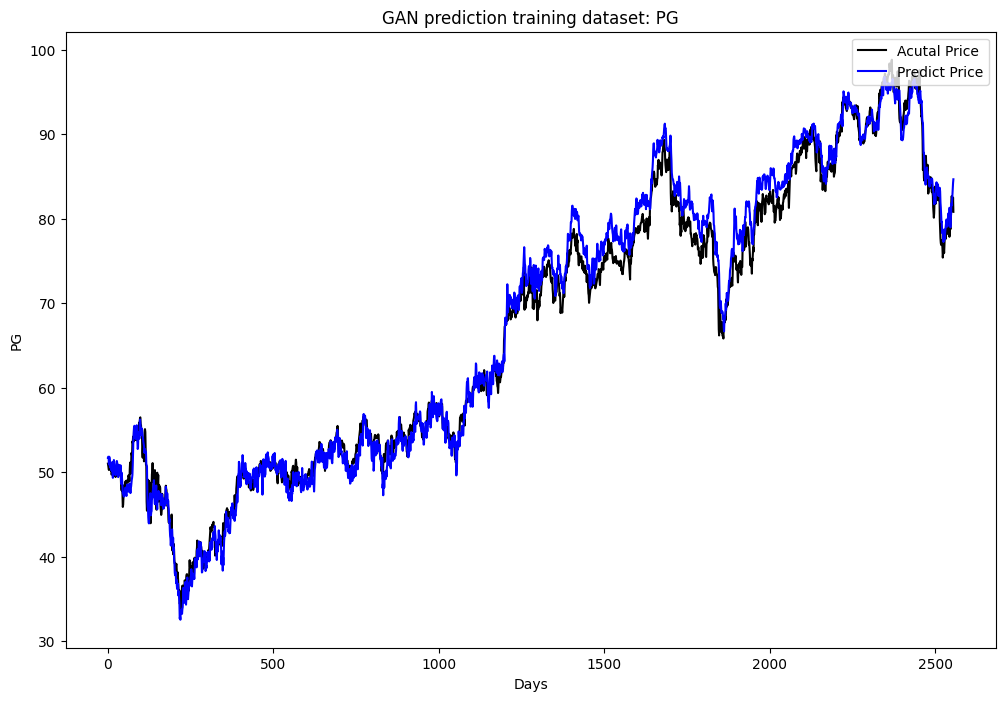

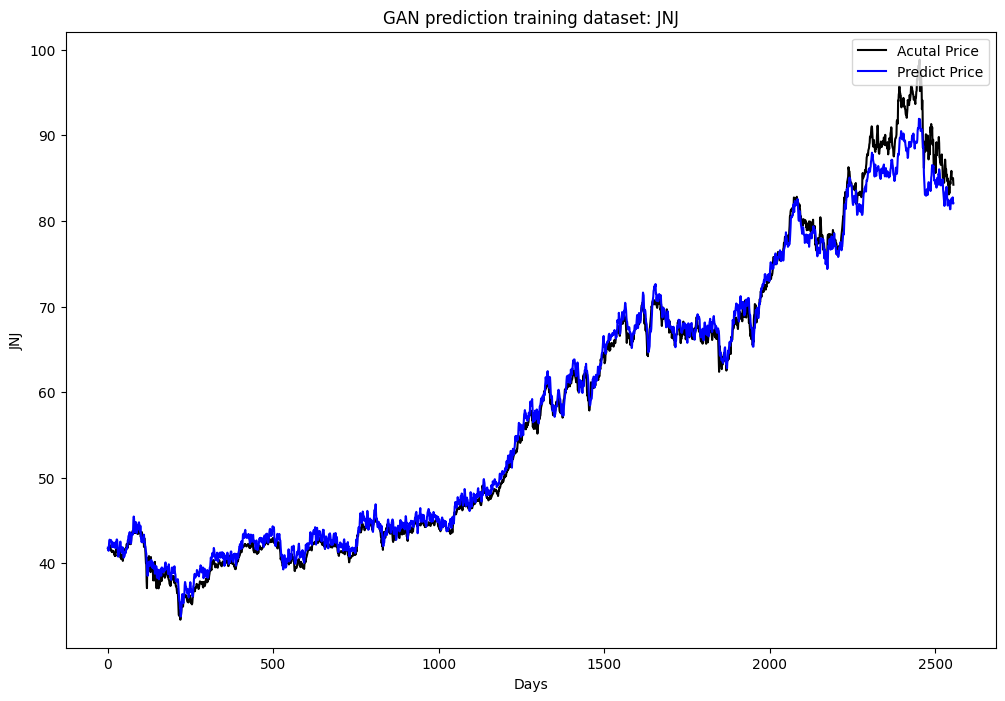

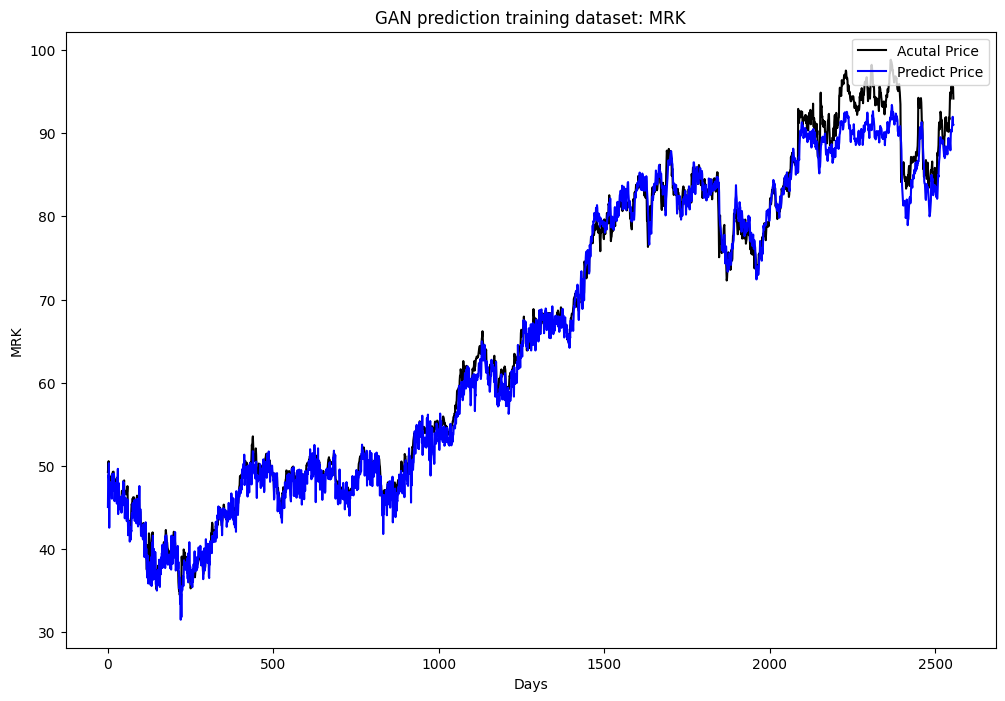

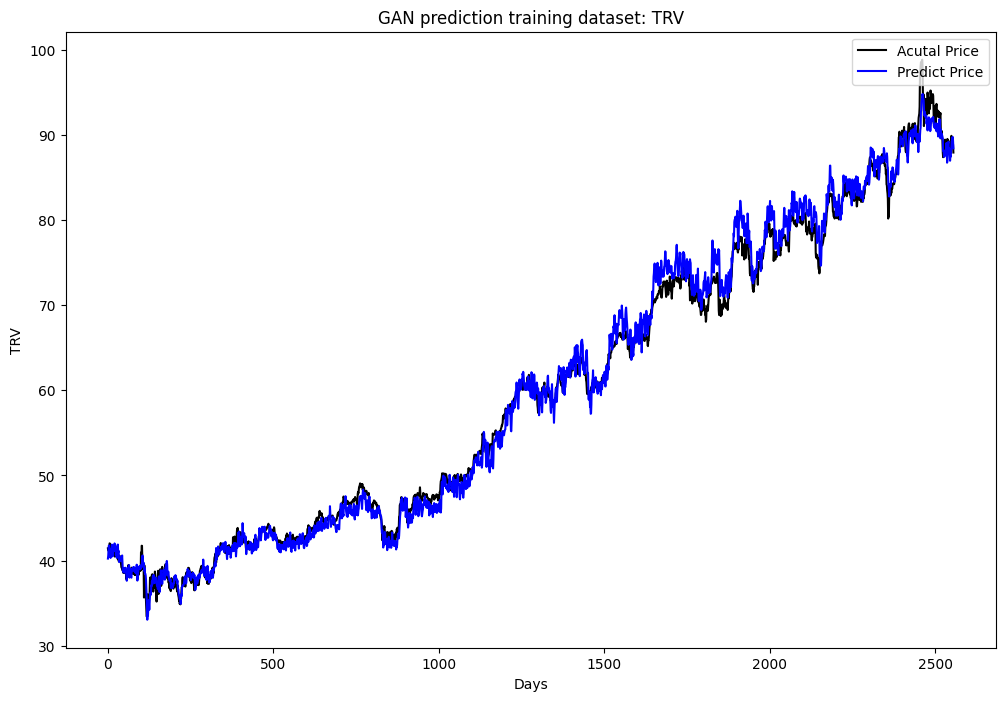

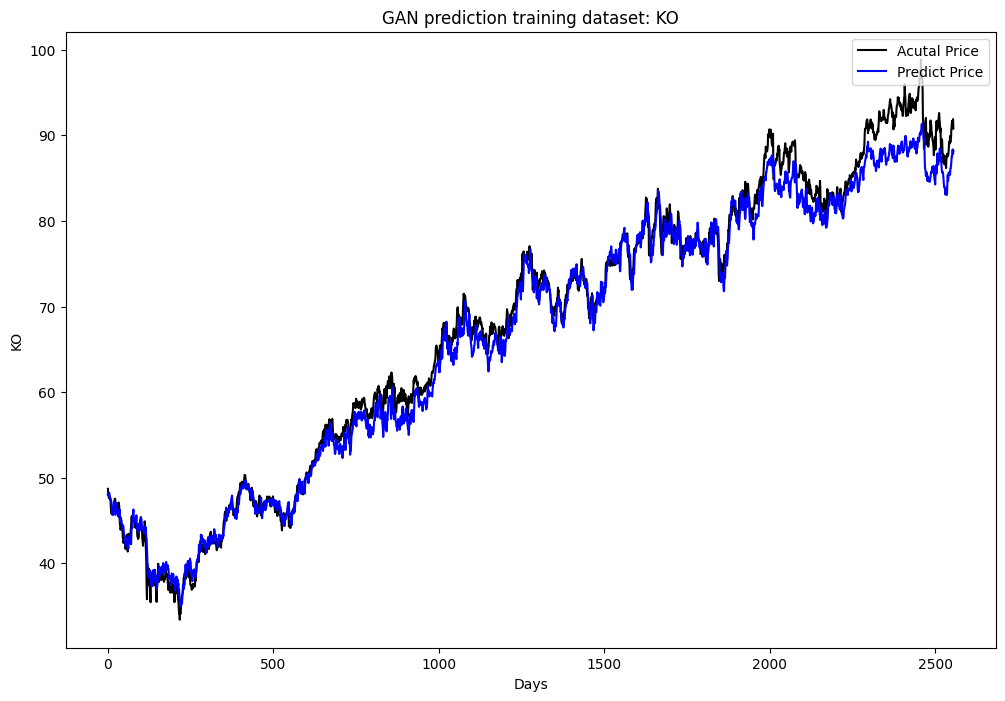

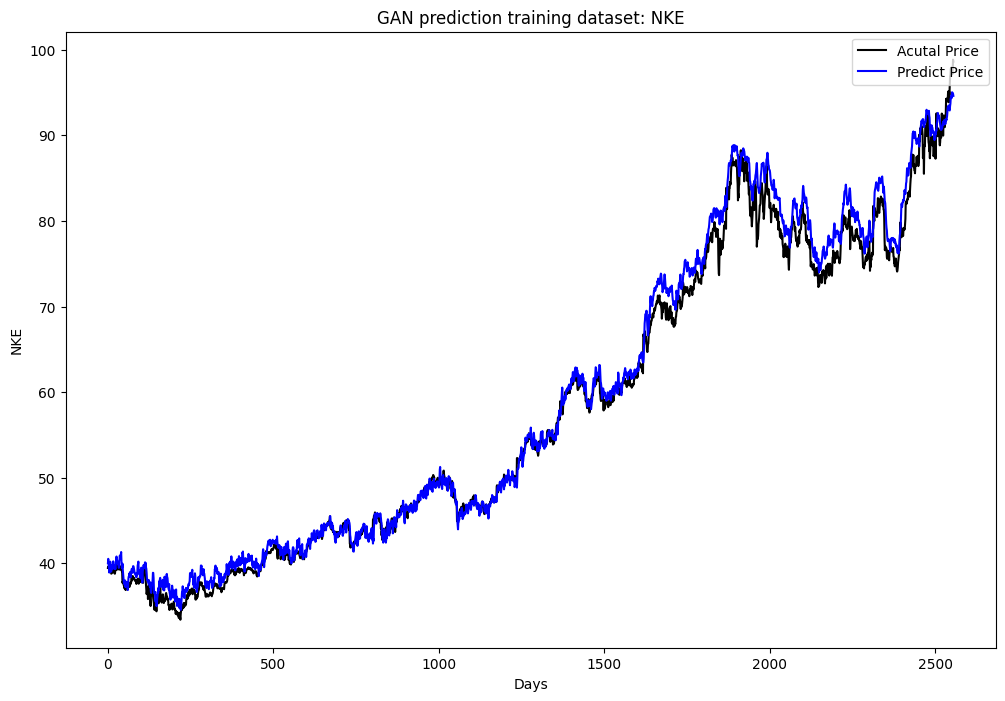

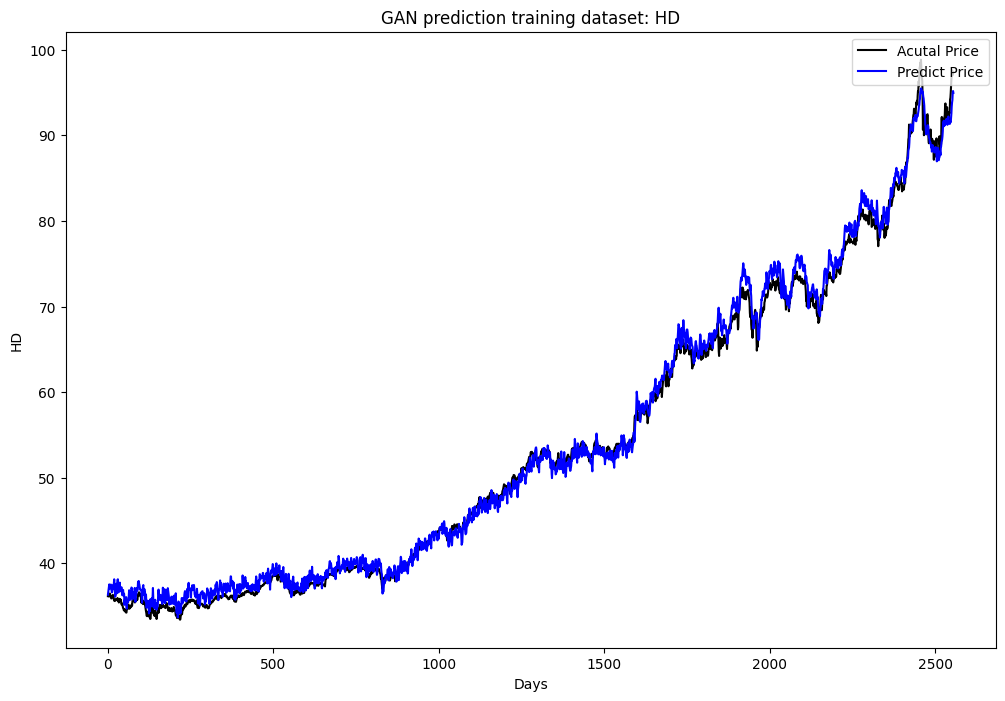

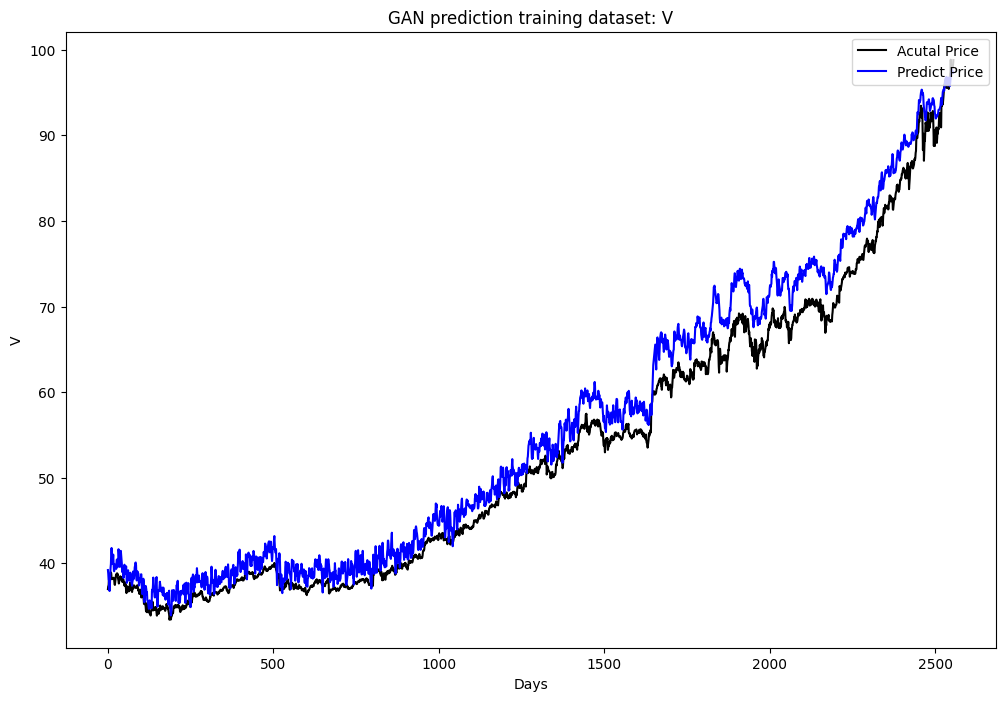

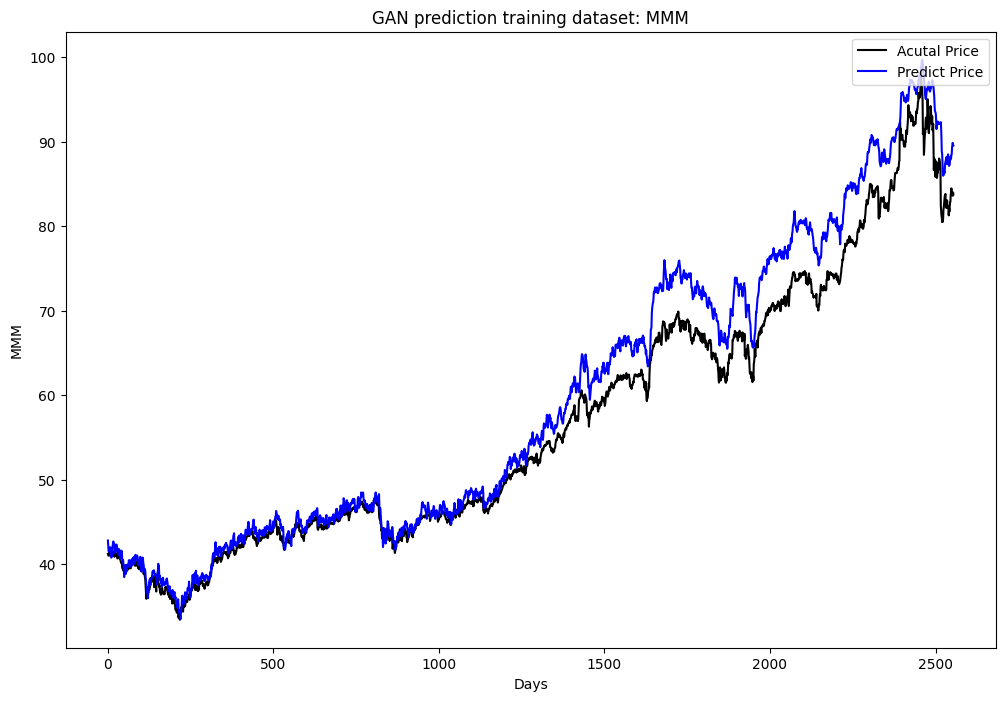

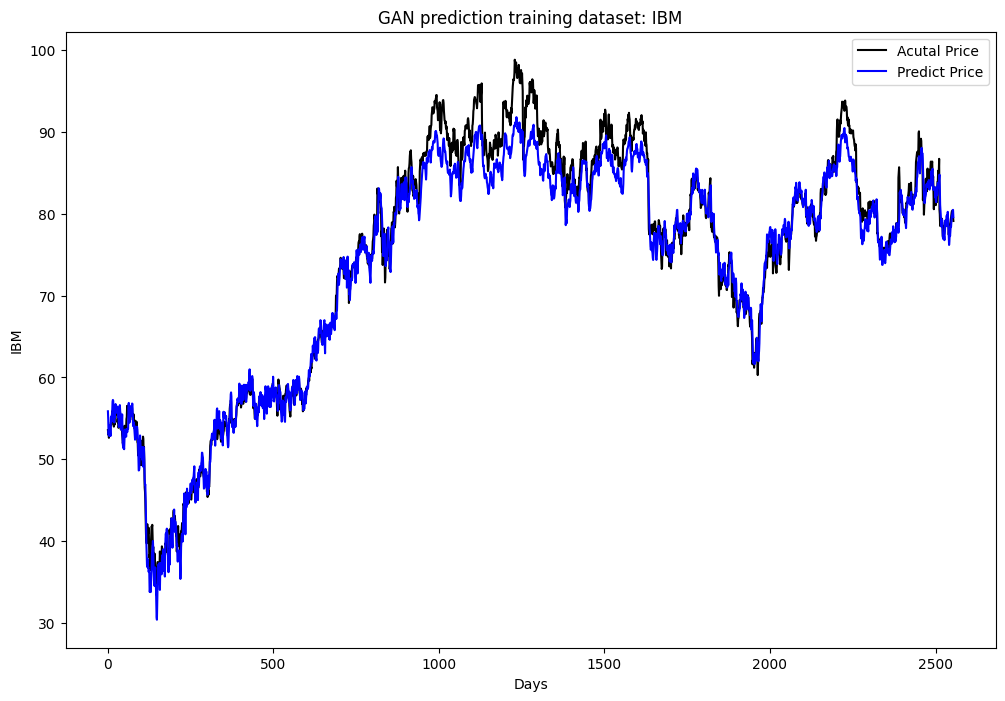

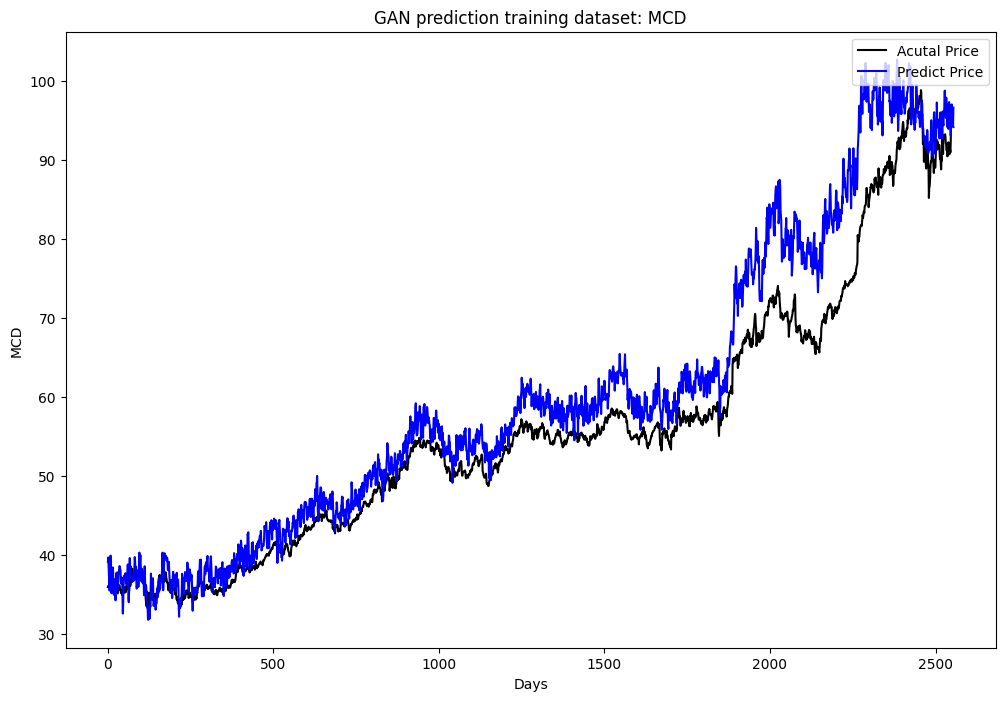

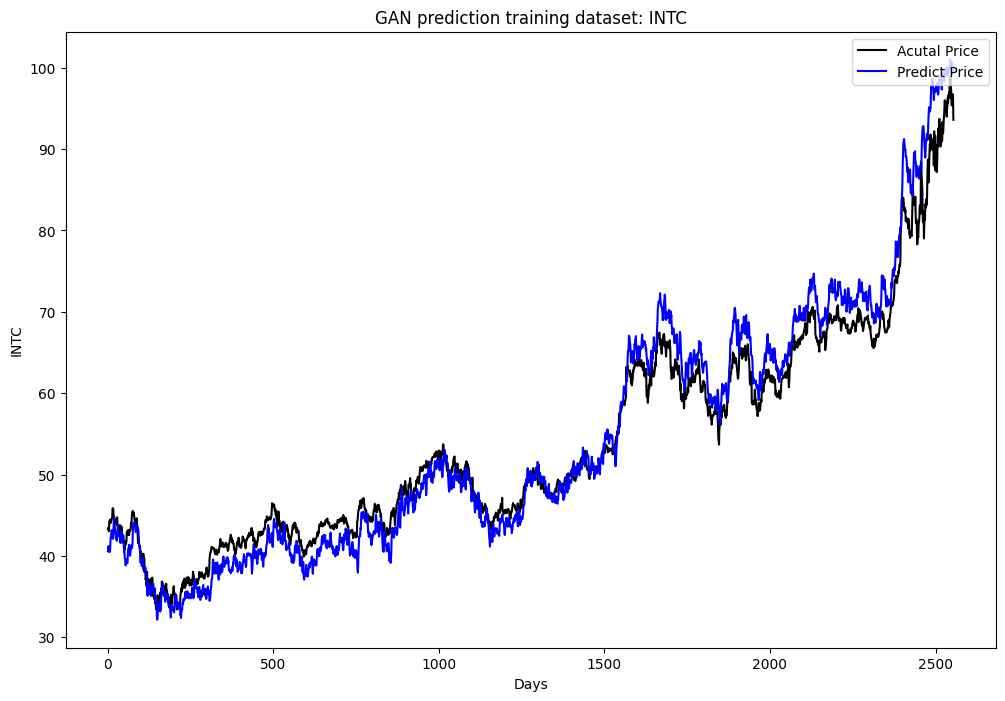

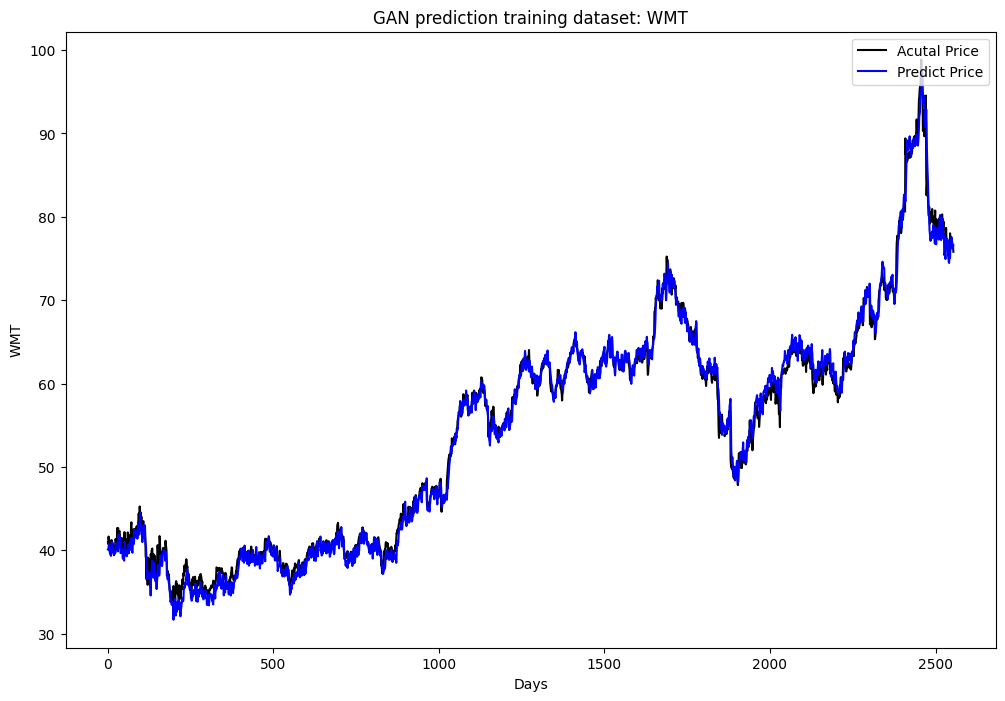

In [ ]:
for key in model_dict_trained.keys():
  model_dict_trained[key][0].eval()
  pred_y_train = model_dict_trained[key][0](slide_dict_train[key][0].to(device))
  pred_y_test = model_dict_trained[key][0](slide_dict_test[key][0].to(device))

  y_train_true = y_scaler.inverse_transform(slide_dict_train[key][1])
  y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

  y_test_true = y_scaler.inverse_transform(slide_dict_test[key][1])
  y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

  plt.figure(figsize=(12, 8))
  plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
  plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
  plt.title('GAN prediction training dataset: ' + key)
  plt.ylabel(key)
  plt.xlabel('Days')
  plt.legend(loc = 'upper right')

  MSE = mean_squared_error(y_train_true, y_train_pred)
  RMSE = math.sqrt(MSE)
  print(f'Training dataset RMSE:{RMSE}')

  col = "close"
  y_index =  stock_df_dict[key].columns.get_loc(col)
  y_index = 0
  GAN_data = stock_df_dict[key].iloc[:len(y_train_pred), 0].to_frame()
  #GAN_data.insert(0, "tic", key_val)
  GAN_data.insert(1, "pred_" + col, y_train_pred)

  GAN_data.to_csv("results/" + key + "_GAN_" + col + ".csv")
  #GAN_data.to_csv("results/RTX_GAN_close.csv")



In [ ]:
framedict = {}
for key in model_dict_trained.keys():
  #y_index =  stock_df_dict[key].get_loc(col)
  y_index = 0
  GAN_data = stock_df_dict[key].iloc[:2555, 0].to_frame()
  GAN_data.insert(0, "tic", key)
  #GAN_data.insert(1, "pred_" + col, y_train_pred)
  GAN_data.insert(1, "pred_close", y_train_pred)
  framedict["{0}".format(key)] = GAN_data

GAN_masterframe = pd.concat(framedict.values())
print(GAN_masterframe)

#GAN_data.to_csv("results/" + key + "_GAN_" + col + ".csv")
GAN_masterframe.to_csv("results/GAN_close.csv")

            tic  pred_close      close
date                                  
2008-04-21  RTX   40.103645  31.011003
2008-04-22  RTX   40.175869  30.731384
2008-04-23  RTX   40.323360  30.912052
2008-04-24  RTX   40.779415  31.273405
2008-04-25  RTX   40.603573  31.264797
...         ...         ...        ...
2018-06-07  WMT   77.089943  77.588463
2018-06-08  WMT   76.307655  77.049591
2018-06-11  WMT   76.116257  76.994804
2018-06-12  WMT   76.436394  76.812111
2018-06-13  WMT   76.580498  76.802994

[51100 rows x 3 columns]


In [ ]:
print(new_data1.shape)
print(y_train_pred.shape)

In [ ]:
# COMPILE ALL CODE INTO A SINGLE FUNCTION THAT PREDICTS SPECIFIC COLUMNS

def GANPredict(col):
  train_dict = {}
  test_dict = {}
  model_dict = {}
  model_dict_trained = {}
  slide_dict_train = {}
  slide_dict_test = {}
  fake_data_dict = {}
  framedict = {}

  for tic in stock_df_dict.items():
    tic[1]['y'] = tic[1][col]
    print(tic[1].columns.to_series()[np.isinf(tic[1]).any()])
    x = tic[1].iloc[:, :33].values
    y = tic[1].iloc[:, 33].values

    split = int(tic[1].shape[0]* 0.8)
    train_x, test_x = x[: split, :], x[split:, :]
    train_y, test_y = y[: split, ], y[split: , ]

    x_scaler = MinMaxScaler(feature_range = (0, 1))
    y_scaler = MinMaxScaler(feature_range = (0, 1))

    train_x = x_scaler.fit_transform(train_x)
    test_x = x_scaler.transform(test_x)

    train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
    test_y = y_scaler.transform(test_y.reshape(-1, 1))

    print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
    print(f'testX: {test_x.shape} testY: {test_y.shape}')

    train_dict[tic[0]] = (train_x, train_y)
    test_dict[tic[0]] = (test_x, test_y)

  for item in train_dict.items():

    train_loader = DataLoader(TensorDataset(torch.from_numpy(item[1][0]).float()), batch_size = 128, shuffle = False)
    model = VAE([33, 400, 400, 400, 10], 10)
    use_cuda = 1
    device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
    num_epochs = 300
    learning_rate = 0.00003
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    hist = np.zeros(num_epochs)
    for epoch in range(num_epochs):
      total_loss = 0
      loss_ = []
      for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
      hist[epoch] = sum(loss_)
      print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

    plt.figure(figsize=(12, 6))
    plt.plot(hist)
    plt.title("Loss: " + item[0])
    model_dict[item[0]] = model

  for item in train_dict.items():
      model_dict[item[0]].eval()
      _, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(item[1][0]).float().to(device))
      train_x= np.concatenate((item[1][0], VAE_train_x.cpu().detach().numpy()), axis = 1)
      train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, item[1][1], 3)

      slide_dict_train[item[0]] = (train_x_slide, train_y_slide, train_y_gan)

      print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')

      use_cuda = 1
      device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

      batch_size = 128
      learning_rate = 0.0002
      num_epochs = 150

      trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

      modelG = Generator(43).to(device)
      modelD = Discriminator().to(device)

      criterion = nn.BCELoss()
      optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
      optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

      histG = np.zeros(num_epochs)
      histD = np.zeros(num_epochs)
      count = 0
      for epoch in range(num_epochs):
        loss_G = []
        loss_D = []
        for (x, y) in trainDataloader:
            x = x.to(device)
            y = y.to(device)

            fake_data = modelG(x)
            fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

            dis_real_output = modelD(y)
            real_labels = torch.ones_like(dis_real_output).to(device)
            lossD_real = criterion(dis_real_output, real_labels)


            dis_fake_output = modelD(fake_data)
            fake_labels = torch.zeros_like(real_labels).to(device)
            lossD_fake = criterion(dis_fake_output, fake_labels)

            lossD = (lossD_real + lossD_fake)

            modelD.zero_grad()
            lossD.backward(retain_graph=True)
            optimizerD.step()
            loss_D.append(lossD.item())

            output_fake = modelD(fake_data)
            lossG = criterion(output_fake, real_labels)
            modelG.zero_grad()
            lossG.backward()
            optimizerG.step()
            loss_G.append(lossG.item())
        histG[epoch] = sum(loss_G)
        histD[epoch] = sum(loss_D)
        print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

      model_dict_trained[item[0]] = (modelG, modelD)

  for item in test_dict.items():
    model_dict[item[0]].eval()
    _, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(item[1][0]).float().to(device))
    print(VAE_test_x.cpu().detach().shape)
    print(test_x.shape)
    test_x = np.concatenate((test_dict[item[0]][0], VAE_test_x.cpu().detach().numpy()), axis = 1)
    test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
    print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')
    slide_dict_test[item[0]] = (test_x_slide, test_y_slide, test_y_gan)

  plt.figure(figsize = (12, 6))
  plt.plot(histG, color = 'blue', label = 'Generator Loss')
  plt.plot(histD, color = 'black', label = 'Discriminator Loss')
  plt.title('GAN Loss')
  plt.xlabel('Epochs')
  plt.legend(loc = 'upper right')

  for key in model_dict_trained.keys():
    model_dict_trained[key][0].eval()
    pred_y_train = model_dict_trained[key][0](slide_dict_train[key][0].to(device))
    pred_y_test = model_dict_trained[key][0](slide_dict_test[key][0].to(device))

    y_train_true = y_scaler.inverse_transform(slide_dict_train[key][1])
    y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

    y_test_true = y_scaler.inverse_transform(slide_dict_test[key][1])
    y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

    plt.figure(figsize=(12, 8))
    plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
    plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
    plt.title('GAN prediction training dataset: ' + key)
    plt.ylabel(key)
    plt.xlabel('Days')
    plt.legend(loc = 'upper right')

    MSE = mean_squared_error(y_train_true, y_train_pred)
    RMSE = math.sqrt(MSE)
    print(f'Training dataset RMSE:{RMSE}')

    y_index =  stock_df_dict[key].columns.get_loc(col)
    GAN_data = stock_df_dict[key].iloc[:len(y_train_pred), 0].to_frame()
    GAN_data.insert(0, "tic", key)
    GAN_data.insert(1, "pred_" + col, y_train_pred)
    framedict["{0}".format(key)] = GAN_data

  GAN_masterframe = pd.concat(framedict.values())

  GAN_masterframe.to_csv("results/" + key + "_GAN_" + col + ".csv")



Streaming output truncated to the last 5000 lines.
[182/300] Loss: 53.401320457458496
[183/300] Loss: 53.1467924118042
[184/300] Loss: 52.88807725906372
[185/300] Loss: 52.605268716812134
[186/300] Loss: 52.321577072143555
[187/300] Loss: 52.0281343460083
[188/300] Loss: 51.70775246620178
[189/300] Loss: 51.37791323661804
[190/300] Loss: 51.03704857826233
[191/300] Loss: 50.69252371788025
[192/300] Loss: 50.33857178688049
[193/300] Loss: 49.98937153816223
[194/300] Loss: 49.64018154144287
[195/300] Loss: 49.303544759750366
[196/300] Loss: 48.962486267089844
[197/300] Loss: 48.646060943603516
[198/300] Loss: 48.33423209190369
[199/300] Loss: 48.037792682647705
[200/300] Loss: 47.74917459487915
[201/300] Loss: 47.46365308761597
[202/300] Loss: 47.179009199142456
[203/300] Loss: 46.88122820854187
[204/300] Loss: 46.588353872299194
[205/300] Loss: 46.279839754104614
[206/300] Loss: 45.96588206291199
[207/300] Loss: 45.64123201370239
[208/300] Loss: 45.322341203689575
[209/300] Loss: 44.995

<ipython-input-37-4d269316721b>:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (12, 6))


Training dataset RMSE:2.1876738735198757
Training dataset RMSE:0.8428472369608866
Training dataset RMSE:2.480216254158678
Training dataset RMSE:2.224141912247555
Training dataset RMSE:1.9495998025103263
Training dataset RMSE:3.524835144664948
Training dataset RMSE:1.4957658603030728
Training dataset RMSE:1.626665006638835
Training dataset RMSE:2.4371845774181726
Training dataset RMSE:2.128772581204558
Training dataset RMSE:2.0791432951447004
Training dataset RMSE:3.1276886791106584
Training dataset RMSE:2.298059075404949
Training dataset RMSE:0.9319579738724693
Training dataset RMSE:2.9075598695476192
Training dataset RMSE:2.3185637669467876
Training dataset RMSE:2.3422758192903395
Training dataset RMSE:3.228720672387425
Training dataset RMSE:1.1933398085978753


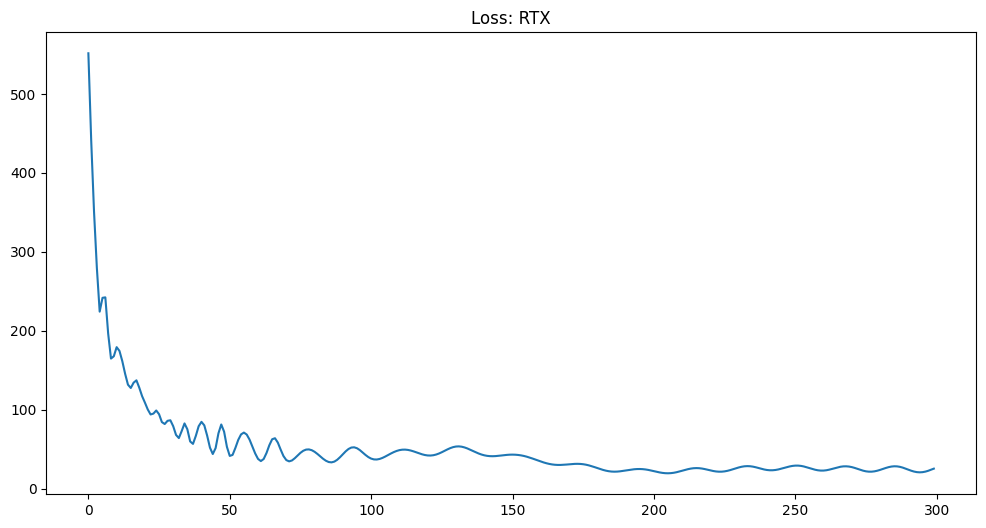

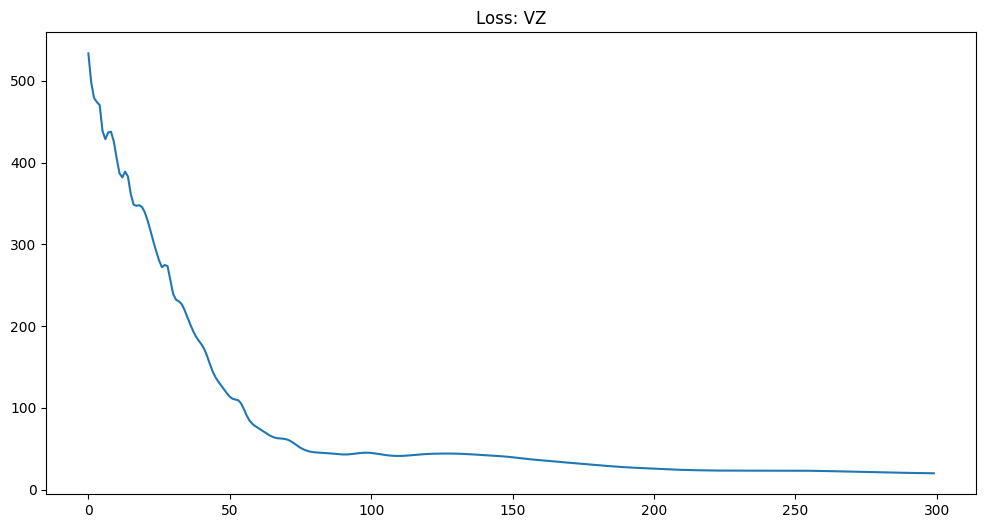

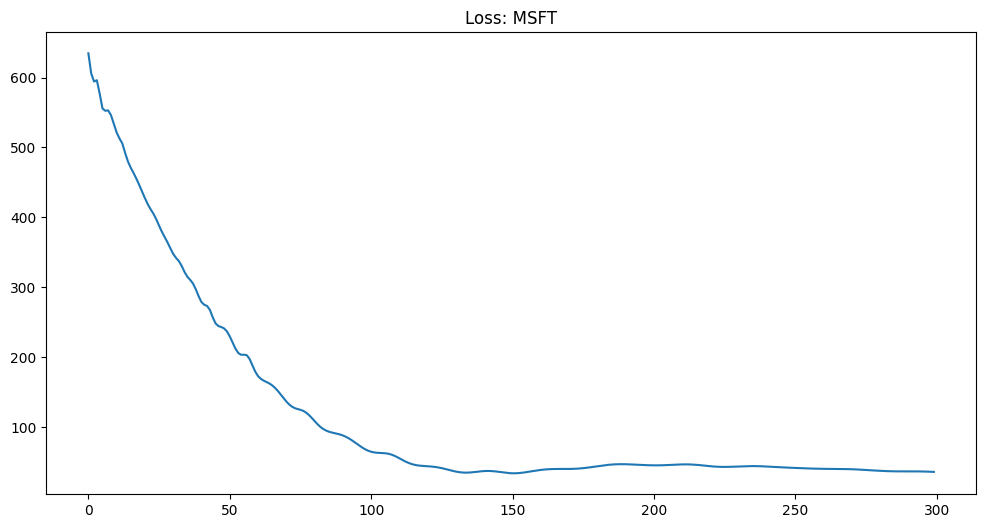

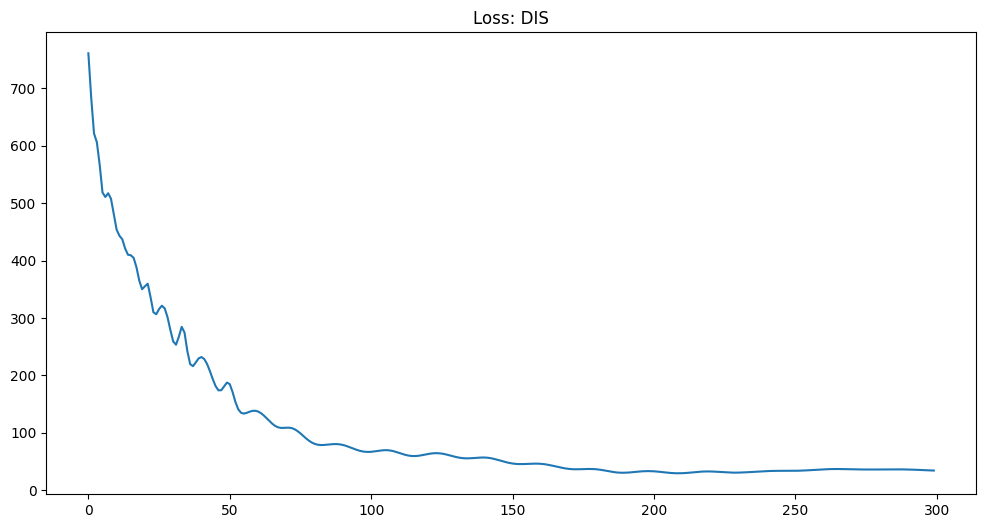

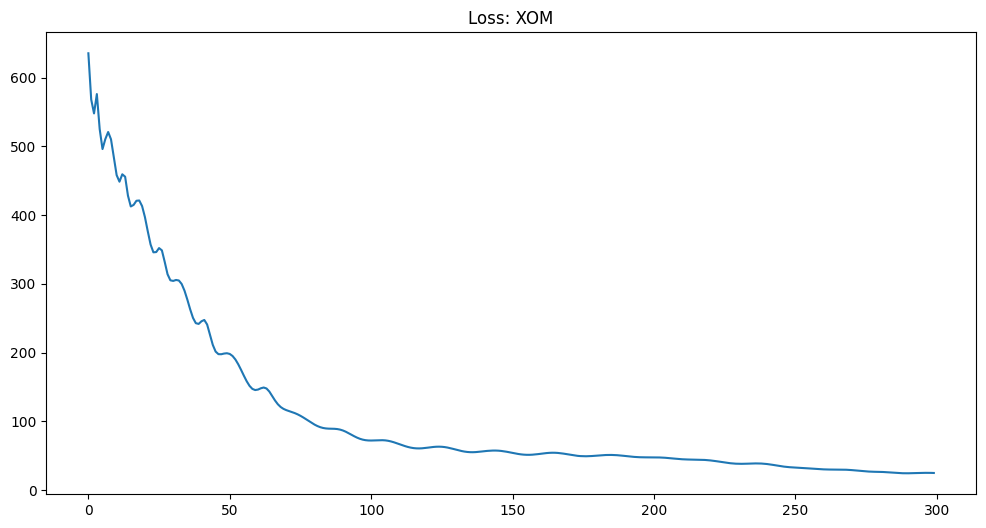

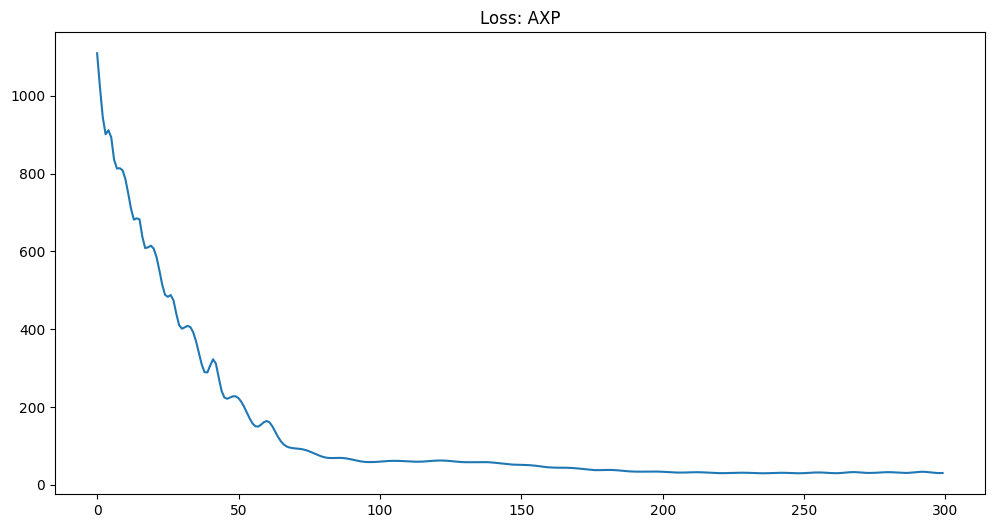

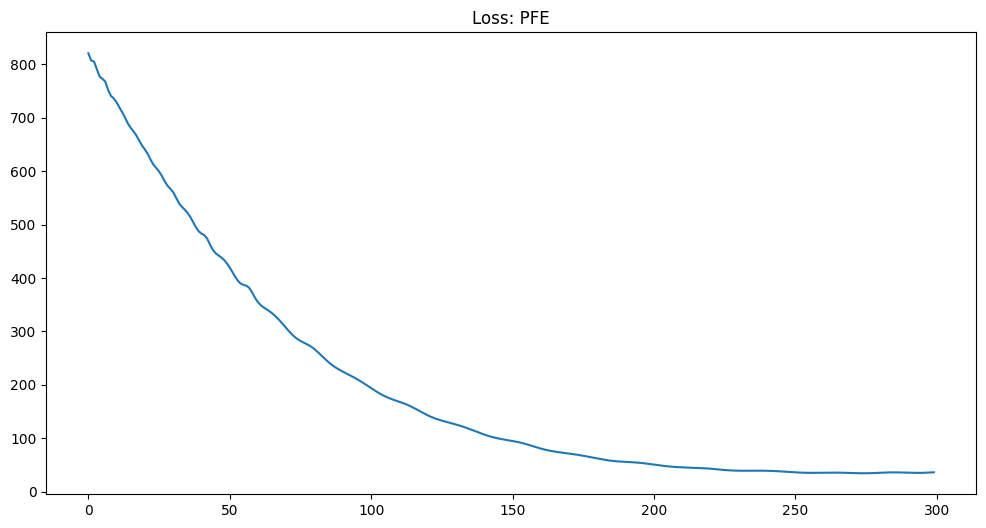

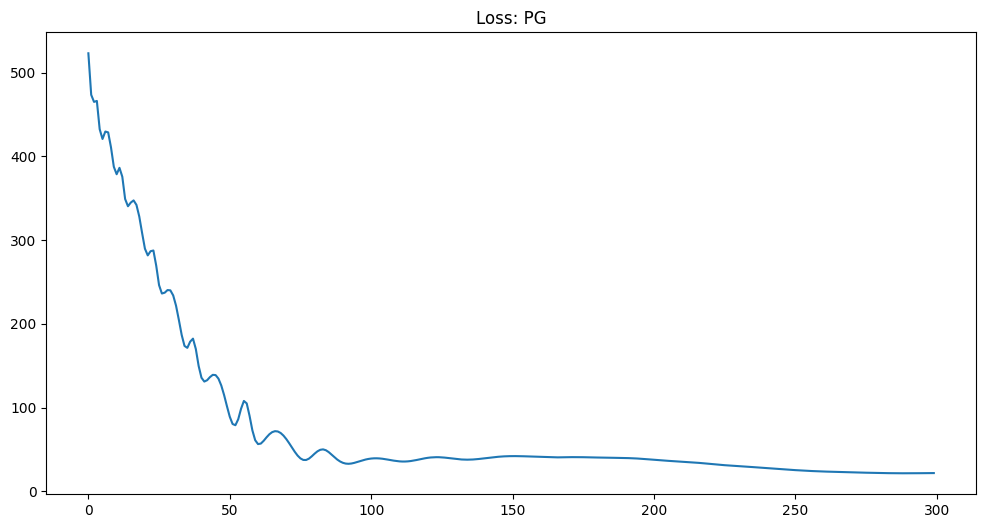

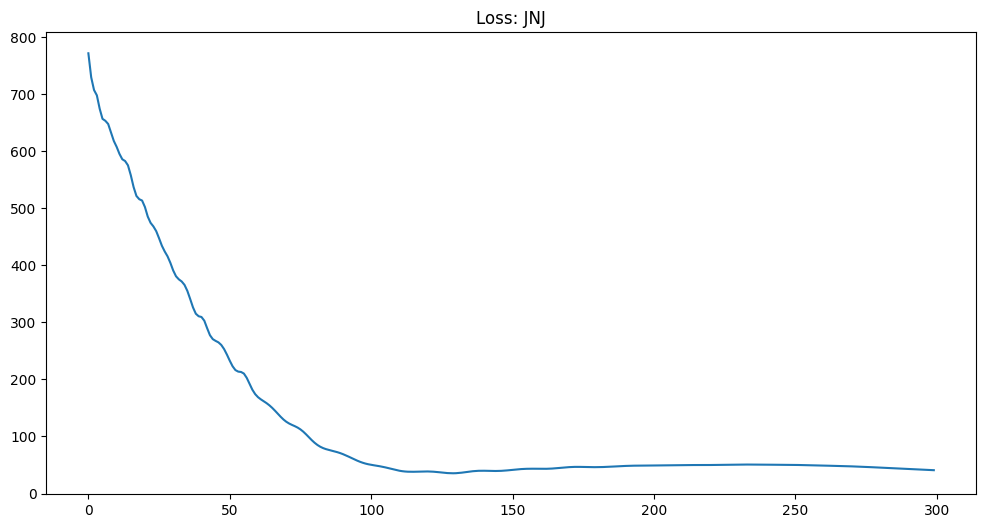

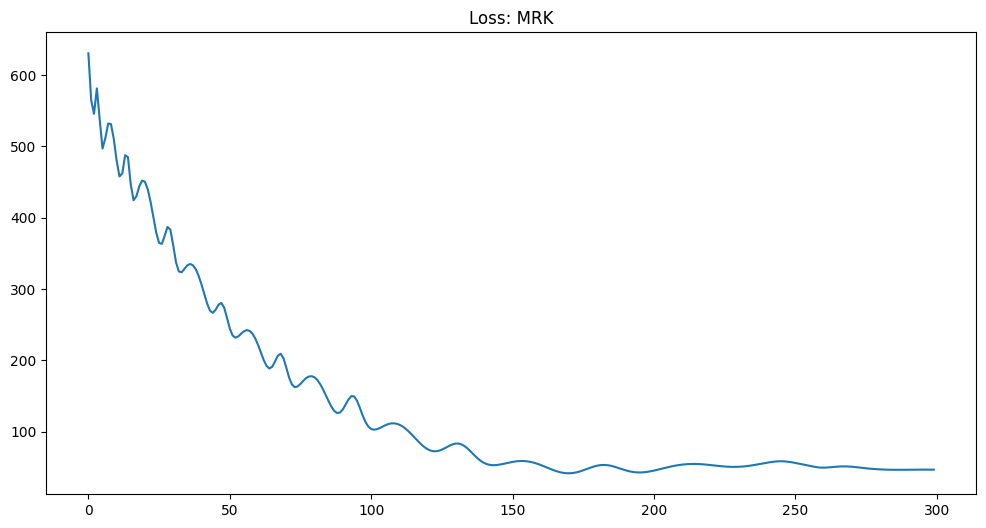

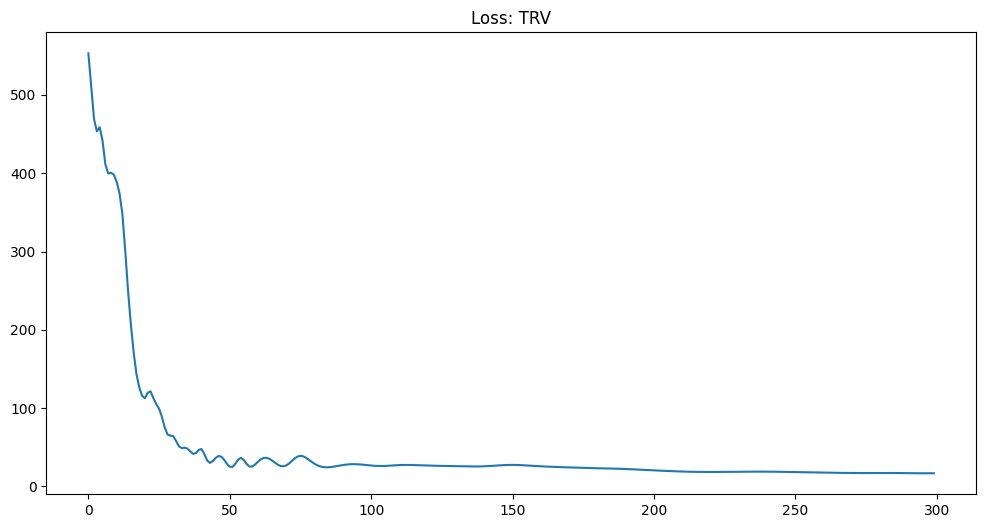

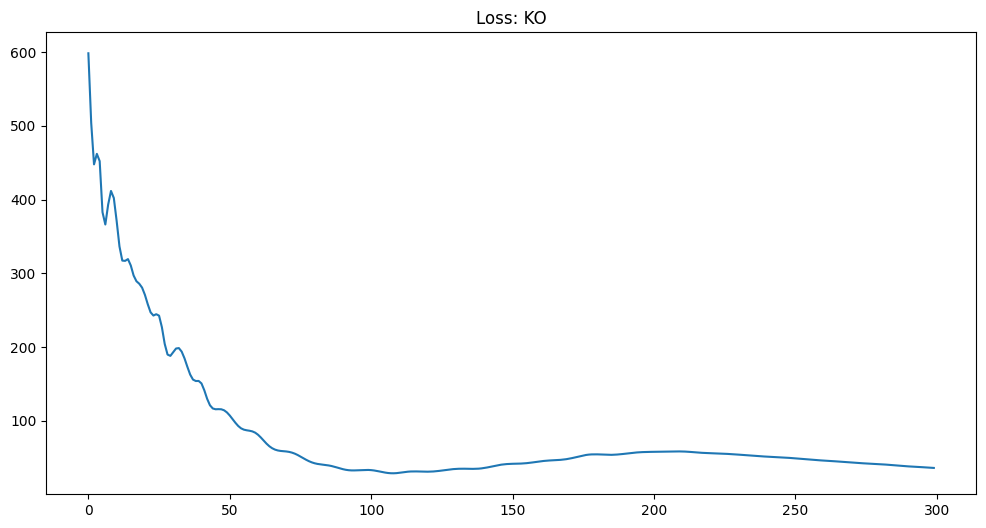

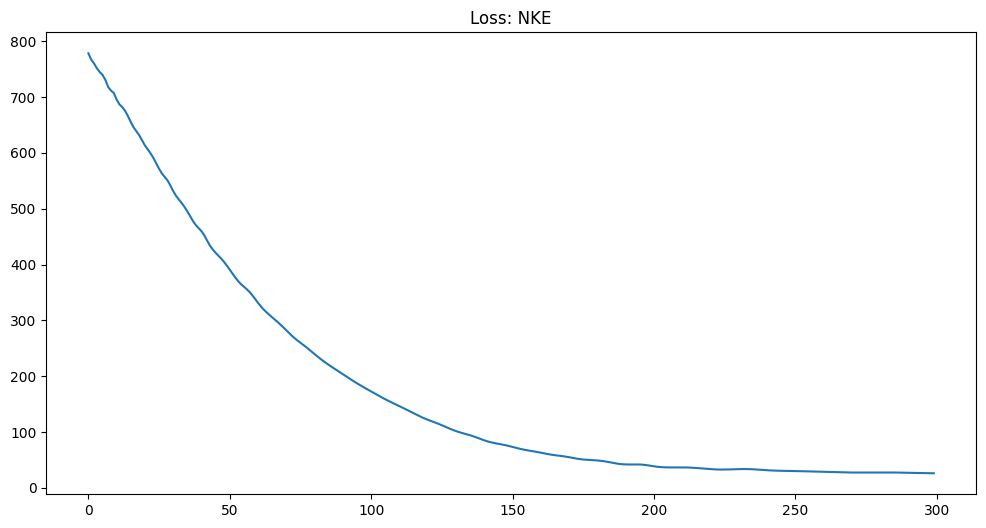

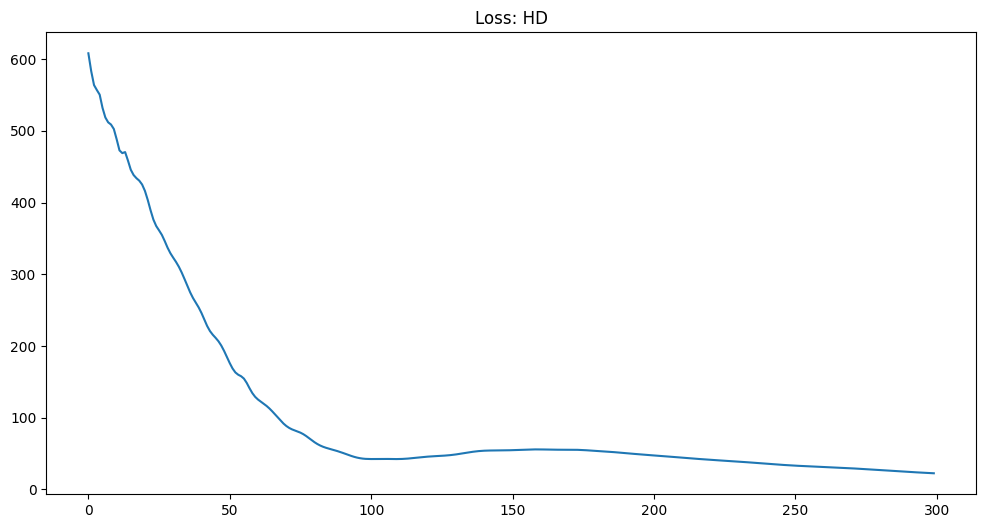

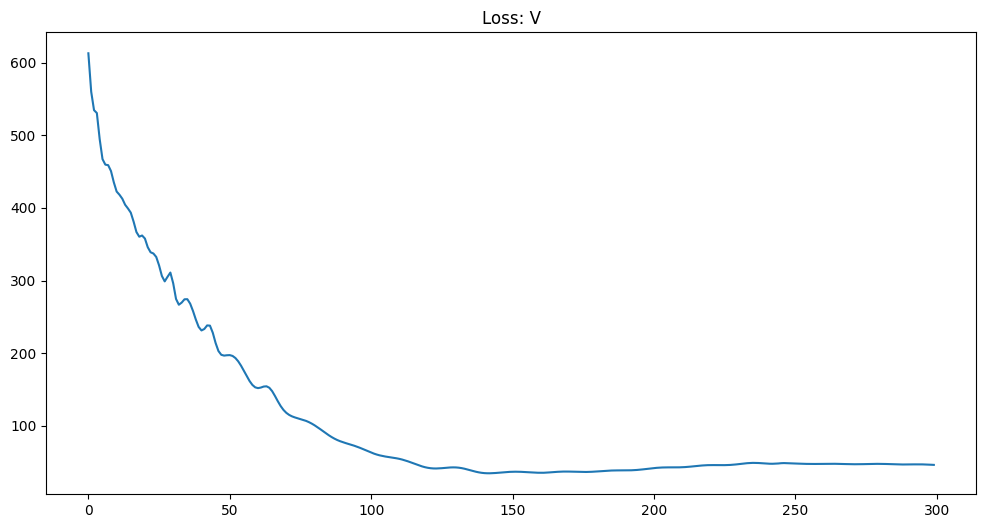

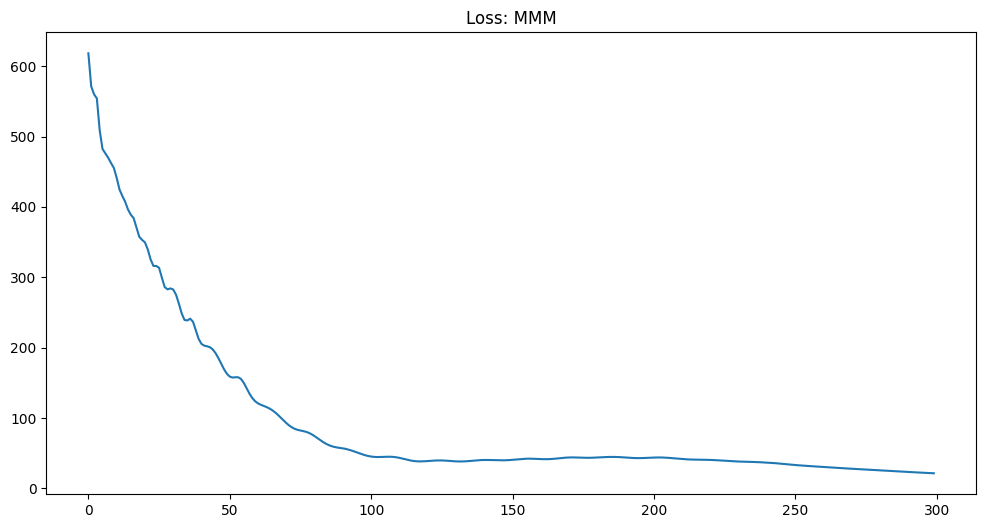

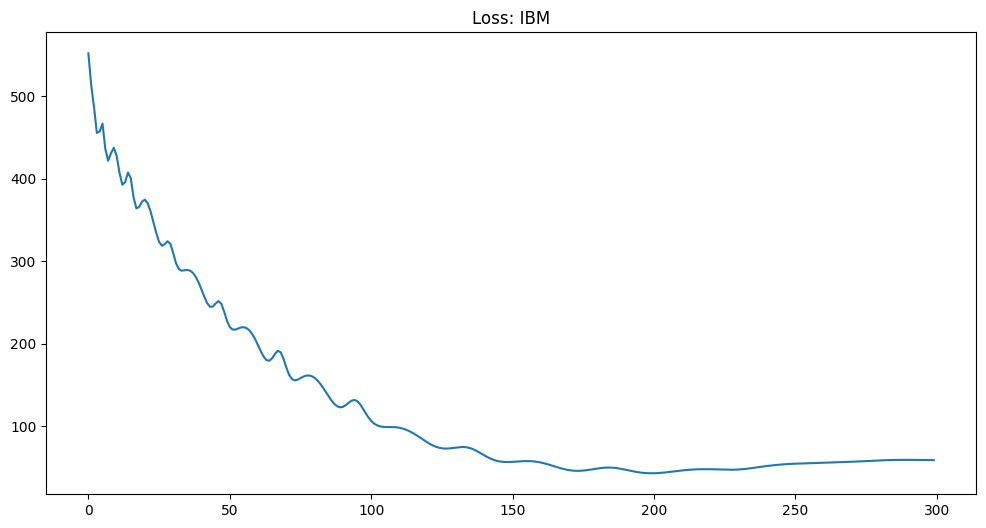

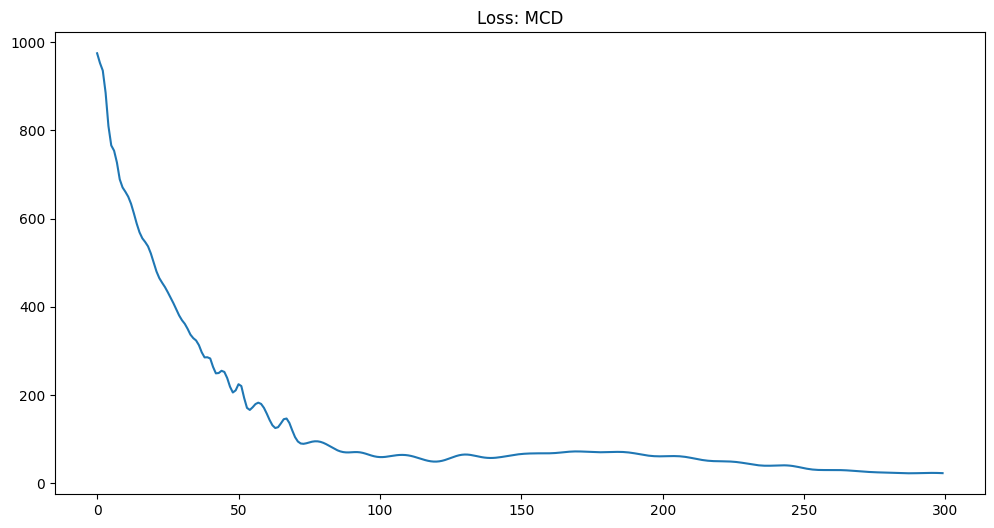

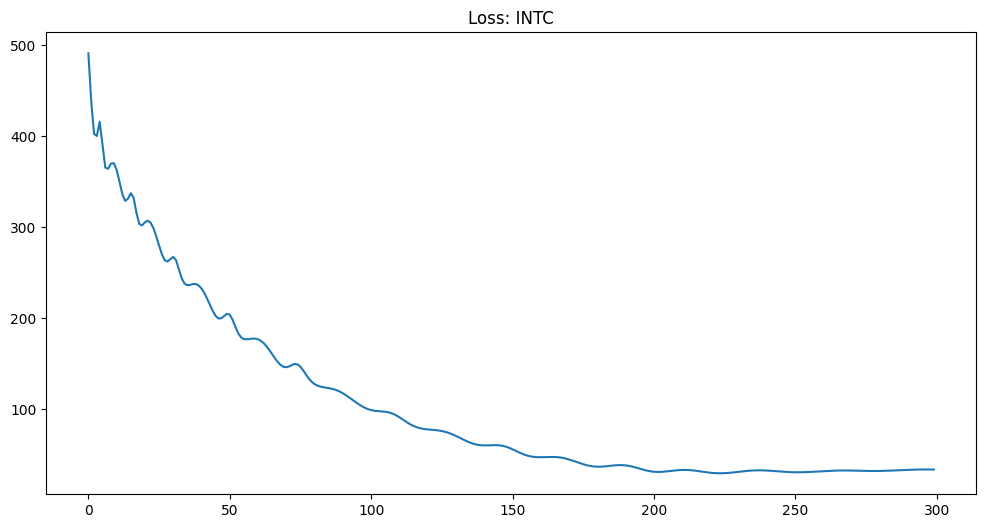

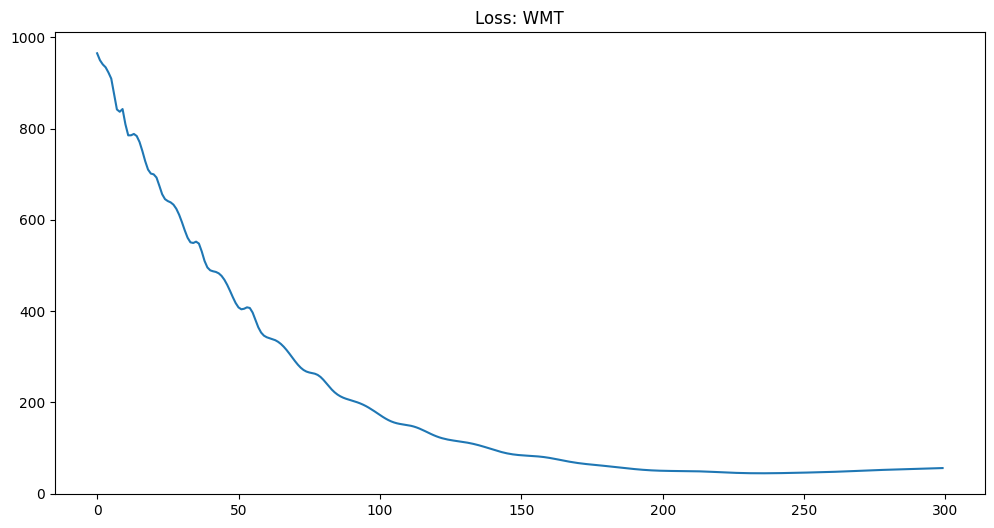

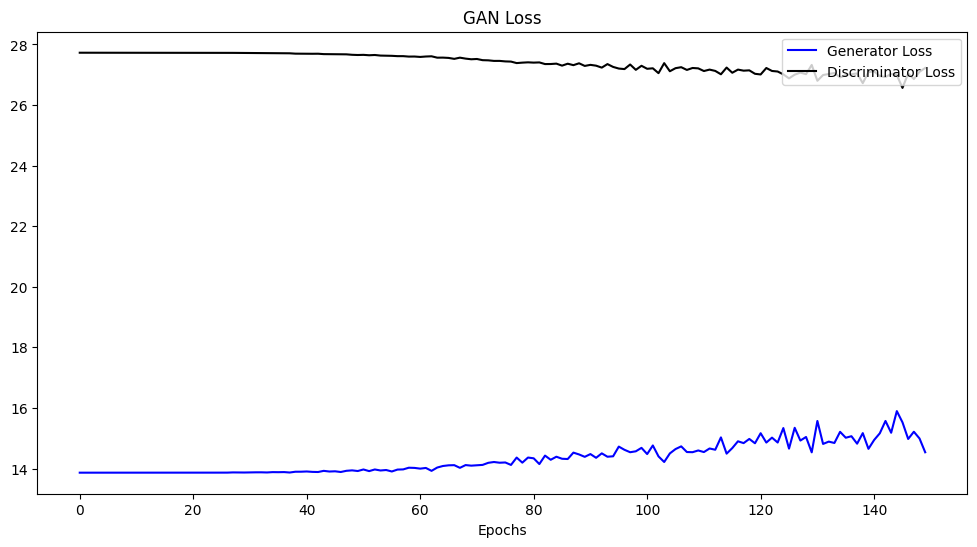

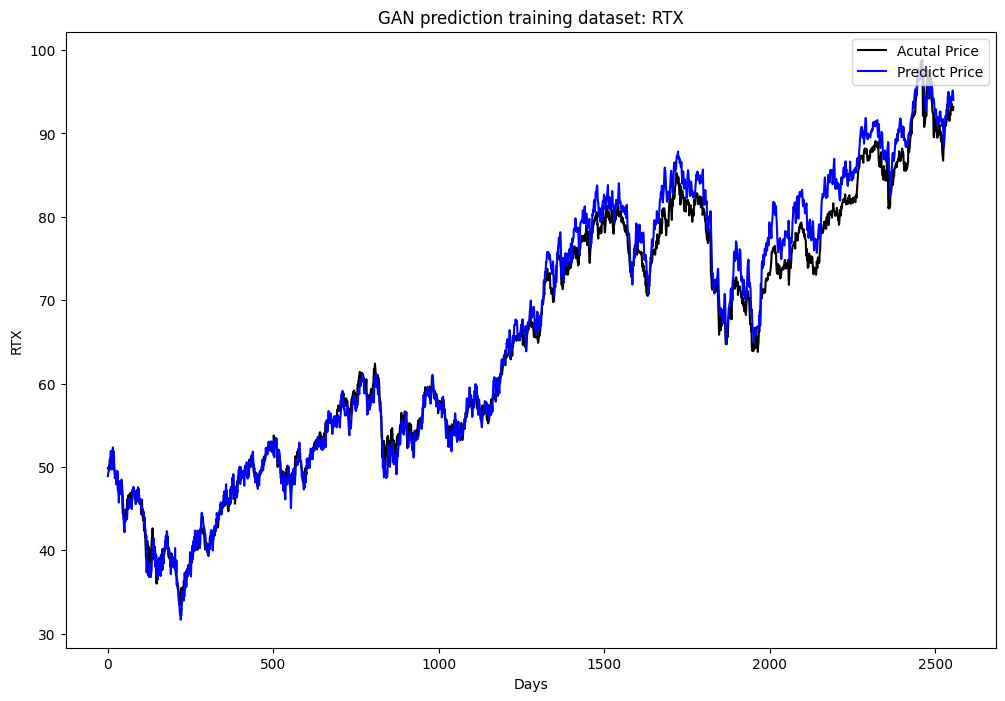

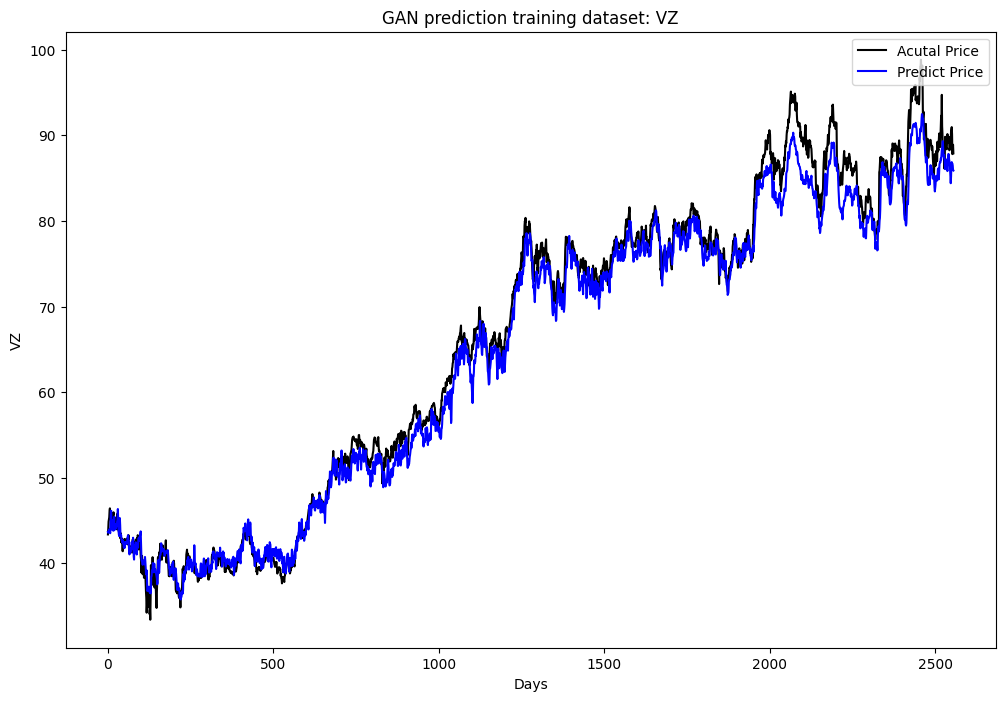

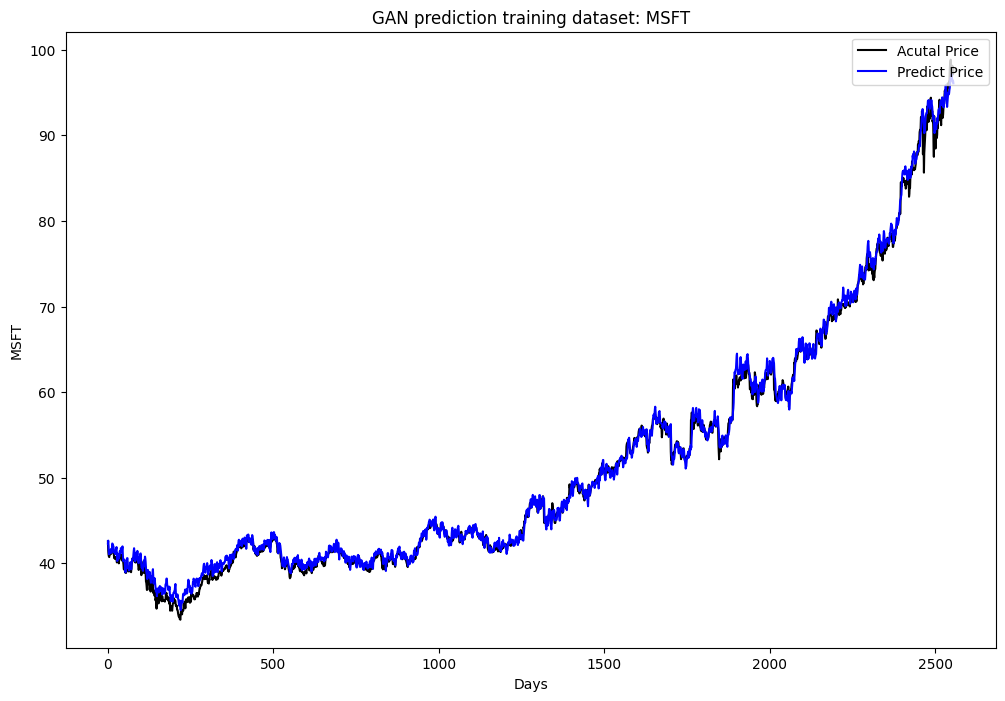

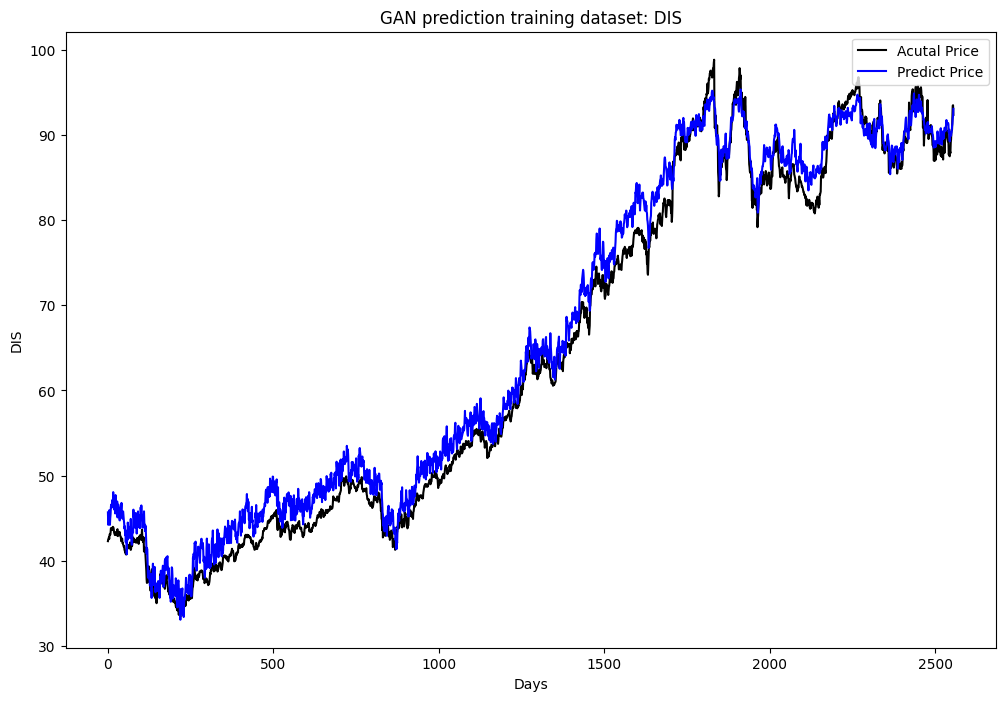

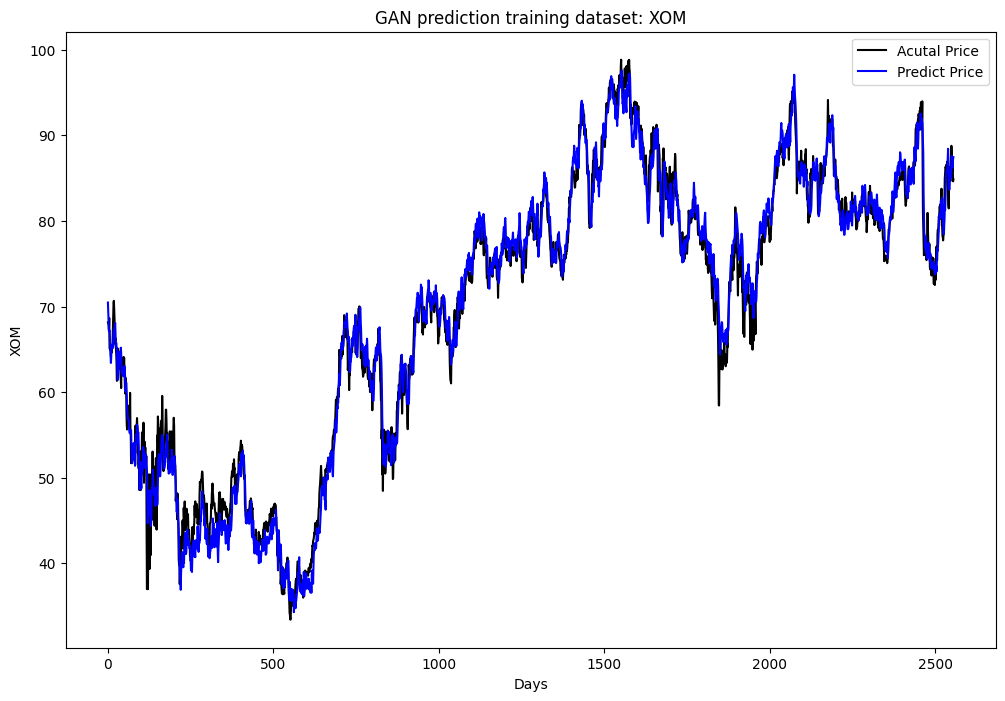

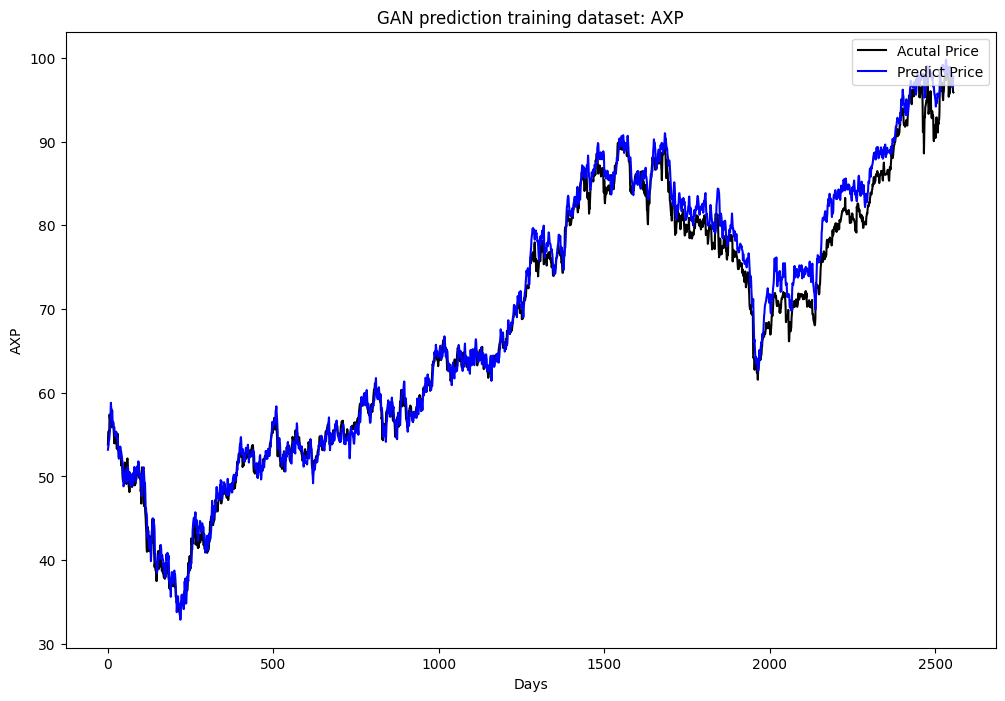

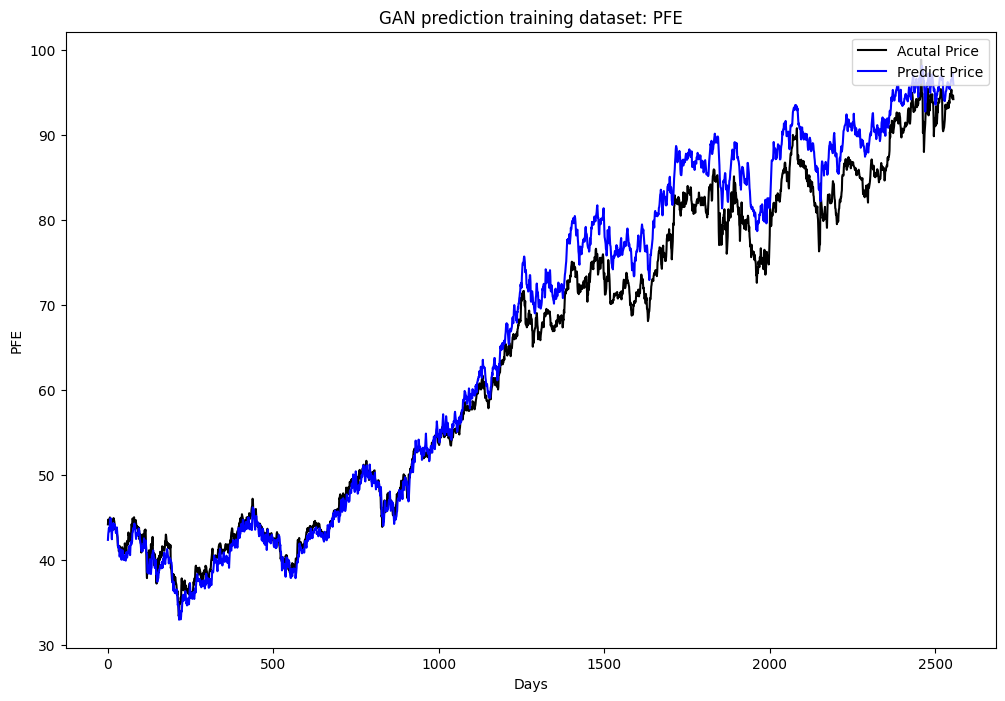

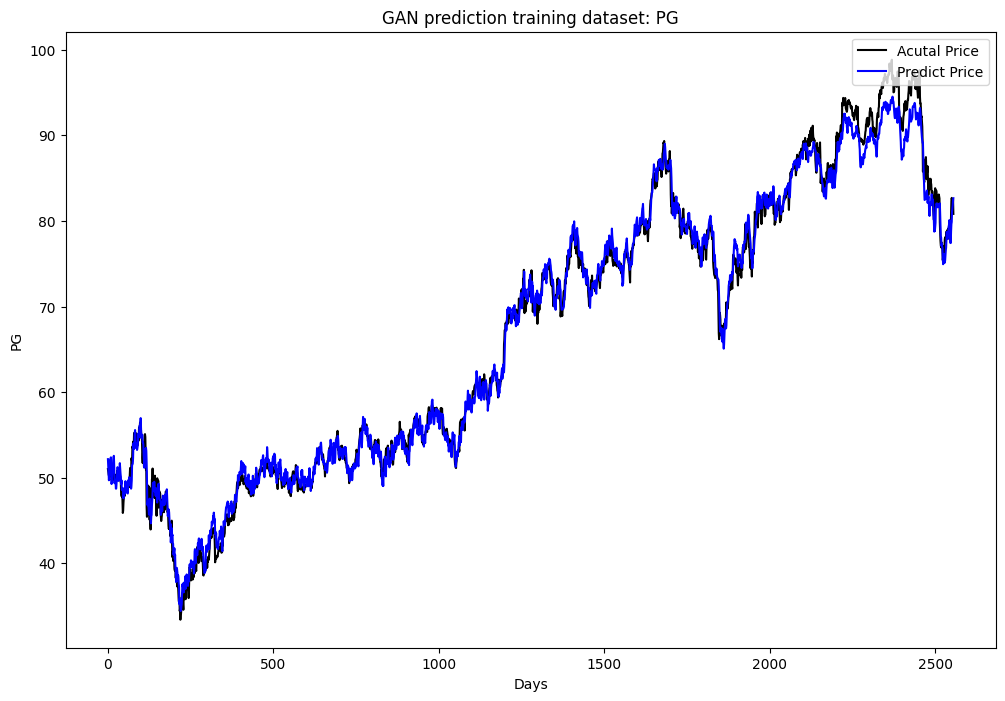

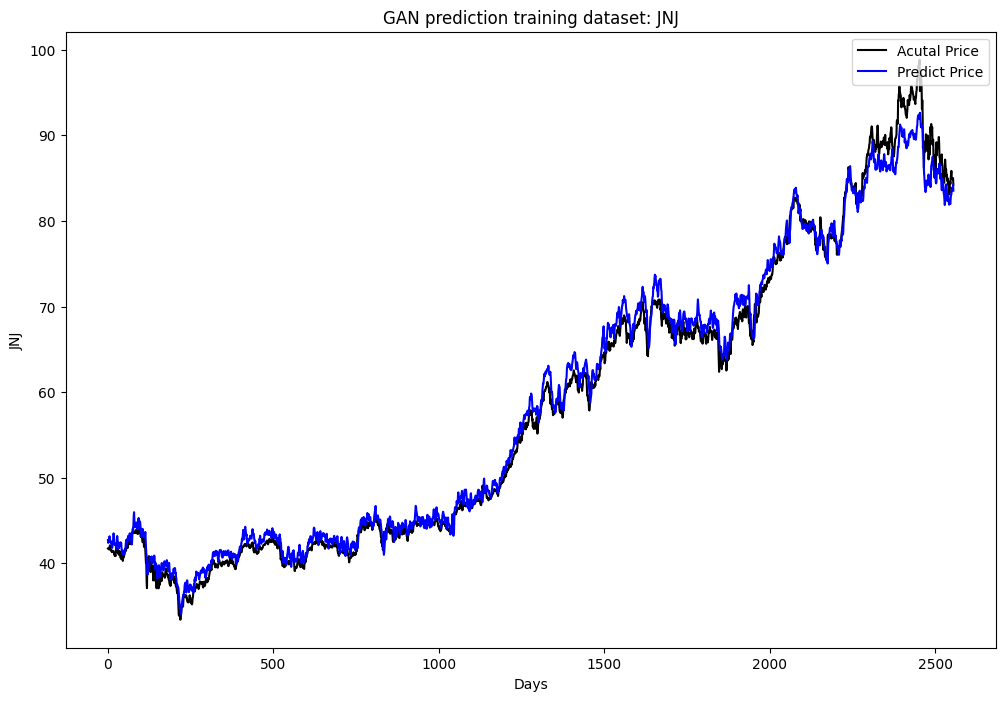

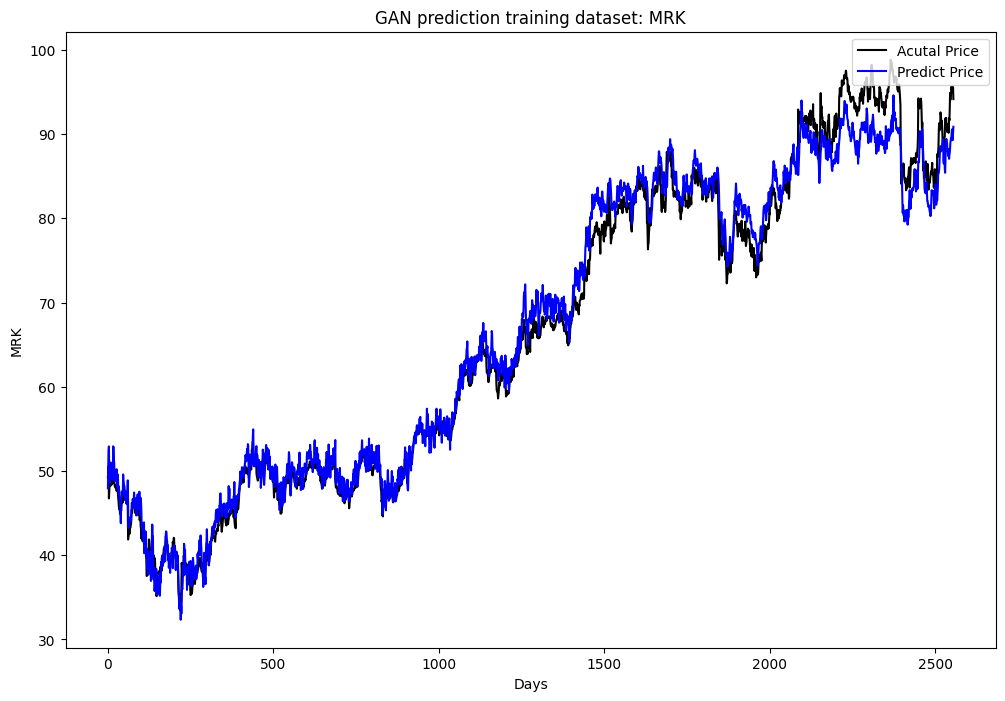

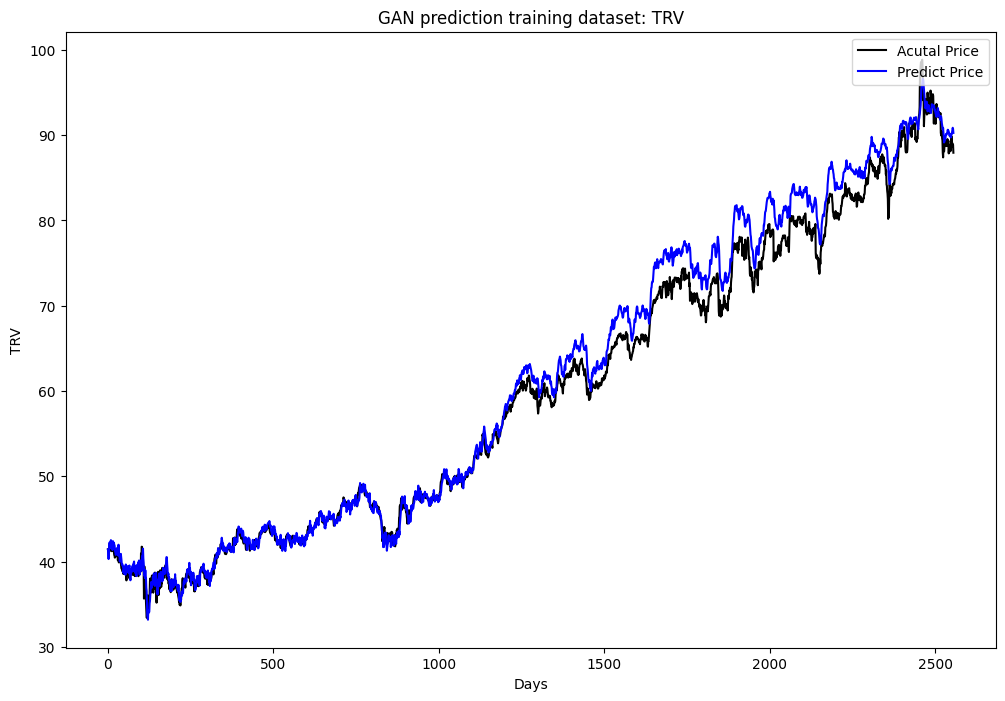

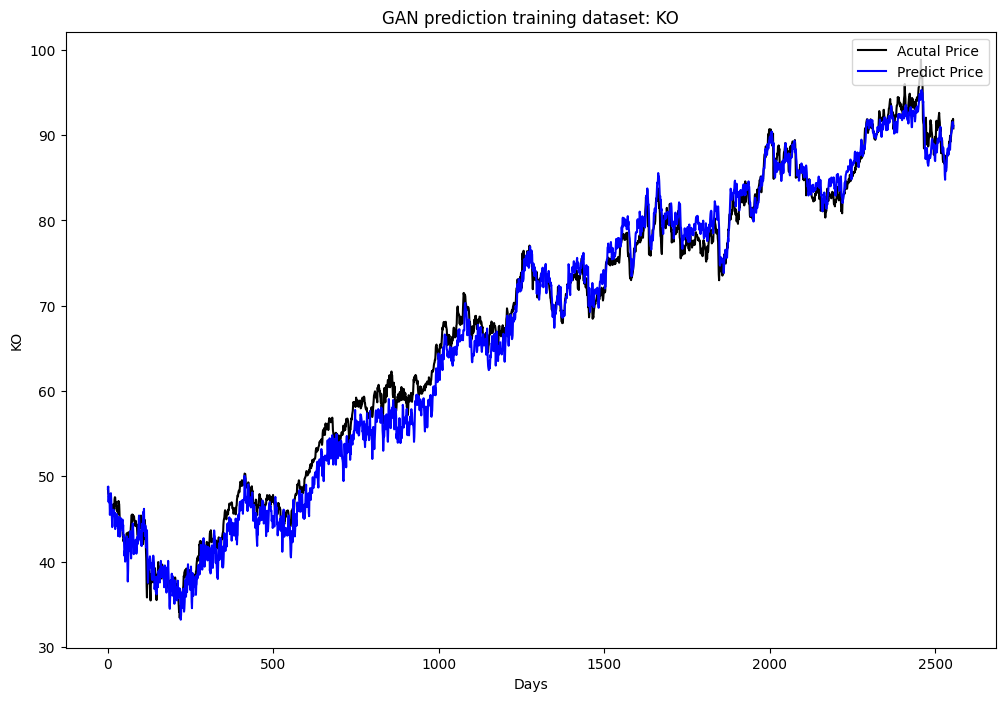

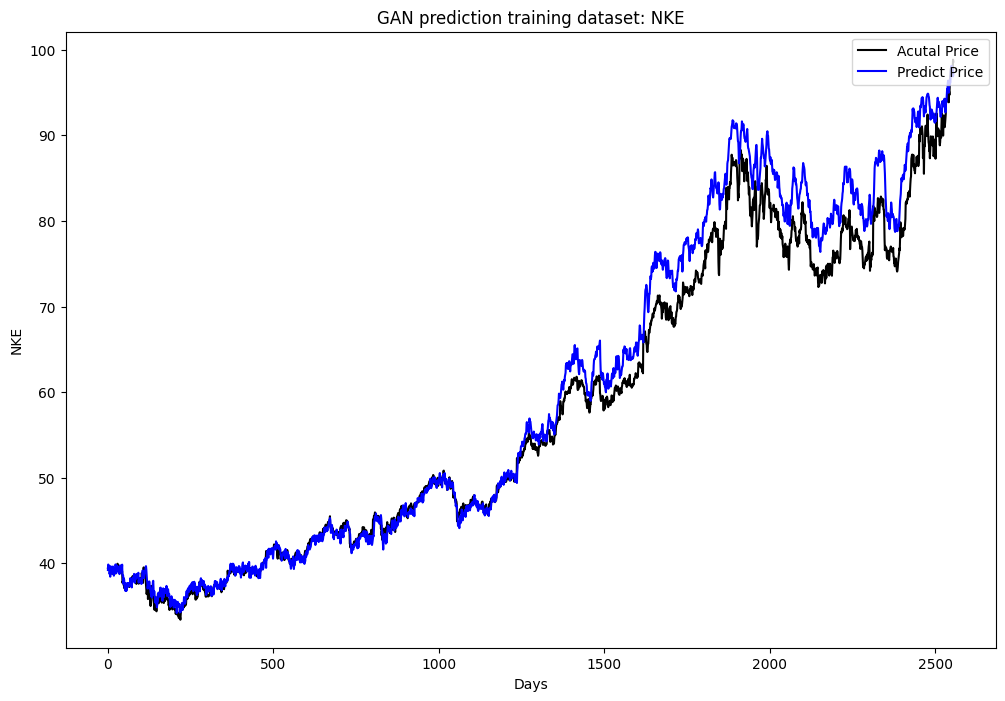

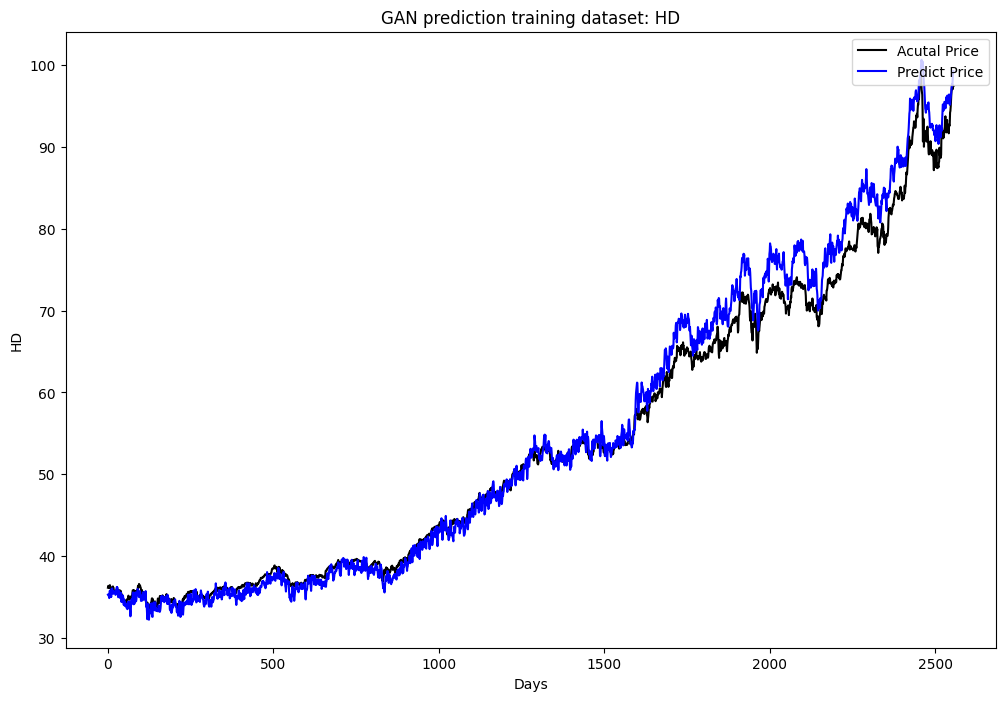

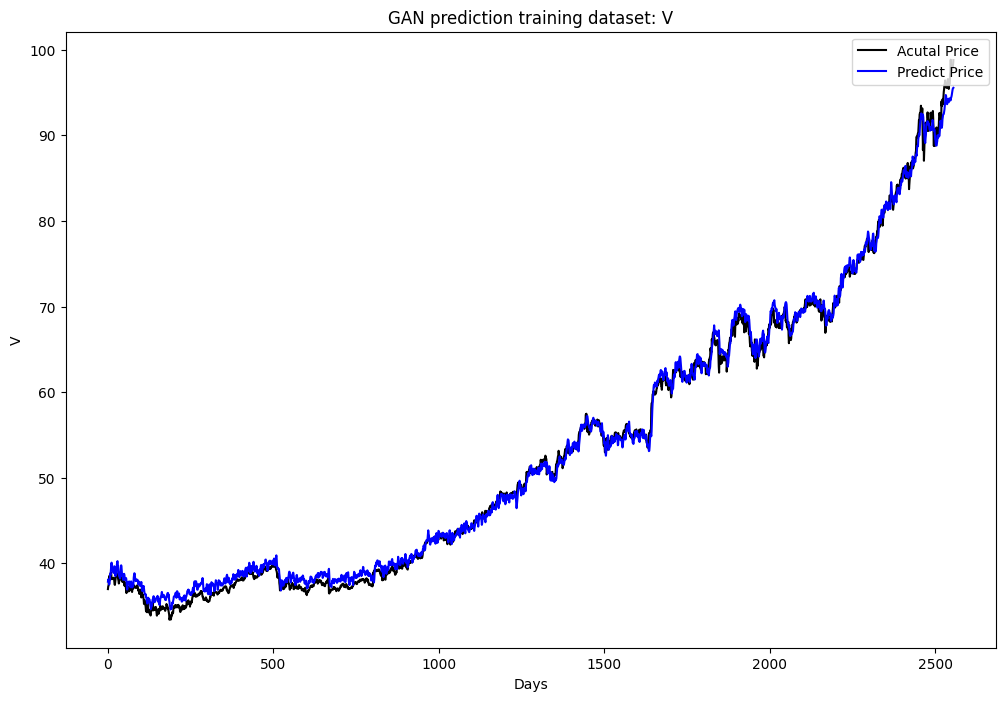

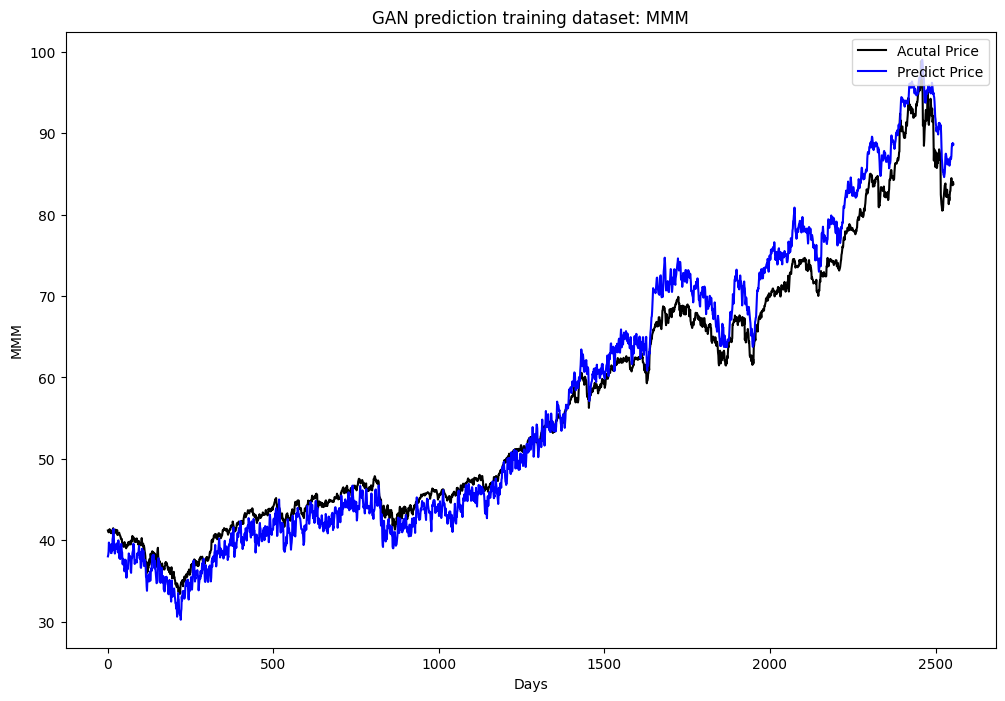

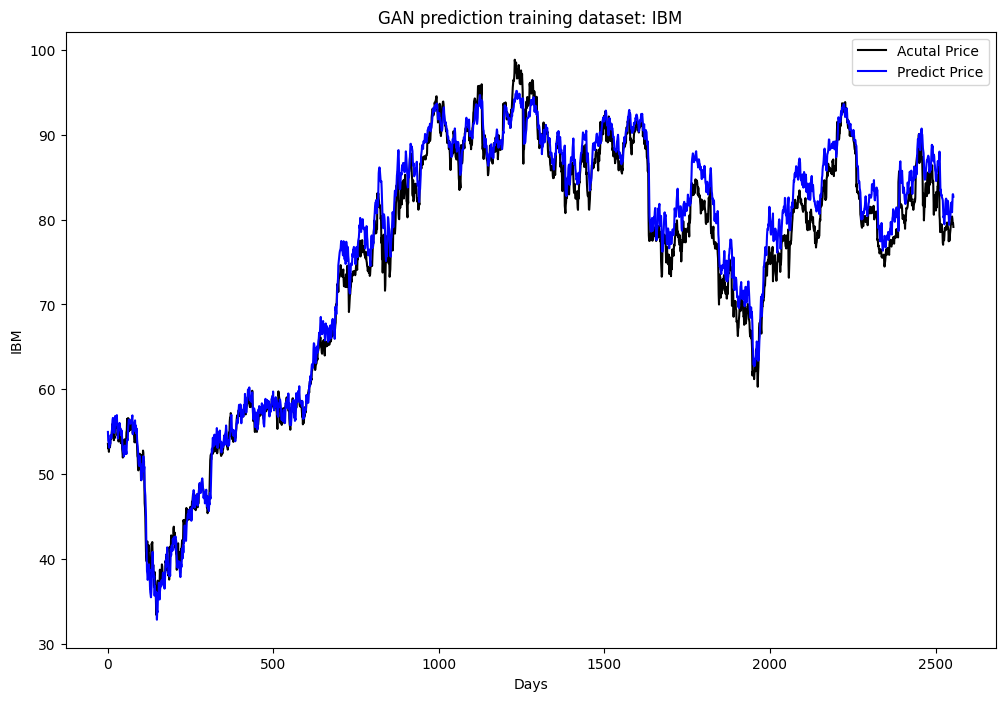

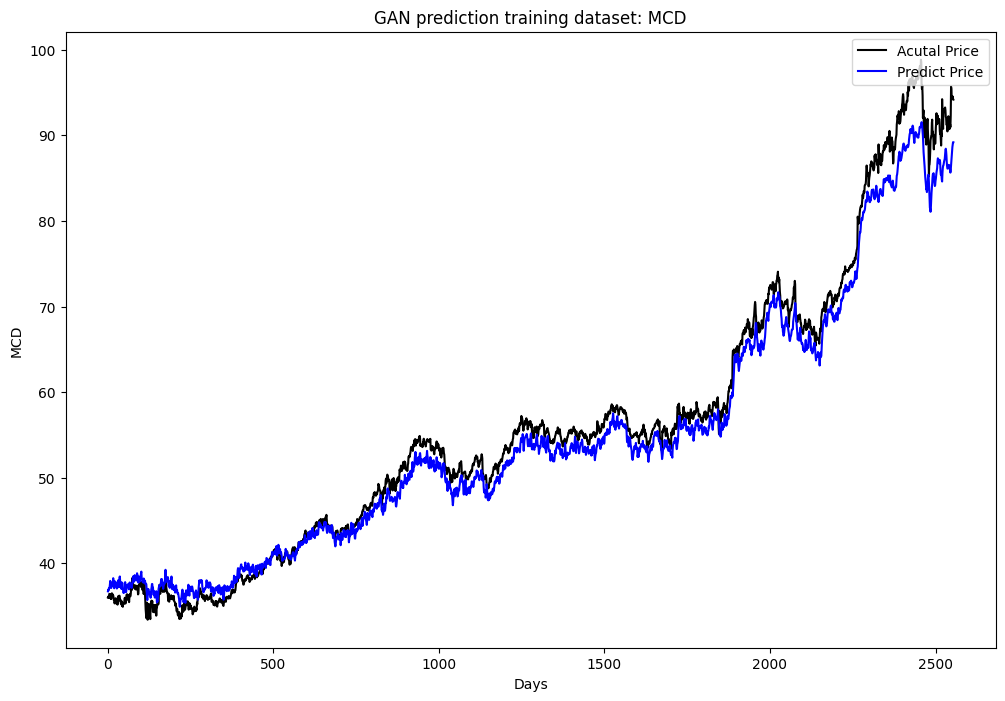

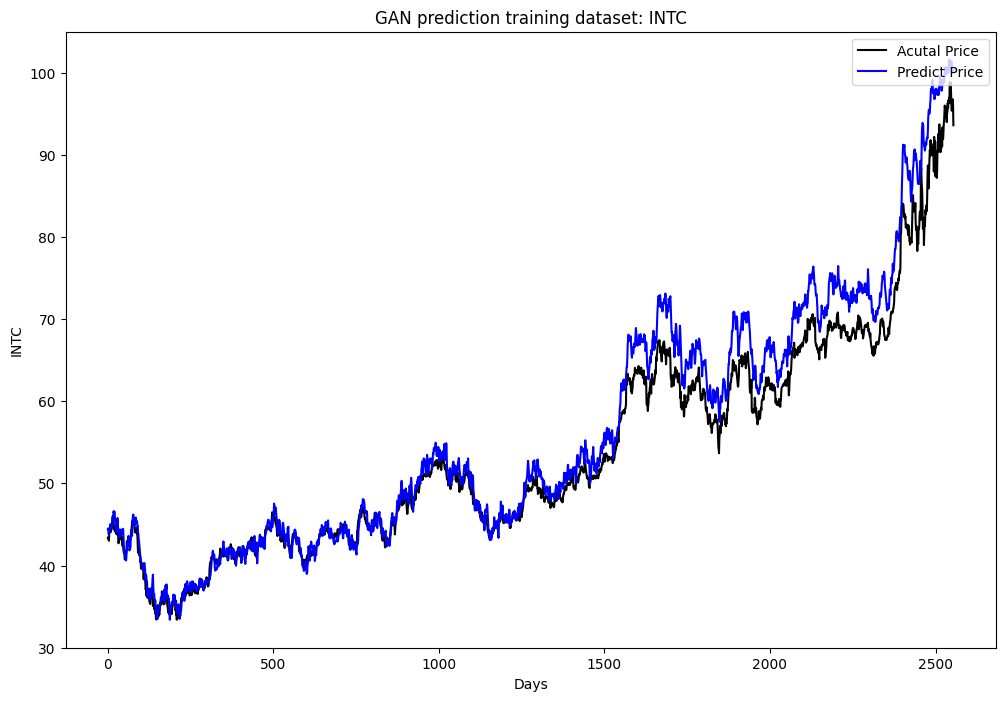

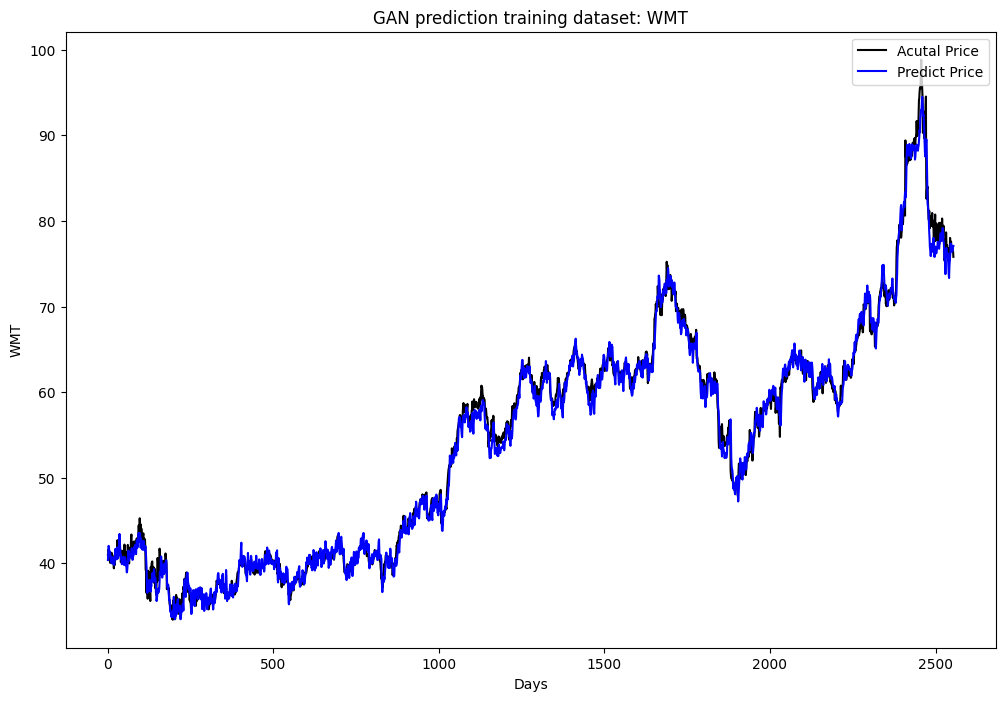

In [ ]:
GANPredict("close")

In [ ]:
GAN_masterframe = pd.read_csv("results/WMT_GAN_close.csv")
print(len(GAN_masterframe))

i = 0
df_dict_new = {}
for tic_val in tic_values:
  i += 1
  GAN_frame = GAN_masterframe.loc[GAN_masterframe["tic"] == tic_val]
  data_tic = new_data1.loc[new_data1["tic"] == tic_val]
  print(data_tic)
  data_merge = pd.concat([data_tic, GAN_frame], axis=1)
  print(data_merge)
  data_merge = data_merge.dropna()
  data_merge = data_merge.drop(columns = ["close"])
  print(len(data_merge))
  df_dict_new["df{0}".format(i)] = data_merge

data_base = pd.concat(df_dict_new.values())
data_base

51115
            date  tic      close       high        low       open      volume
4     2008-03-19  RTX  29.578529  30.322724  29.578529  29.948477   9691947.0
25    2008-03-20  RTX  29.686075  29.974290  29.311828  29.617250  10182471.0
43    2008-03-24  RTX  30.258196  30.413058  29.767800  29.862440   6862732.0
65    2008-03-25  RTX  30.180767  30.370040  29.918361  30.292611   7347536.0
94    2008-03-26  RTX  29.944162  30.073213  29.772093  30.068910   6729892.0
...          ...  ...        ...        ...        ...        ...         ...
64339 2020-12-24  RTX  65.320534  65.952638  64.967302  65.952638   1758600.0
64349 2020-12-28  RTX  65.655174  66.426715  65.385600  65.720244   2938000.0
64376 2020-12-29  RTX  65.385605  66.092076  64.762798  65.999121   3670100.0
64394 2020-12-30  RTX  66.333763  66.594040  65.385603  65.534337   5015500.0
64415 2020-12-31  RTX  66.473198  66.649810  65.943346  66.324464   4177000.0

[3221 rows x 7 columns]
           date  tic      close  

date  tic       high        low       open      volume  \
4     2008-03-19  RTX  30.322724  29.578529  29.948477   9691947.0   
25    2008-03-20  RTX  29.974290  29.311828  29.617250  10182471.0   
43    2008-03-24  RTX  30.413058  29.767800  29.862440   6862732.0   
65    2008-03-25  RTX  30.370040  29.918361  30.292611   7347536.0   
94    2008-03-26  RTX  30.073213  29.772093  30.068910   6729892.0   
...          ...  ...        ...        ...        ...         ...   
51035 2018-05-07  WMT  79.417177  77.393170  79.408099  10783600.0   
51040 2018-05-08  WMT  77.919564  77.075473  77.620047   6551400.0   
51069 2018-05-09  WMT  75.950059  74.425249  74.933517  32265200.0   
51081 2018-05-10  WMT  76.510712  74.903234  75.478637  15857600.0   
51101 2018-05-11  WMT  76.282370  74.848423  75.524301   9934800.0   

             date  tic  pred_close  
4      2008-04-25  RTX   50.144466  
25     2008-05-27  RTX   47.923380  
43     2008-06-20  RTX   47.726494  
65     2008-07-23  RTX   46.245377  
94     2008-09-03  RTX   46.666553  
...           ...  ...         ...  
51035  2018-02-20  WMT   84.072680  
51040  2018-02-27  WMT   79.631350  
51069  2018-04-10  WMT   77.099710  
51081  2018-04-26  WMT   79.151930  
51101  2018-05-24  WMT   73.331960  

[2557 rows x 9 columns]